#  Reinforcement Learning part 2: Q-Learning

<p>
In part 1 of the Reinforcement Learning (RL) series we described the RL framework, defined its fundamental components, discussed how these components interact, and finally formulated a recursive function motivated by the agent's need to maximize its total rewards. We now have all the pieces we need in order to discuss how to resolve this recursive function.
</p>
<p>
In this notebook we derive the most basic version of the so-called Q-Learning algorithm for training Reinforcement agents. We use our Gridworld setup to help illustrate how Q-Learning works in practice. 
</p>
<br>
<blockquote style="border-left: 10px solid; border-left-color: #ccc; background: #f5f5f5;"><p>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit <a target="_blank" href="http://www.mlrefined.com">mlrefined.com</a> for free chapter downloads and tutorials, and <a target="_blank" href="https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&amp;qid=1474491657&amp;sr=8-1&amp;keywords=machine+learning+refined">our Amazon site</a> for details regarding a hard copy of the text.</p>
</blockquote>

<h1 id="3.1--Whats-the-use-of-a-recursive-definition-of-$Q$-if-we-don't-know-what-$Q$-is-to-begin-with?">1. Resolving $Q$ and the curse of recursion<a class="anchor-link" href="#3.1--Whats-the-use-of-a-recursive-definition-of-$Q$-if-we-don't-know-what-$Q$-is-to-begin-with?">&#182;</a></h1>
<p>At first glance the recursive definition of $Q$</p>
<p style="text-align: center !important;">$Q\left(s_{k},\,a_{k}\right)=r_{k}+\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$</p>

<p>seems to aid little in helping us determine the optimal $Q$ function. $Q$ is on both sides of the recursive definition above but we don't know $Q$ to begin with. So how does this recursion help?</p>
<p>The answer is in the agent's intrinsic ability to interact with the problem environment. The idea here is to initialize $Q$ to some (random) value, run a large number of episodes and update $Q$ via the recursive definition as we go along. This essentially constitutes the training phase of Reinforcement Learning.</p>
<p>More specifically, by running through an episode of simulation</p>
<p style="text-align: center !important;">($s_1$, $a_1$, $r_1$) $\rightarrow$ ($s_2$, $a_2$, $r_2$) $\rightarrow$ ($s_3$, $a_3$, $r_3$) $\rightarrow$ $\,\,\cdots$</p>
<p>we <em>generate data</em> that can be used to resolve the optimal $Q$ function step-by-step via the recursive definition. After initializing $Q$, the agent takes its first action for which it receives the reward $r_1$. Based on this reward, we update $Q\left(s_{1},\,a_{1}\right)$ via </p>

<p style="text-align: center !important;">$Q\left(s_{1},\,a_{1}\right)=r_{1}+\underset{i\in\varOmega(s_{2})}{\text{maximum}}\,\,Q\left(s_{2},\,\alpha_{i}\right)$</p>

<p> The agent then takes its second action for which it receives the reward $r_2$, and we update $Q\left(s_{2},\,a_{2}\right)$ via  

<p style="text-align: center !important;">$Q\left(s_{2},\,a_{2}\right)=r_{2}+\underset{i\in\varOmega(s_{3})}{\text{maximum}}\,\,Q\left(s_{3},\,\alpha_{i}\right)$</p>

<p>This sequential update process continues until a goal state is reached or a maximum number of steps is taken. The current episode then ends, we begin a new episode, and start updating $Q$ again.</p>
<p>Performing enough <em>training episodes</em>  - and subsequent updates to $Q$ - our $Q$ function eventually becomes optimal since by construction it will satisfy the desired recursive definition for all state/action pairs.  You can see that in order for $Q$ to be optimal for all state/action pairs we will need to visit every such pair at least once.  In practice one must typically cycle through each pair multiple times in order for $Q$ to be trained appropriately, or as we will see later, employ function approximators to generalize from a small subset of state/action pairs to the entire space <a href="#bib_cell">[1]</a>.</p>
<br>
<blockquote style="border-left: 10px solid; border-left-color: #ffbf00; background: #fff0c6;">
<p>
By running through a large number of episodes (and so through as many state/action pairs as many times as possible) and updating $Q$ at each step using the recursive definition, we learn $Q$ by trial-and-error interactions with the environment. How well our computations converge to the true $Q$ function depend on how well we sample the state/action spaces through our trial-and-error interactions.
</p>
</blockquote>

<h1 id="3.2--The-basic-Q-Learning-algorithm">2. The basic Q-Learning algorithm<a class="anchor-link" href="#3.2--The-basic-Q-Learning-algorithm">&#182;</a></h1>
<p>In the most basic approach we run each episode by taking a random initial state, a <strong>random</strong> action, and repeat taking steps until a goal state is reached or maximum number of steps is taken. More precisely, at the $k^{th}$ step we are at a state $s_{k}$ and take a <strong>random</strong> action $a_k$ and update $Q(s_{k},a_k)$ using the recursive definition of $Q$, as </p>
<p style="text-align: center !important;">$Q\left(s_{k},\,a_{k}\right)=r_{k}+\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$</p>
<p>
Pseudo-code for this basic version of the Q-Learning algorithm is given below.
</p>
<br>



<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; initialize $Q$<br>
<strong>2:</strong>&nbsp;&nbsp; set the number of episodes $E$<br>
<strong>3:</strong>&nbsp;&nbsp; set the maximum number of steps per episode $T$<br>
<strong>4:</strong>&nbsp;&nbsp; <code>for</code> $e$ = $1$, $2$, ..., $E$<br>
<strong>5:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow 1$<br>
<strong>6:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select a random initial state $s_1$<br>
<strong>7:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>while</code> goal state not reached <code>and</code> $k \leq T$<br>
<strong>8:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select a valid action $a_k$ at random<br>
<strong>9:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;record the resulting state $s_{k+1}$ and corresponding reward $r_k$<br>
<strong>10:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q\left(s_{k},\,a_{k}\right) \longleftarrow r_{k}+\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$<br>
<strong>11:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow k+1$<br>
<strong>12:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;<code>end while</code><br>
<strong>13:</strong>&nbsp; <code>end for</code><br>
<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>


<h3 id="Example:--Applying-Q-learning-to-the-gridworld-maze"><span style="color:#a50e3e;">Example.</span> &nbsp; Applying Q-learning to Gridworld<a class="anchor-link" href="#Example:--Applying-Q-learning-to-the-gridworld-maze">&#182;</a></h3>
<p>We can now use Q-Learning to train an agent for the small Gridworld maze we first saw in part 1.</p>


In [11]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

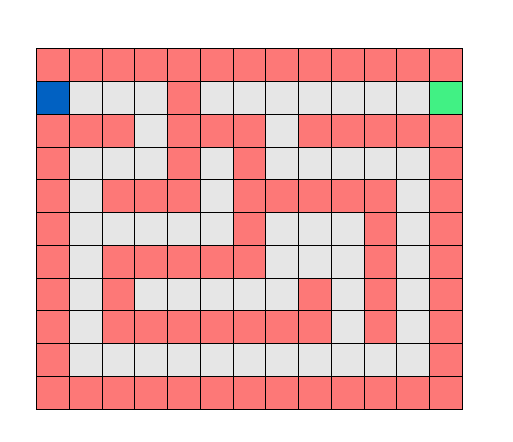

In [12]:
# import custom gridworld simulator 
from gridworld_lib import gridworld_enviro

# generate instance of gridworld
small_maze = gridworld_enviro.environment(world_size = 'small', world_type = 'maze')

# show the grid
small_maze.color_gridworld()

<p>Recall that with Gridworld our goal is to train the agent (shown in blue) to efficiently reach the goal square (shown in green) while avoiding the hazard squares (shown in red), starting from <em>any</em> square on the grid. The agent can only move up, down, left, and right one square at a time.</p>
<p>For this example we preset reward values for the agent at each location on the grid as</p>
<br>
<p style="text-align: center !important;">$r_{k}=\begin{cases}
-1 & \text{if on standard square}\\
-200 & \text{if on hazard square}\\
0 & \text{if at goal}
\end{cases}$</p>
<br>
<p>You can see these values by exposing the following functionality in the Python cells below.</p>

In [13]:
# show preset rewards and gamma value
print 'the standard square reward is preset to ' + str(small_maze.standard_reward)
print 'the hazard reward is preset to ' + str(small_maze.hazard_reward)
print 'the goal reward is preset to ' + str(small_maze.goal_reward)

the standard square reward is preset to -1
the hazard reward is preset to -200
the goal reward is preset to 0


<p>In the next Python cell we train an agent for this Gridworld via the basic Q-Learning algorithm.</p>


In [14]:
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
qlearner = gridworld_qlearn.learner(gridworld = small_maze)

# run q-learning
qlearner.train(verbose = True, action_method = 'random')

training episode 50 of 500 complete
training episode 100 of 500 complete
training episode 150 of 500 complete
training episode 200 of 500 complete
training episode 250 of 500 complete
training episode 300 of 500 complete
training episode 350 of 500 complete
training episode 400 of 500 complete
training episode 450 of 500 complete
training episode 500 of 500 complete
q-learning algorithm complete


<p>To examine this Q-Learning function enter <code>qlearner.train??</code> into a Python cell and activate. This function contains a few containers and switches used to capture output and control variables, but the heart of the function mirrors the pseudo-code given above.  In the next cell we show the stripped down code at the heart of the function (note: this will not run!)</p>

In [ ]:
### start main Q-learning loop ###
for n in range(self.training_episodes): 
    # pick this episode's starting position
    grid.agent = self.training_start_schedule[n]

    # update Q matrix while loc != goal
    episode_history = []      # container for storing this episode's journey
    total_episode_reward = 0
    for step in range(self.max_steps):   
        # update episode history container
        episode_history.append(grid.agent)

        ### if you reach the goal end current episode immediately
        if grid.agent == grid.goal:
            break

        # translate current agent location tuple into index
        s_k_1 = grid.state_tuple_to_index(grid.agent)

        # get action
        a_k = grid.get_action(method = self.action_method,Q = Q,exploit_param = self.exploit_param)

        # move based on this action
        s_k = grid.get_movin(action = a_k)

        # get reward     
        r_k = grid.get_reward(state_index = s_k)          

        # update Q
        Q[s_k_1,a_k] = r_k + max(Q[s_k,:])

        # update current location of agent 
        grid.agent = grid.state_index_to_tuple(state_index = s_k)

<p>Let's now see what each episode of training looks like, where each action is taken randomly to update the $Q$ function. In the next Python cell we animate two of the training episodes. </p>


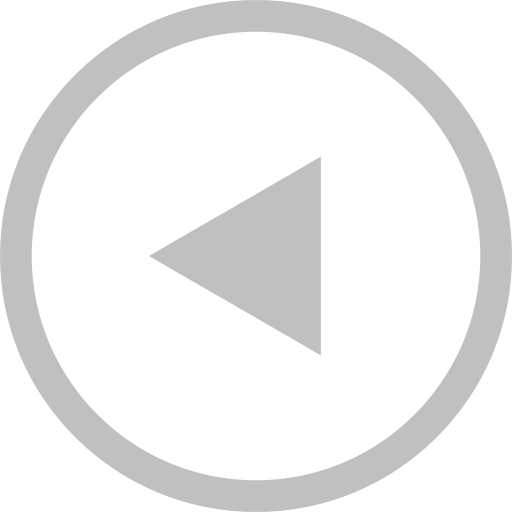
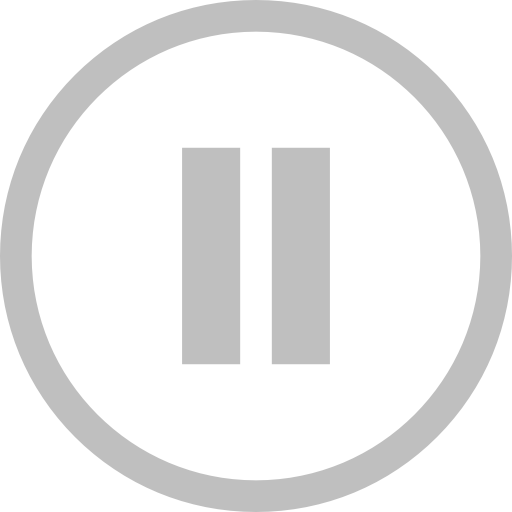
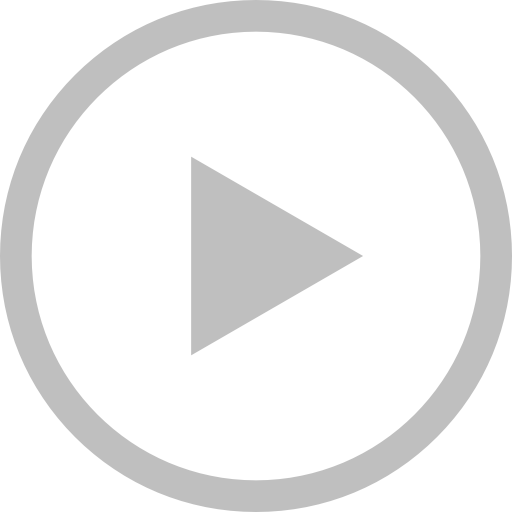
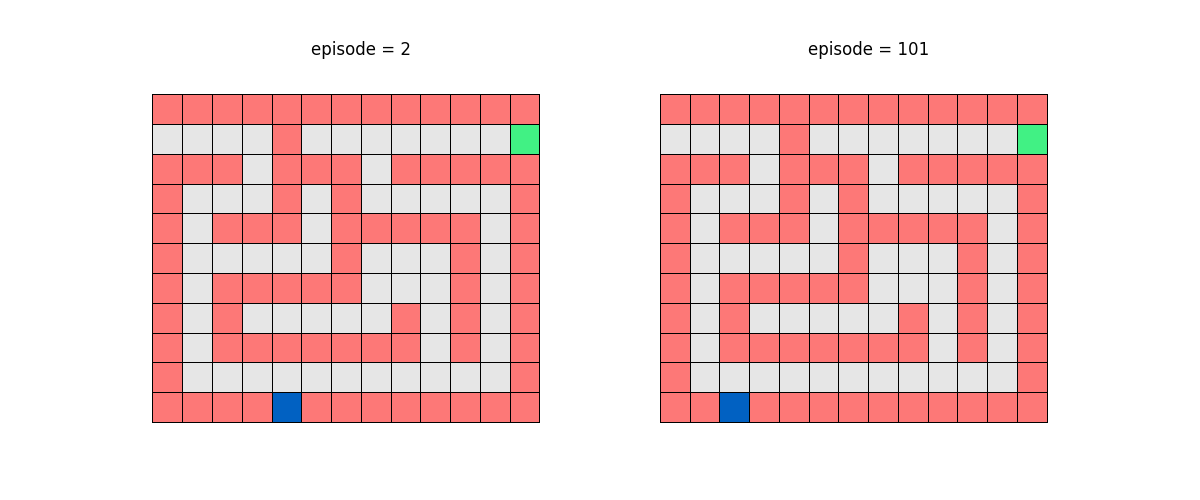
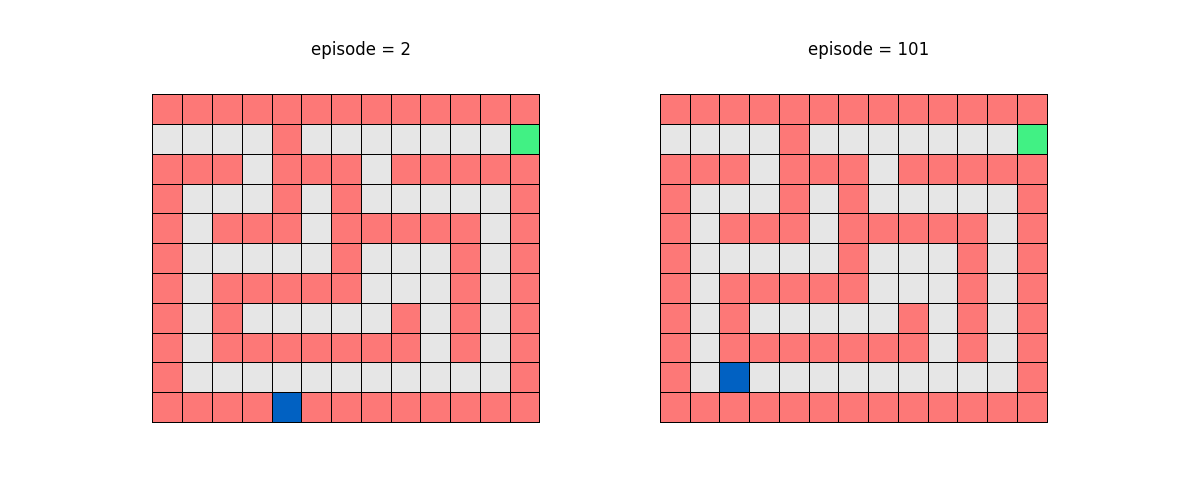
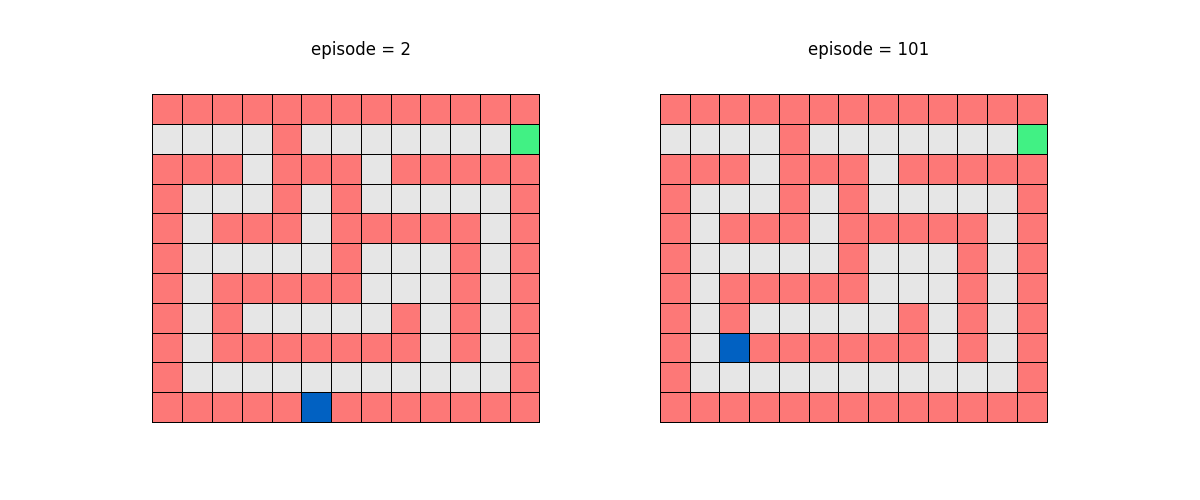
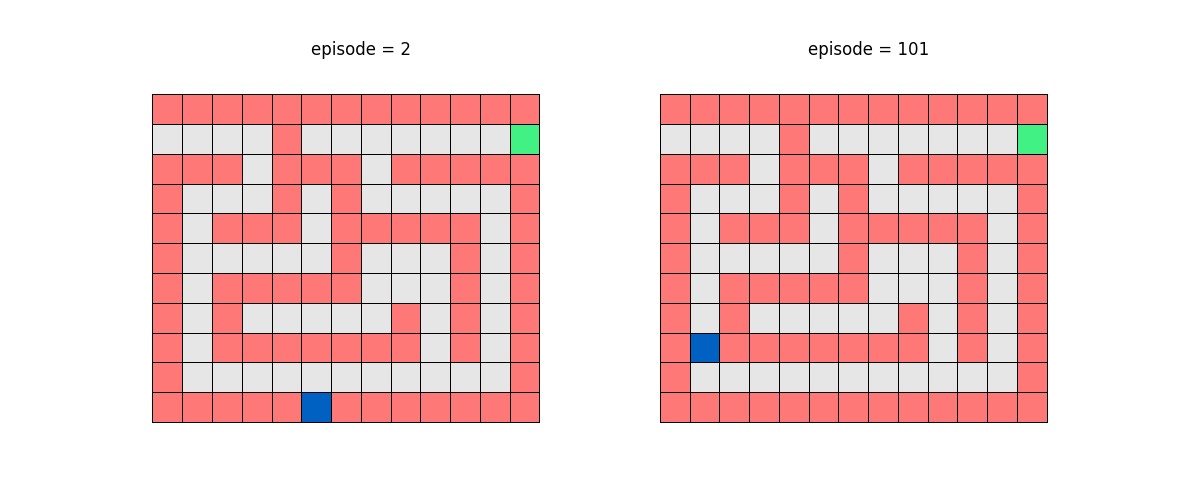
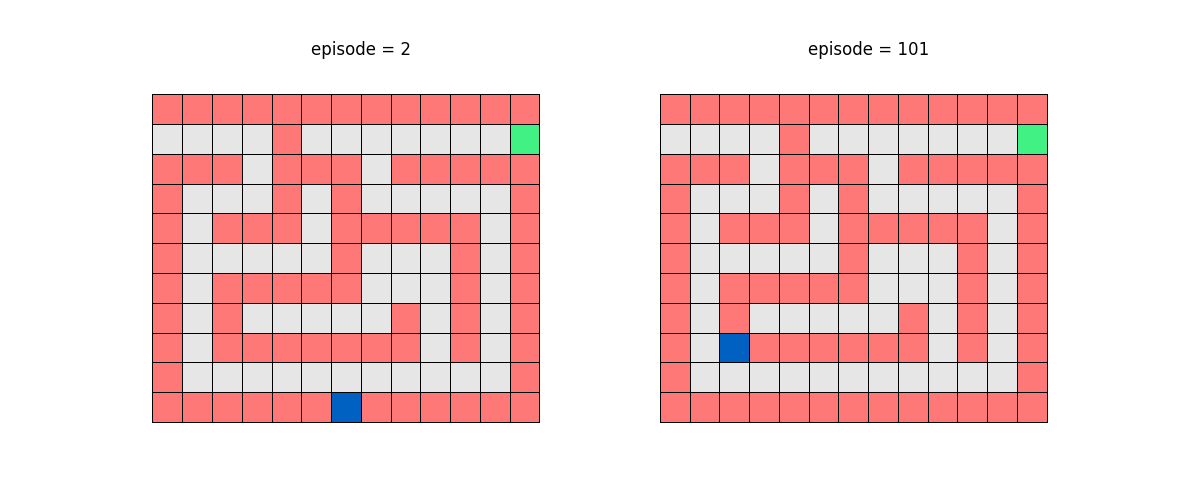
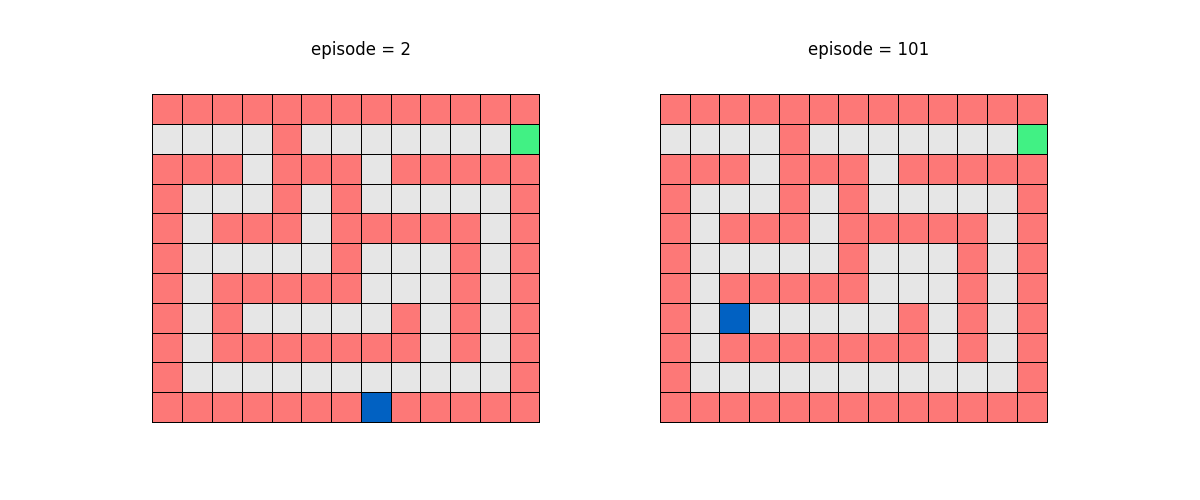
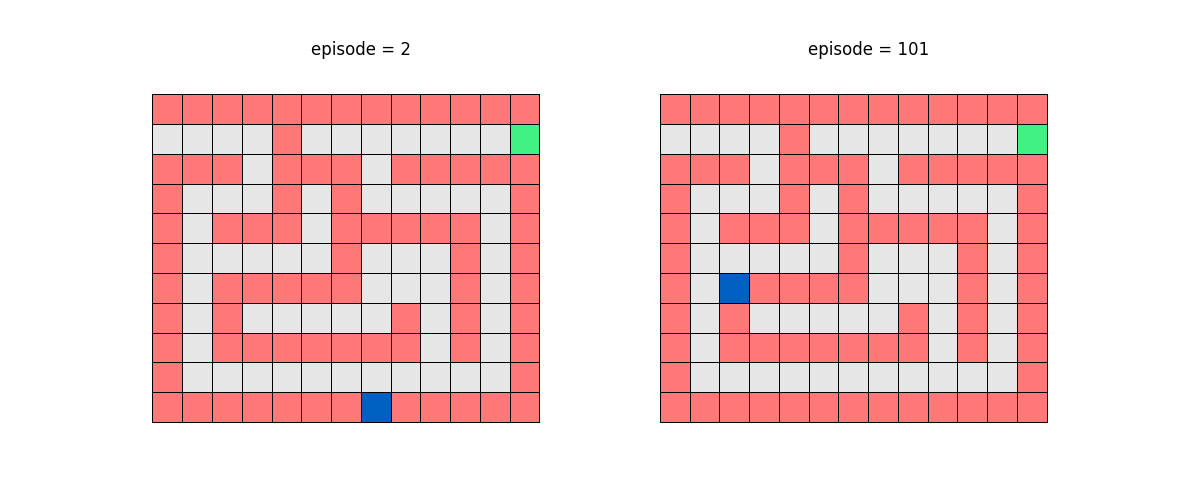
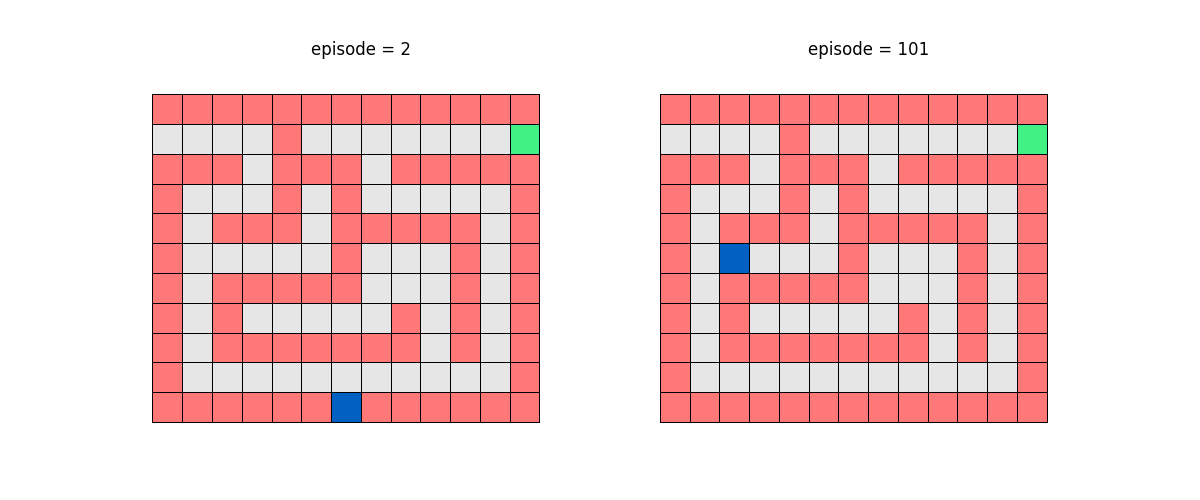
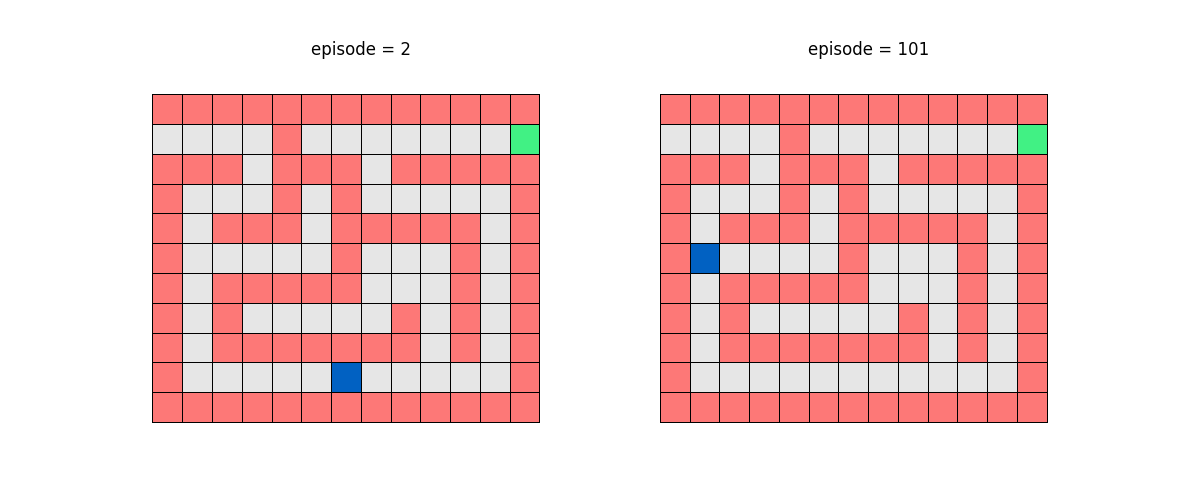
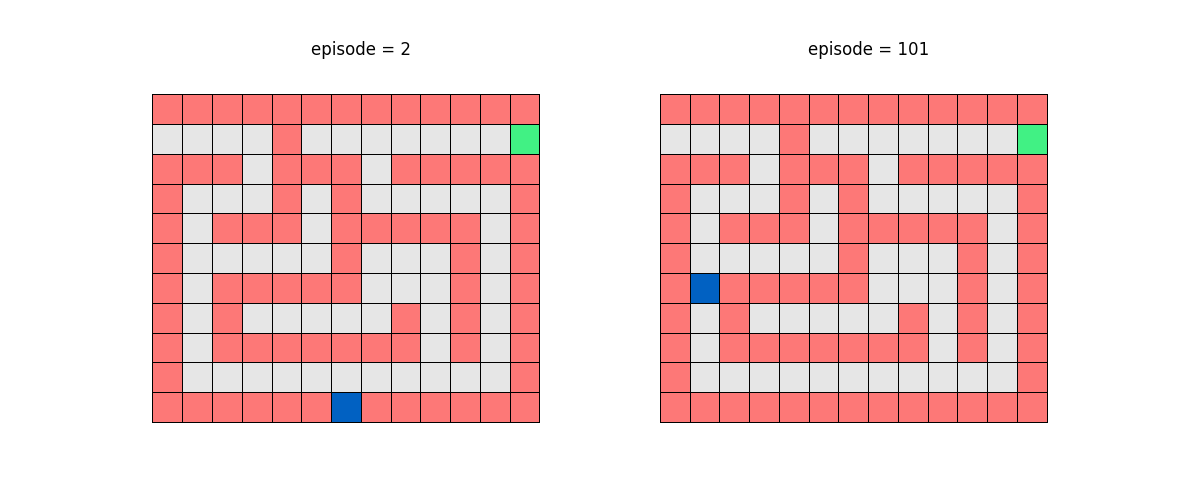
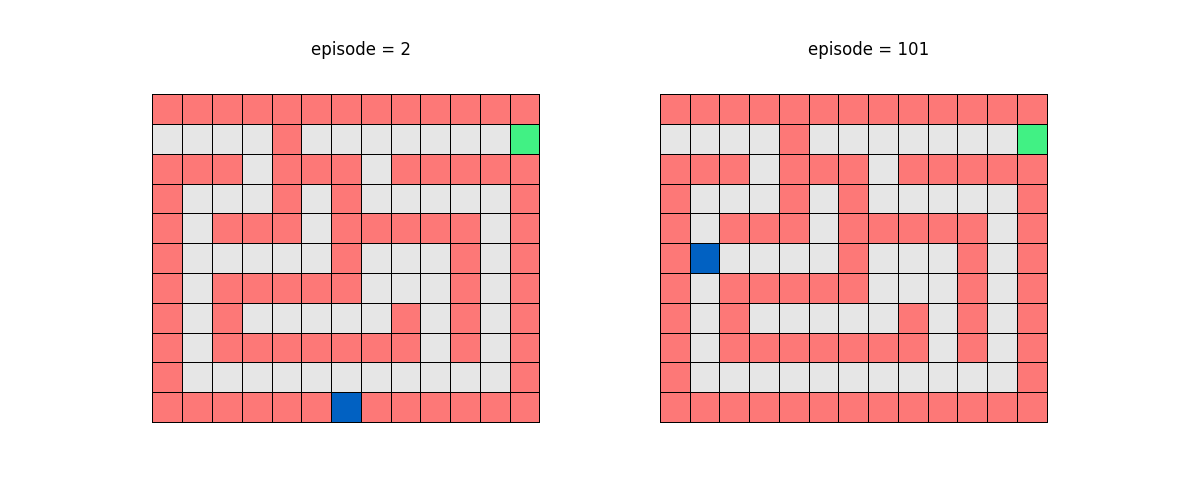
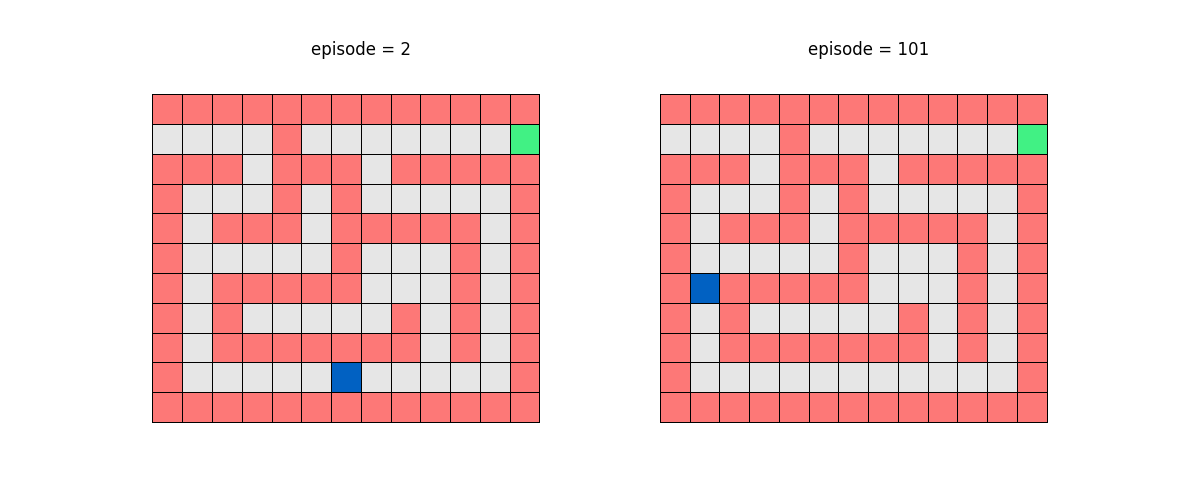
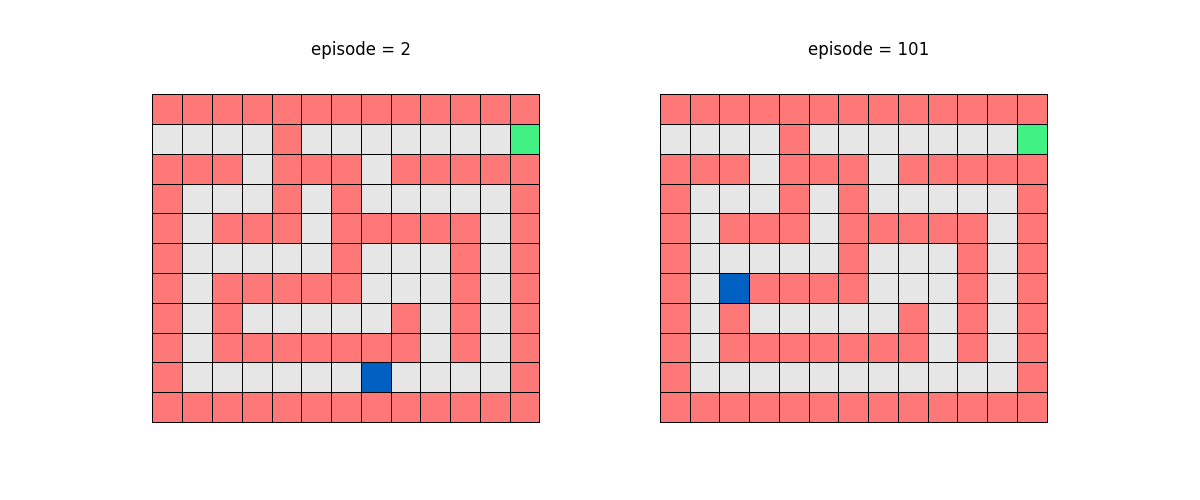
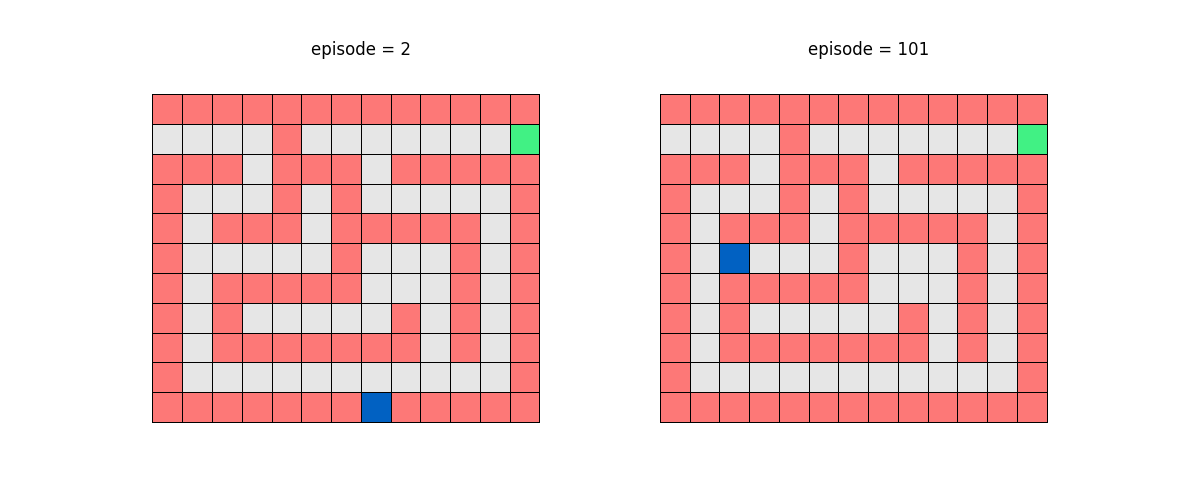
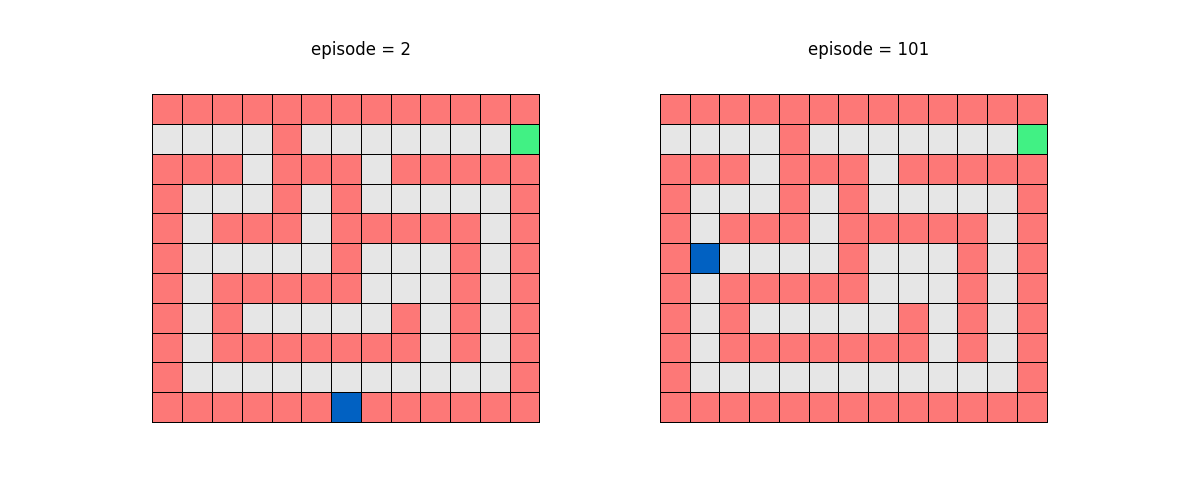
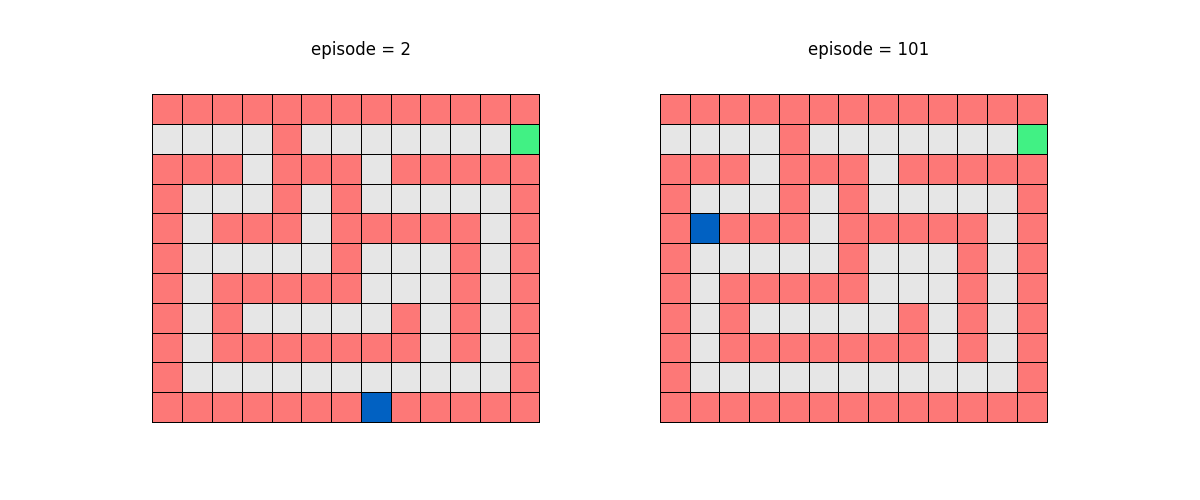
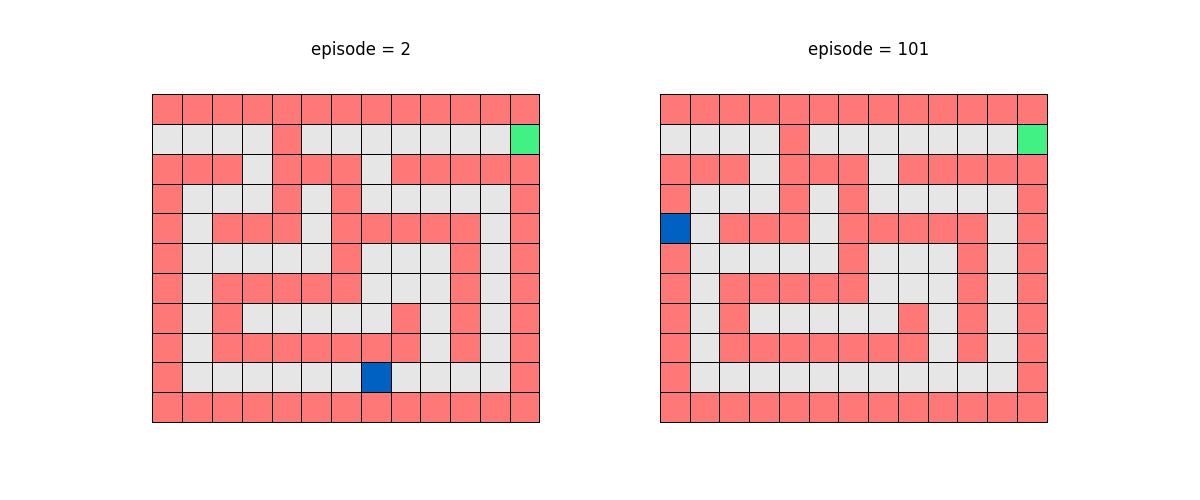
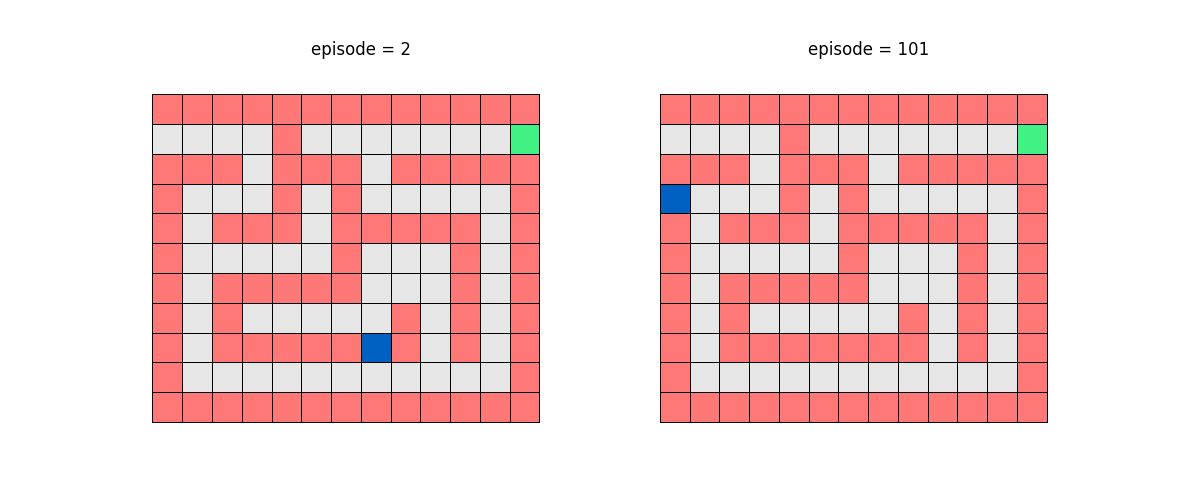
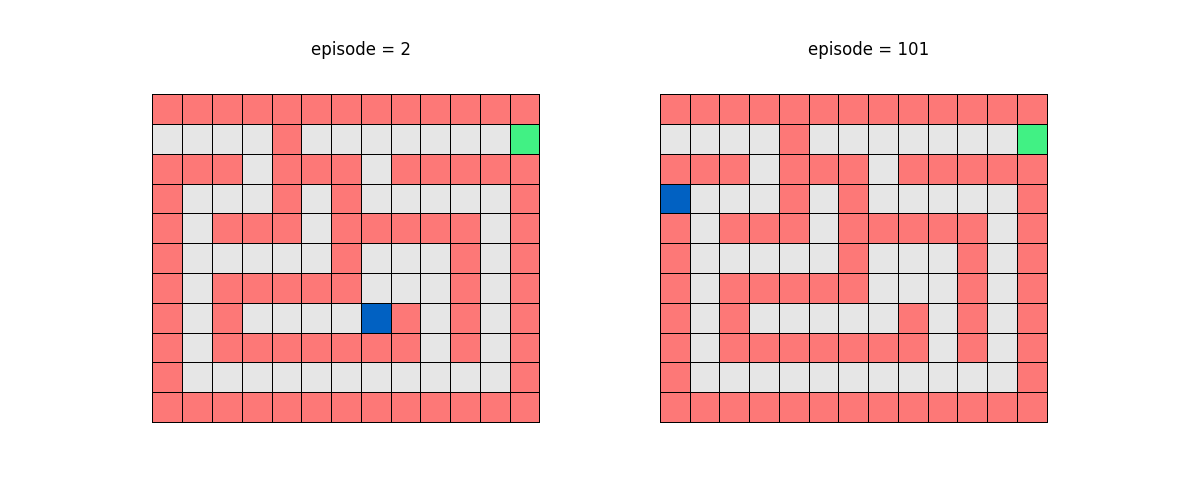
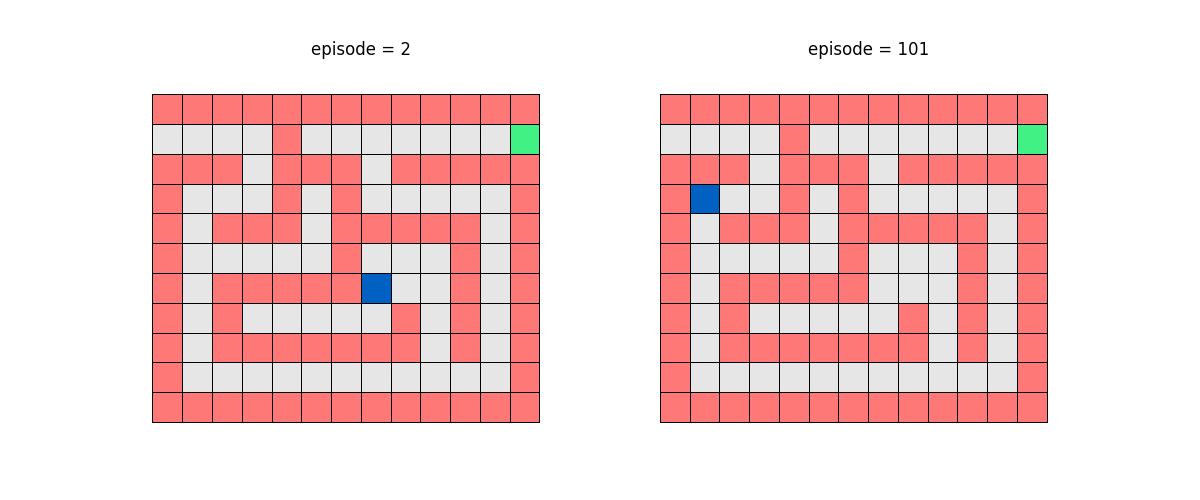
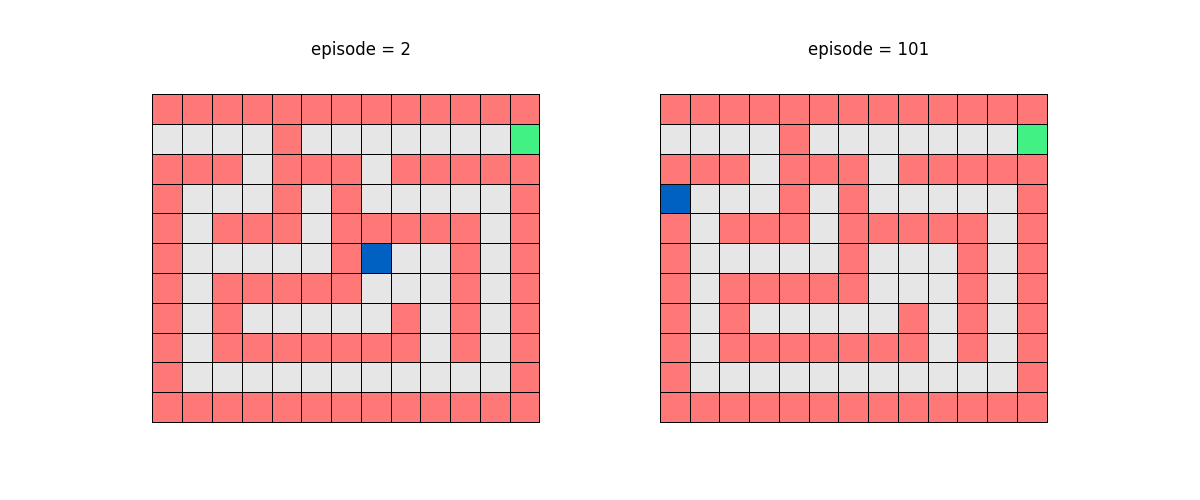
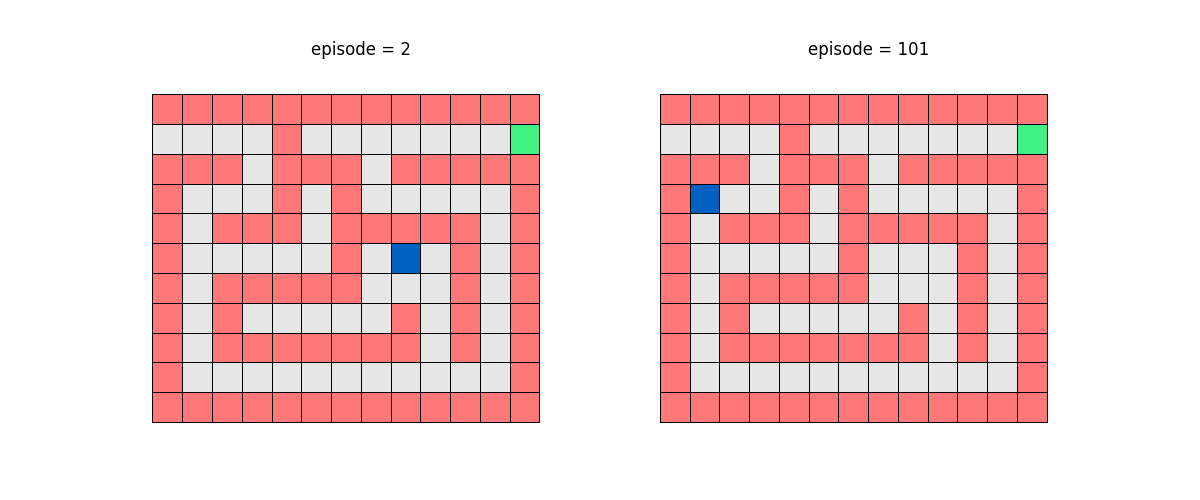
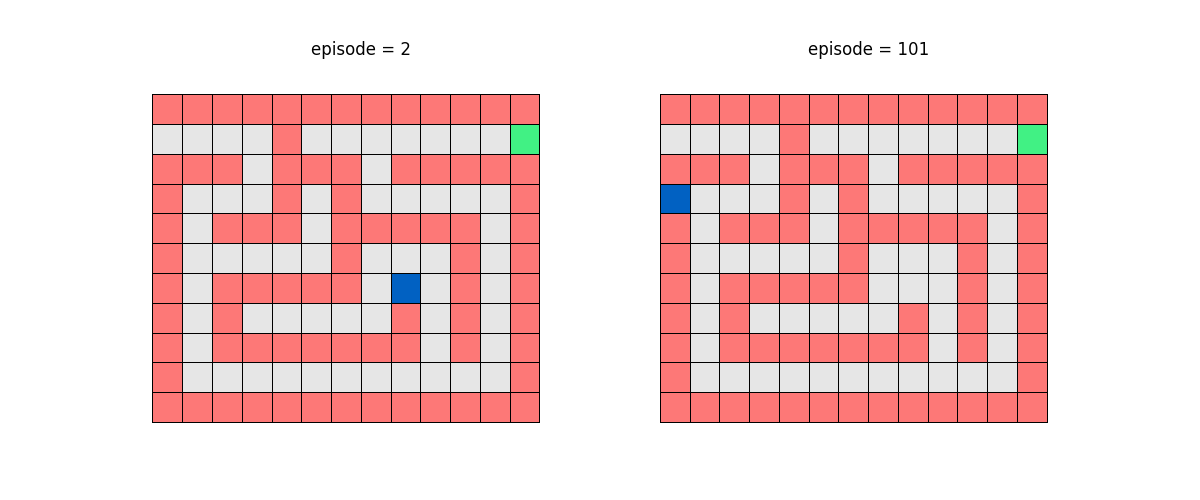
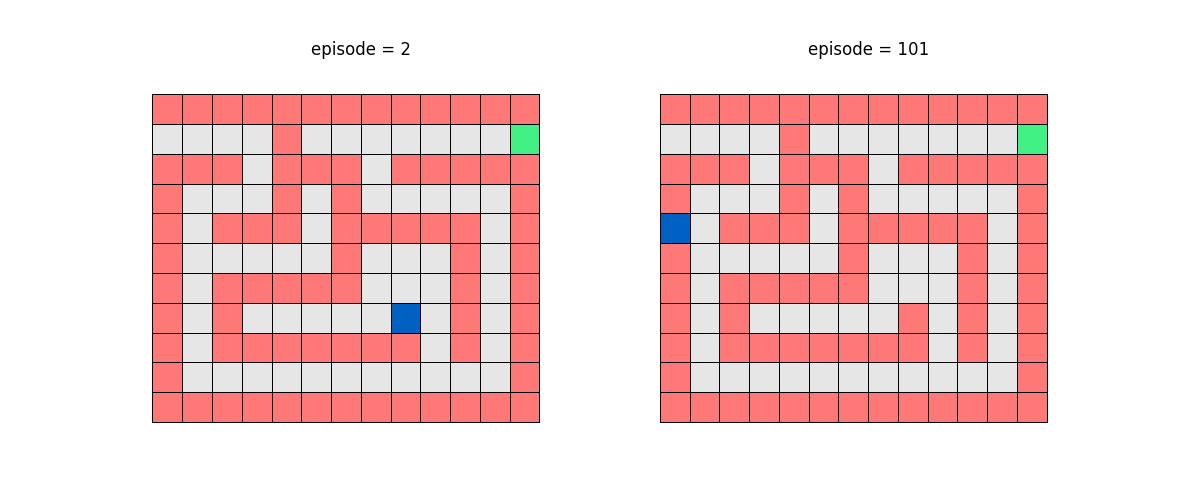
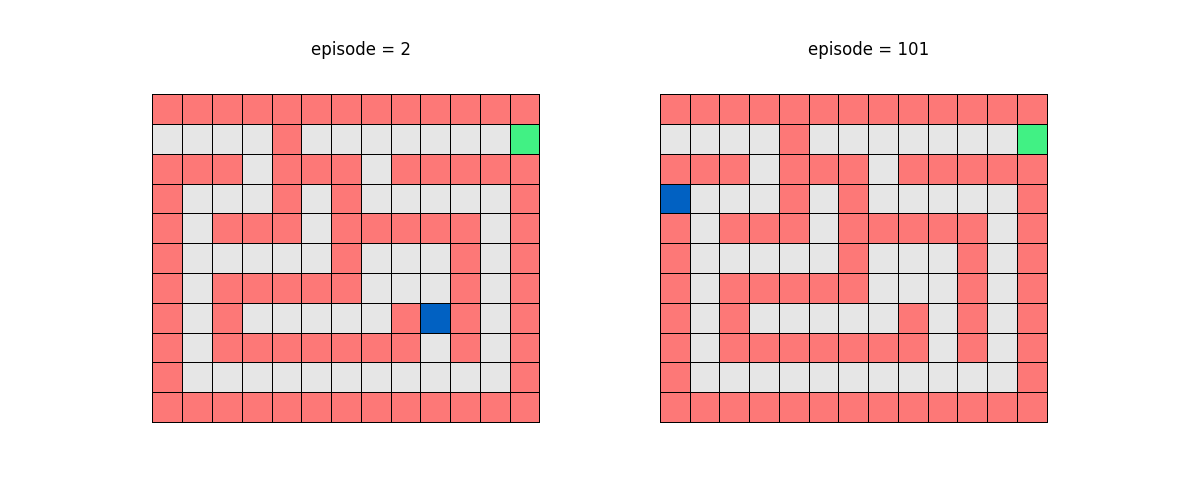
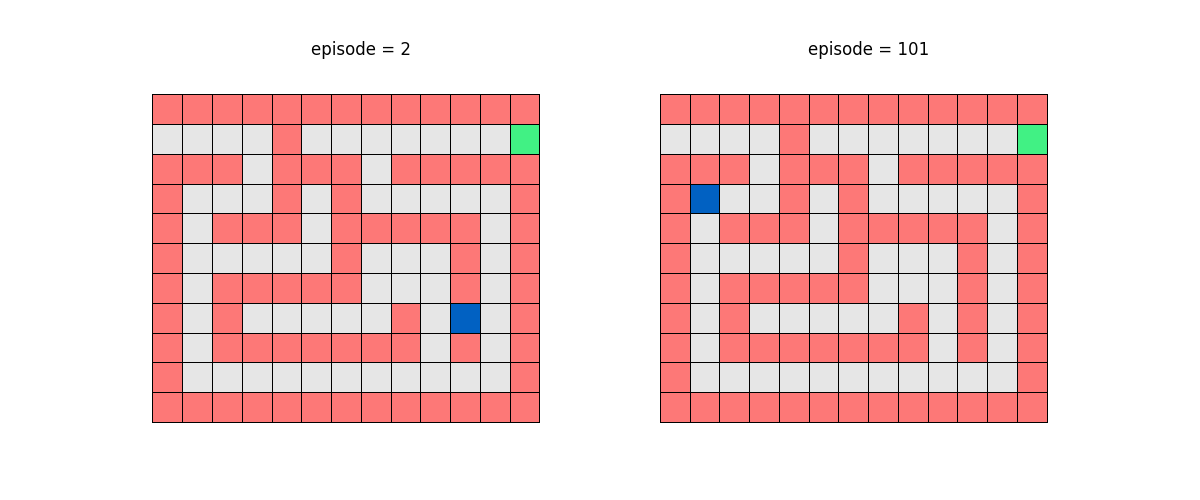
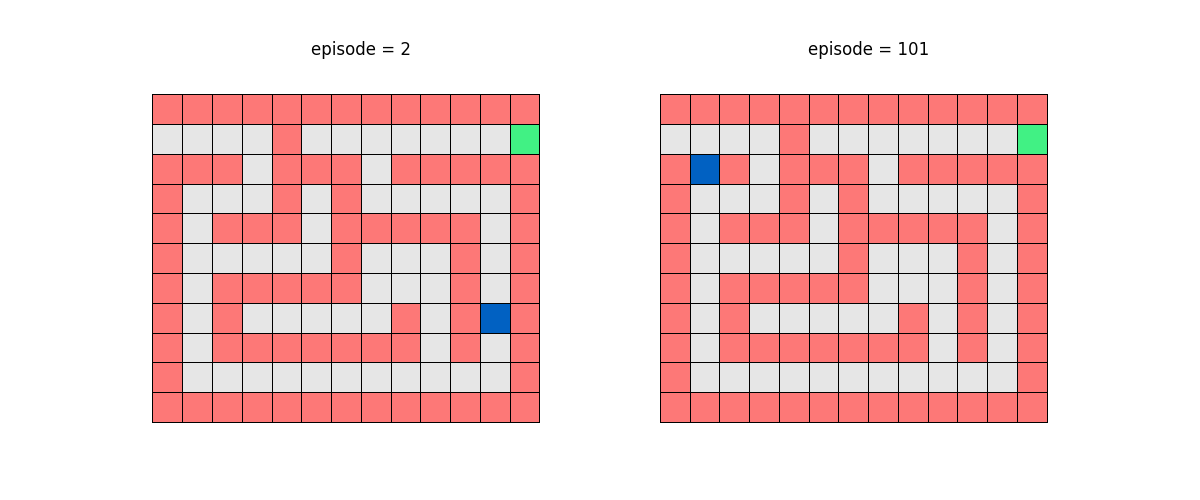
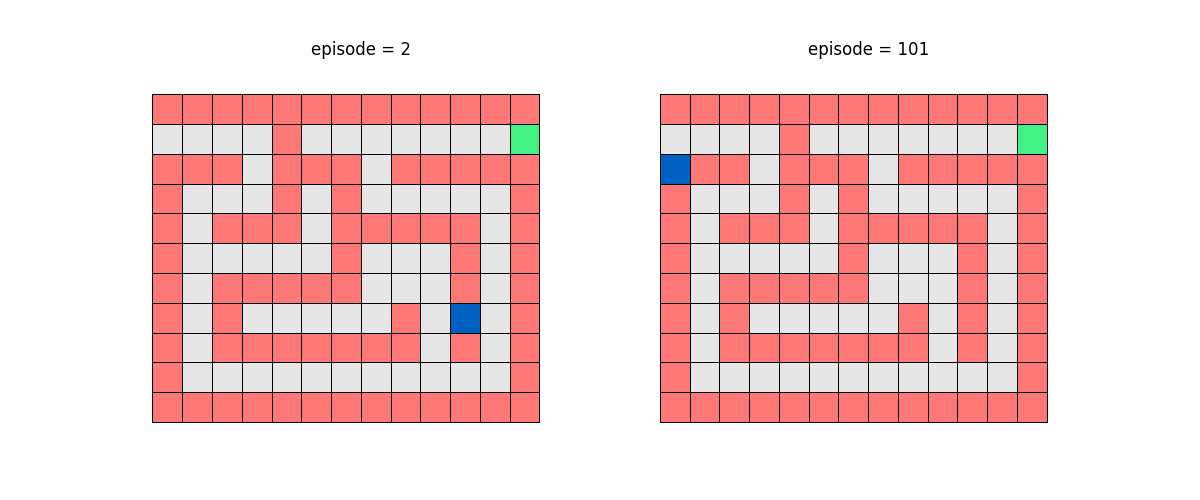
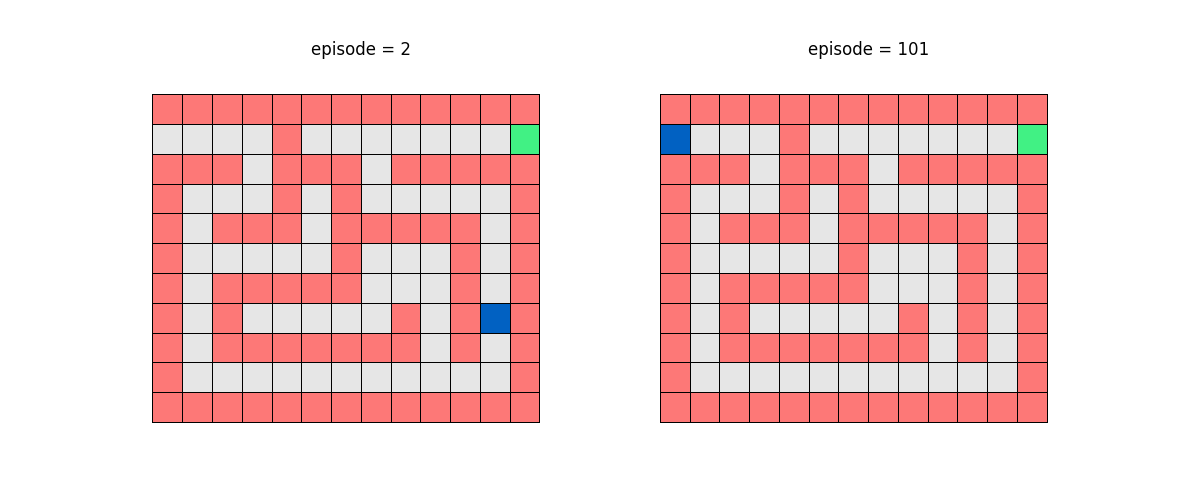
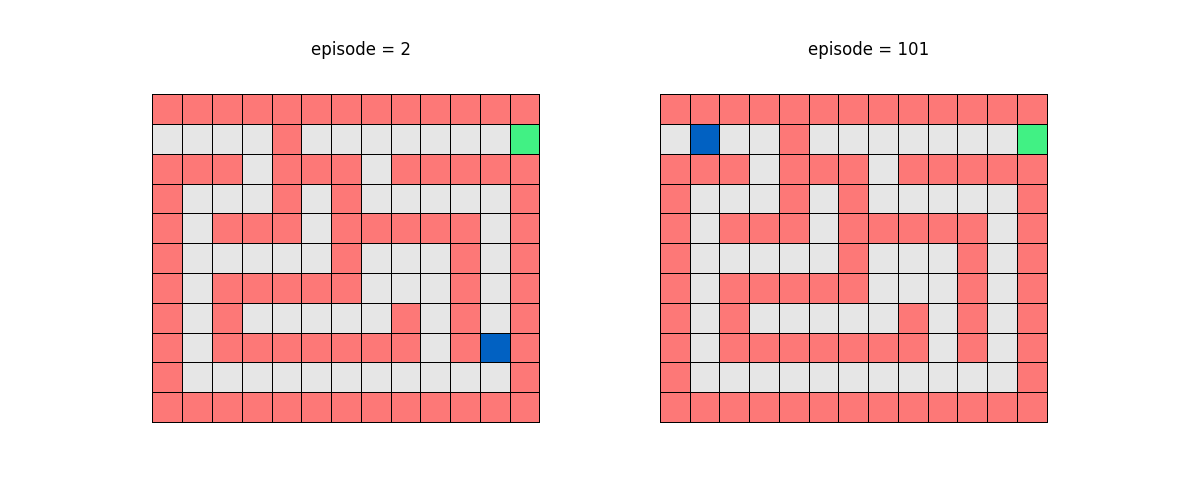
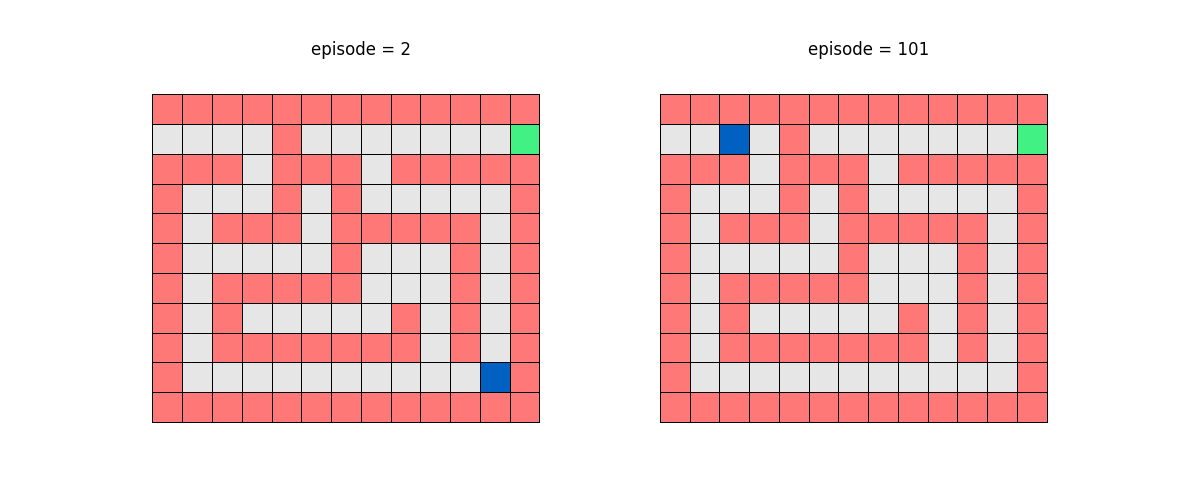
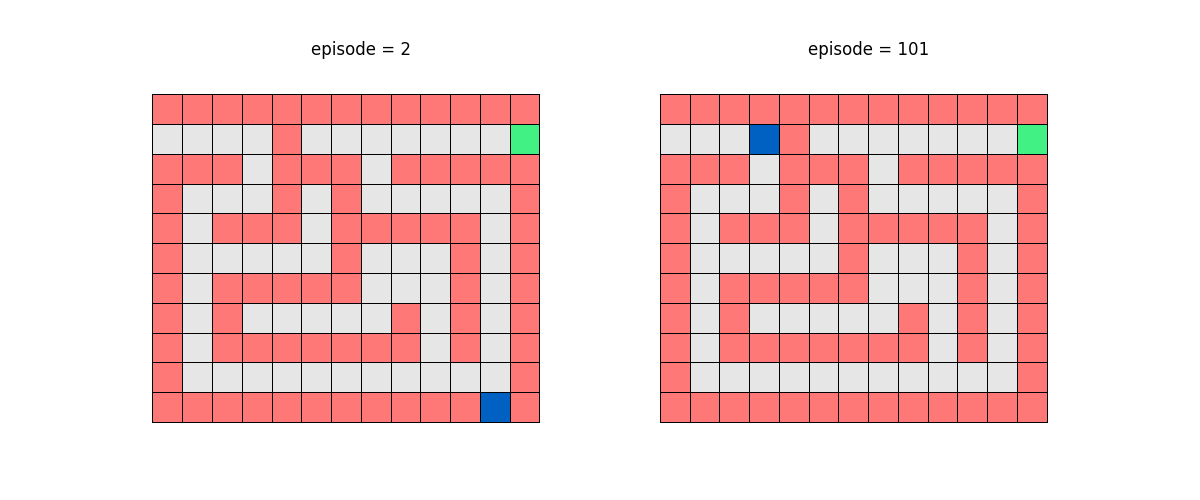
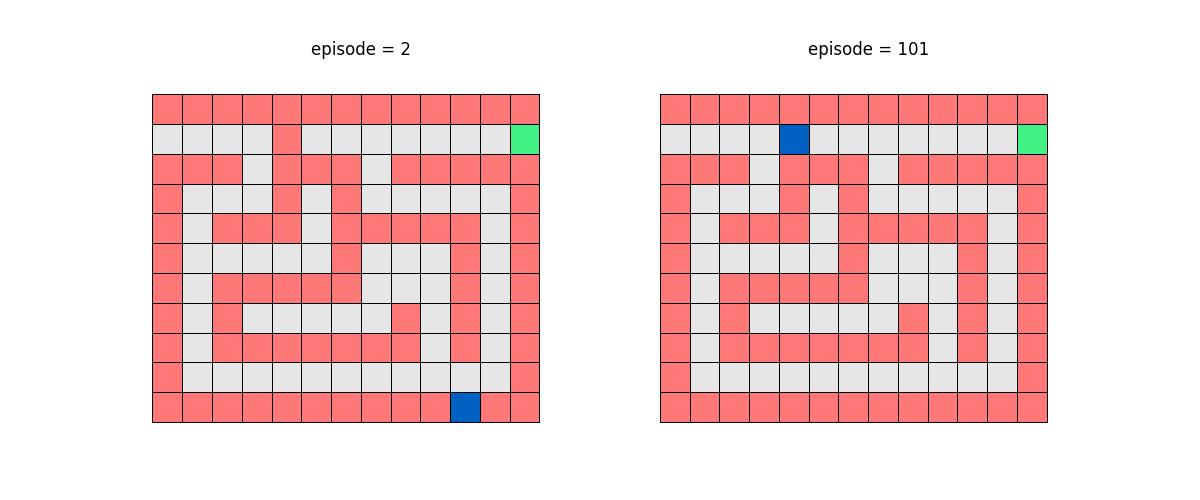
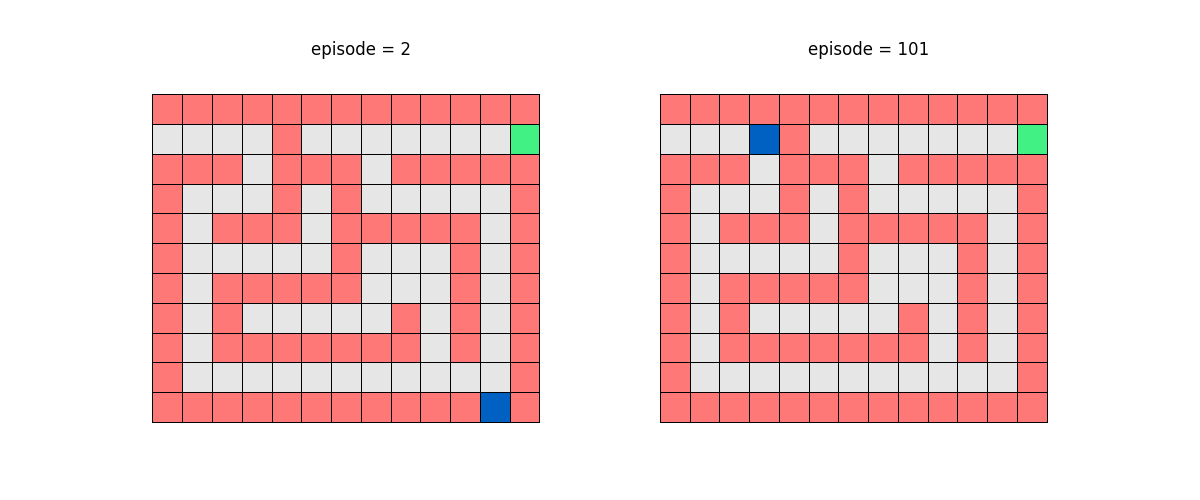
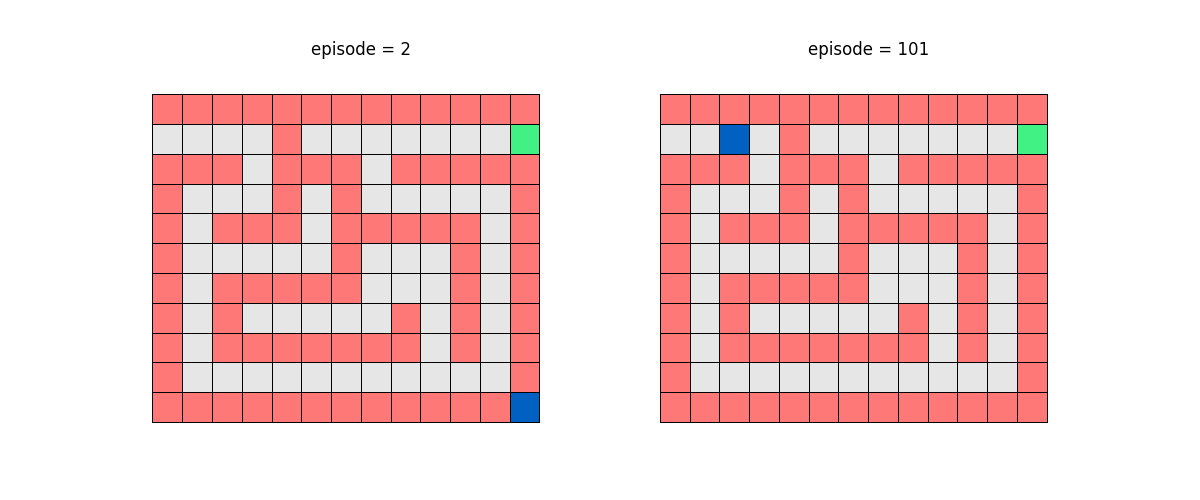
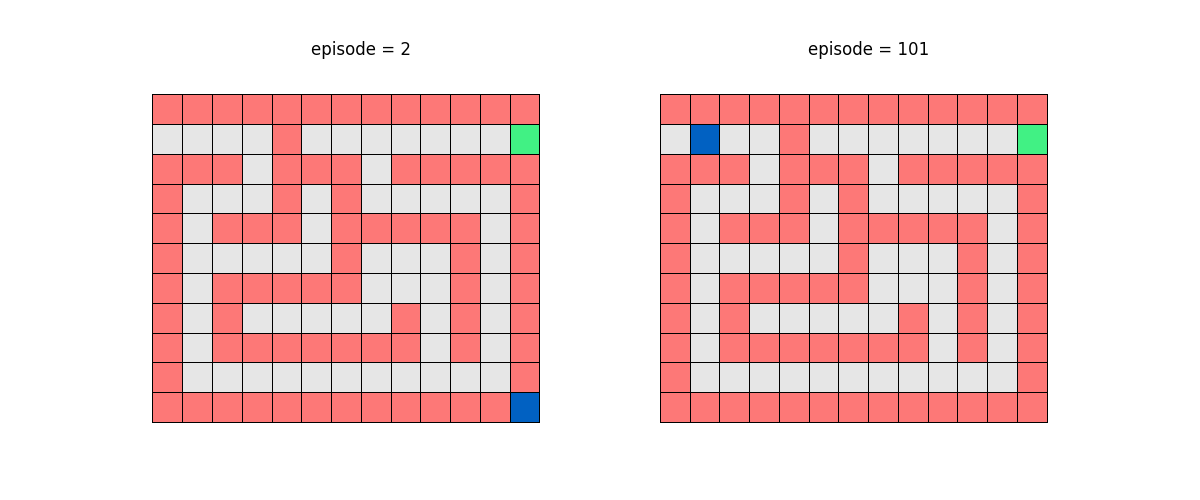
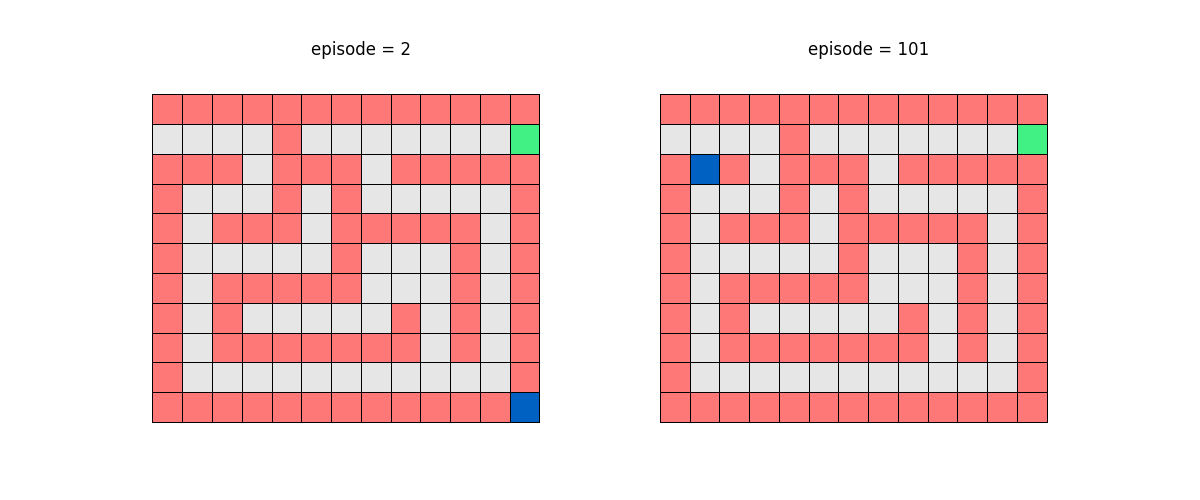
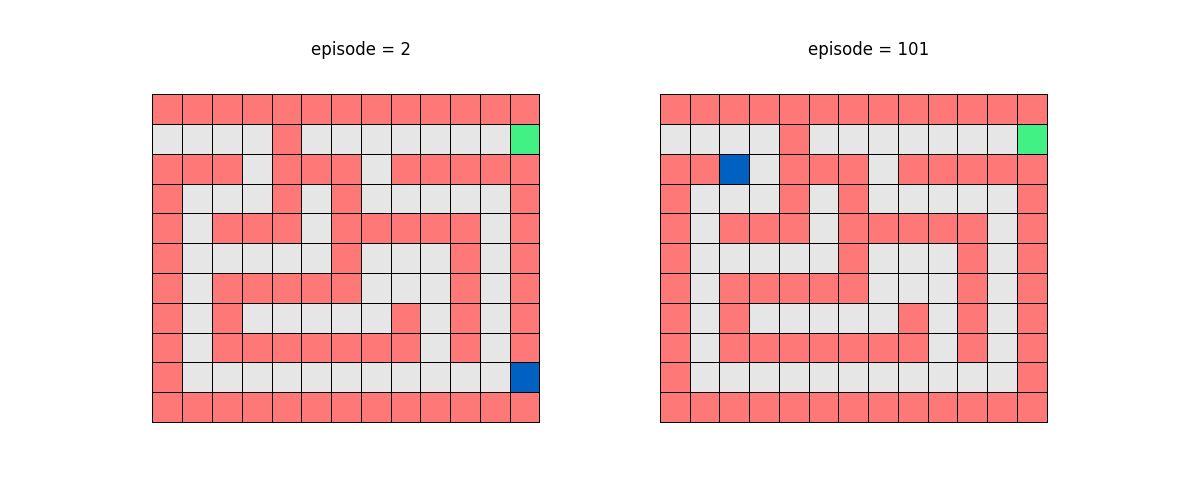
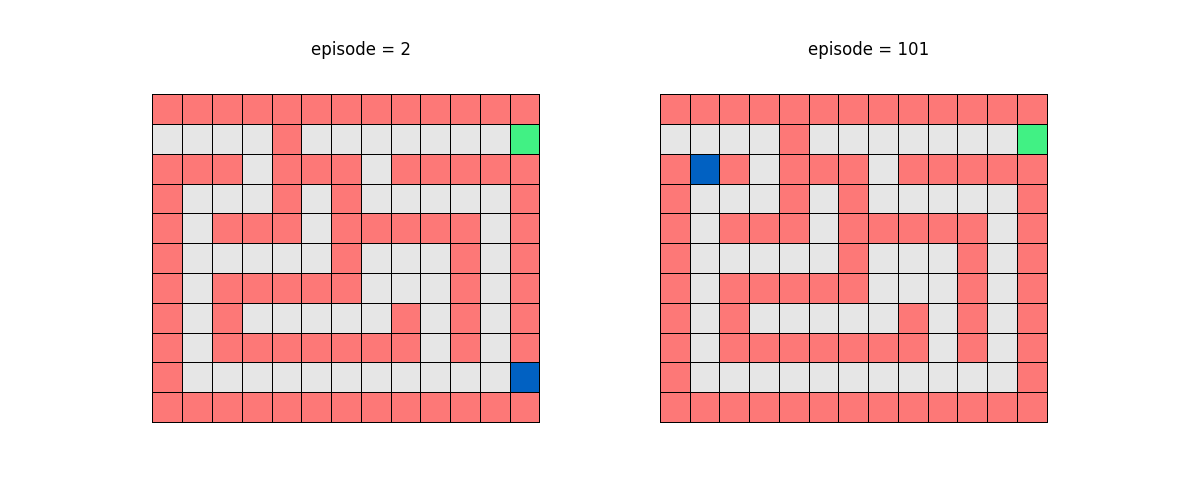
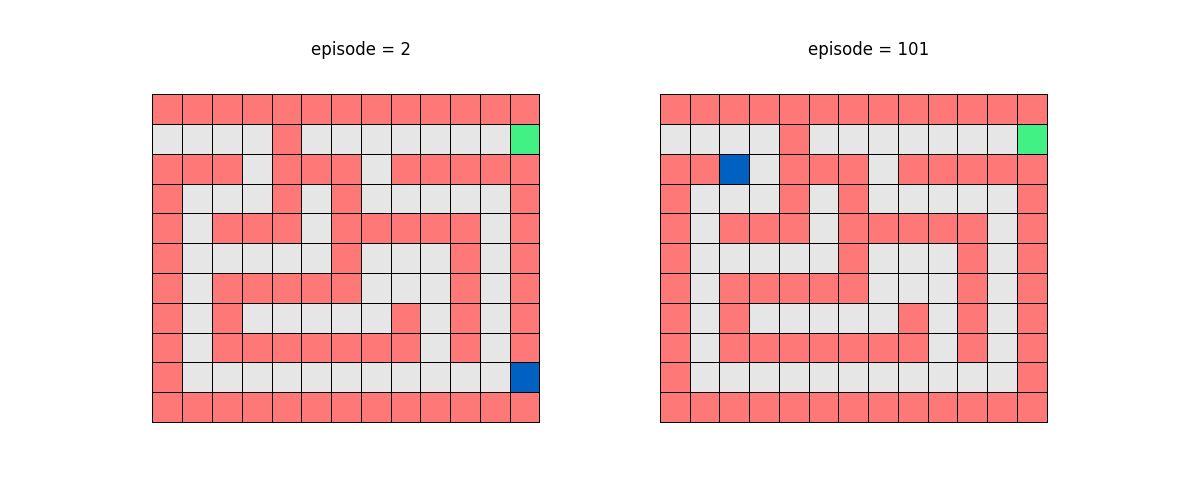
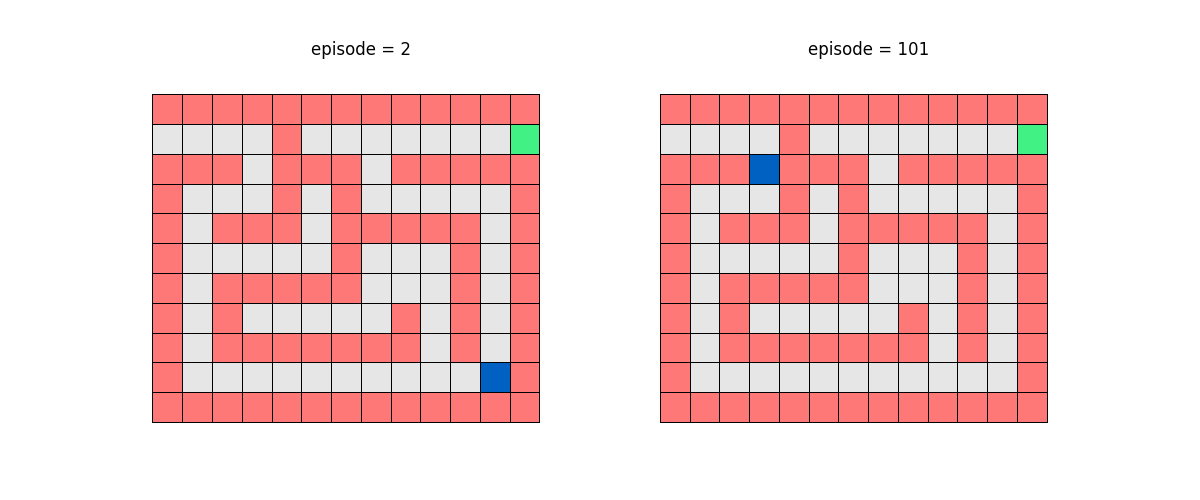
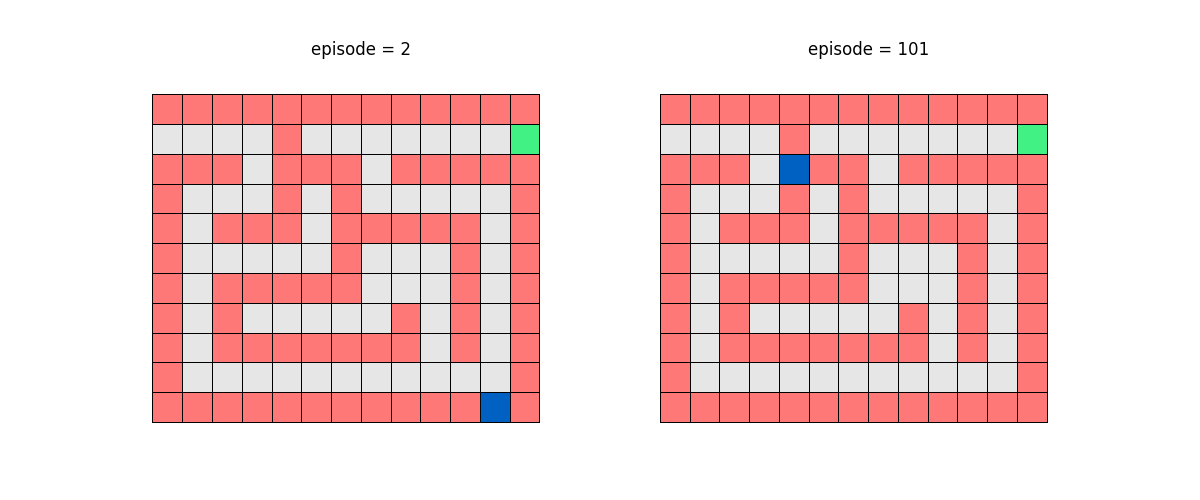
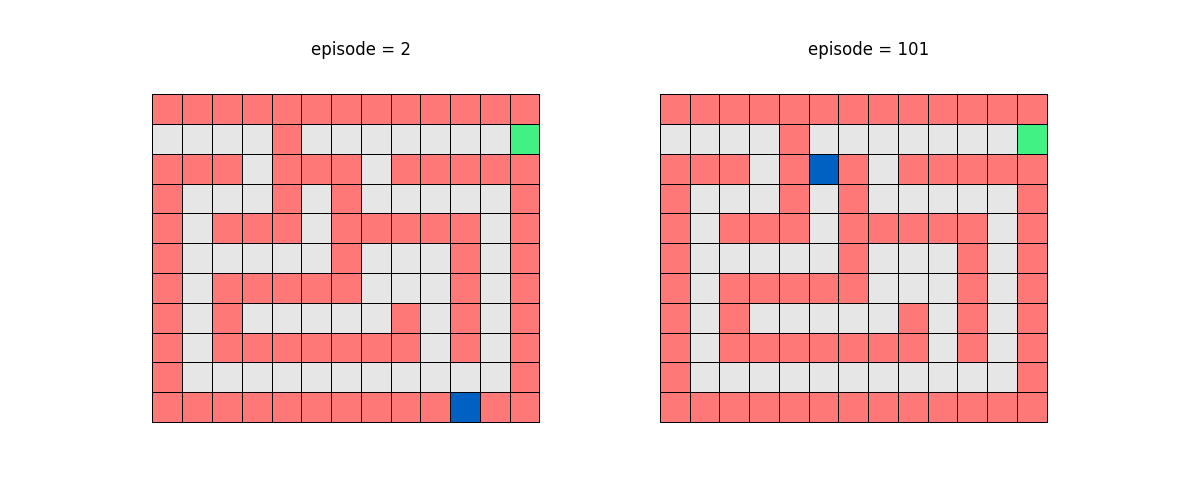
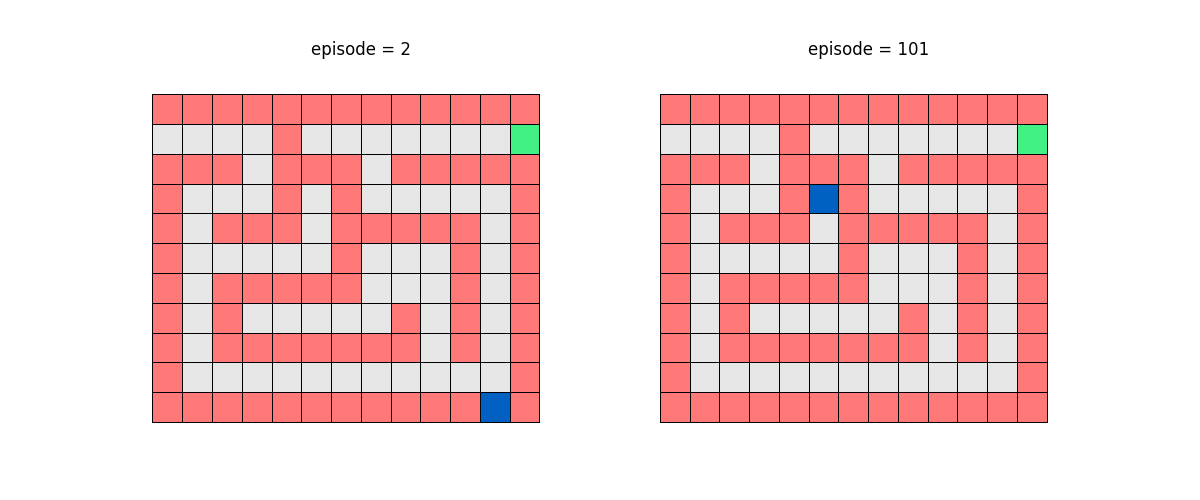
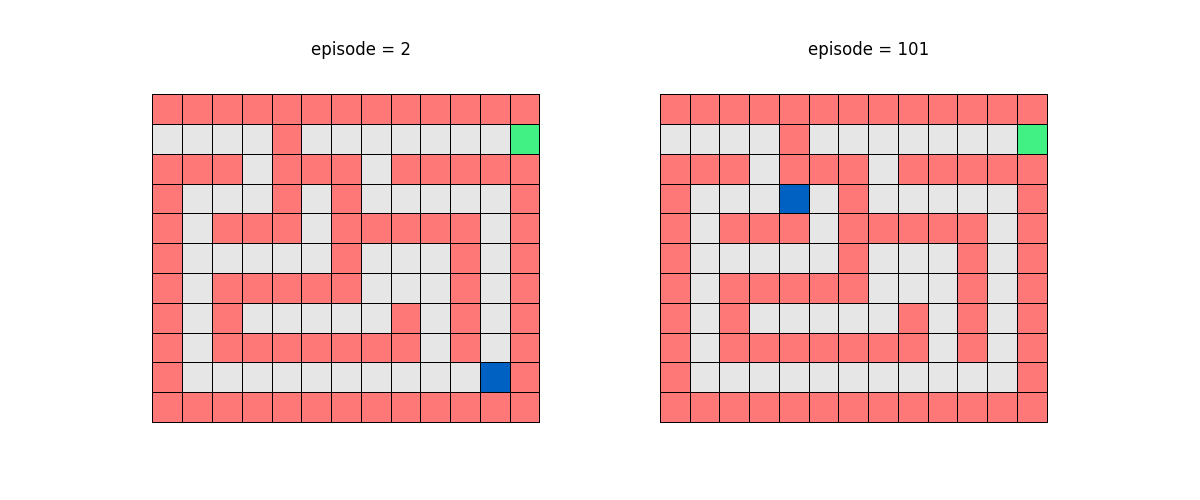
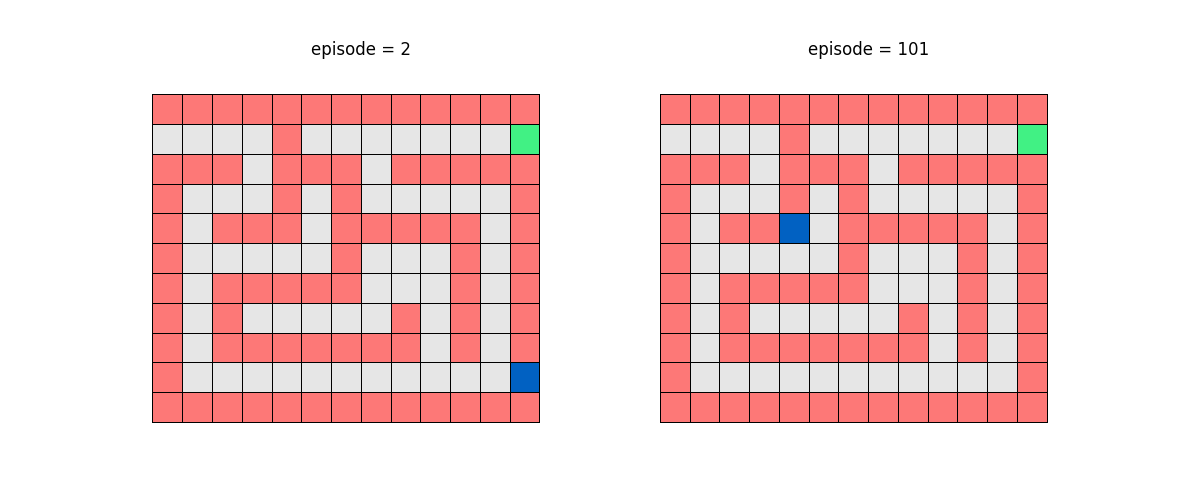
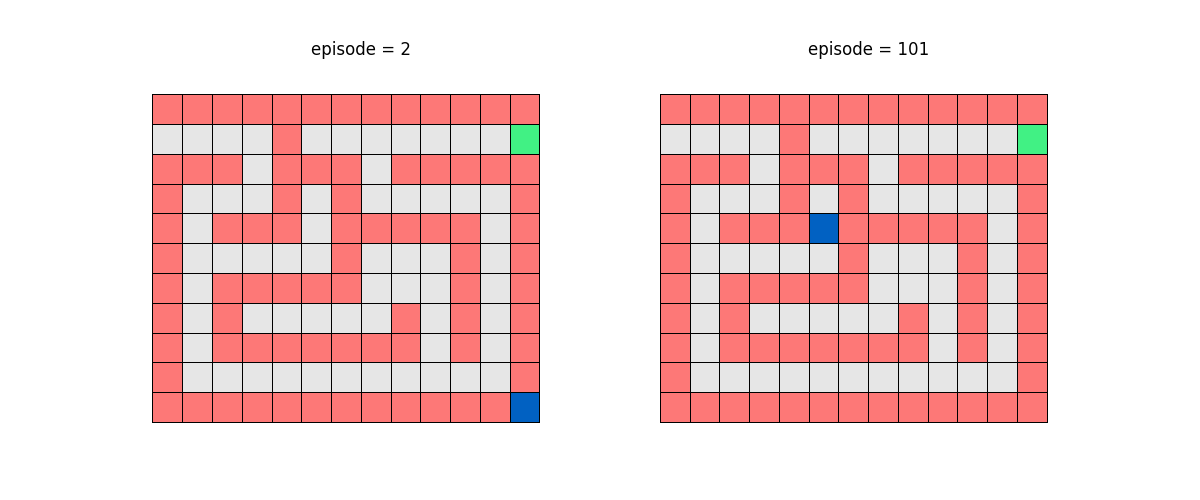
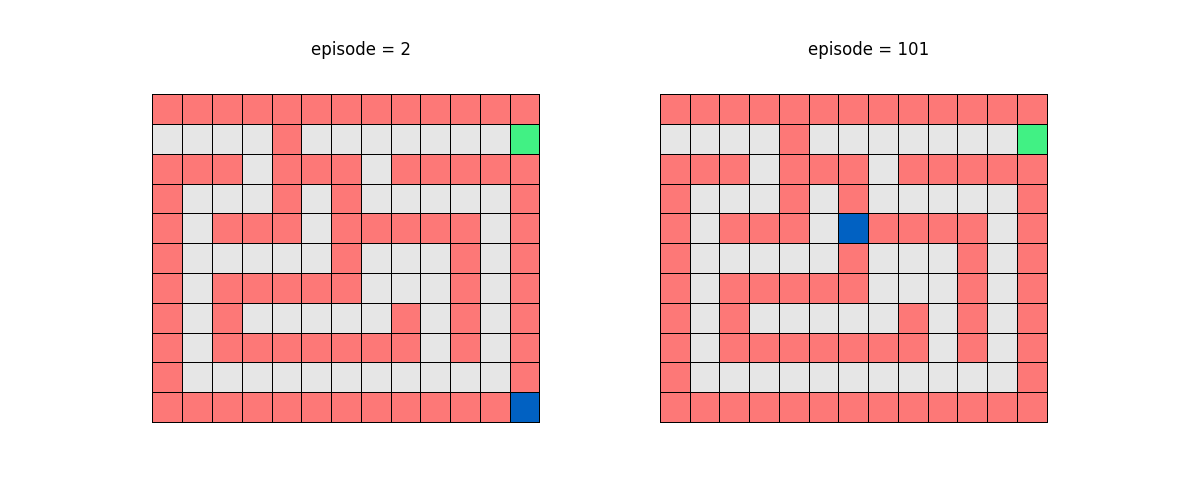
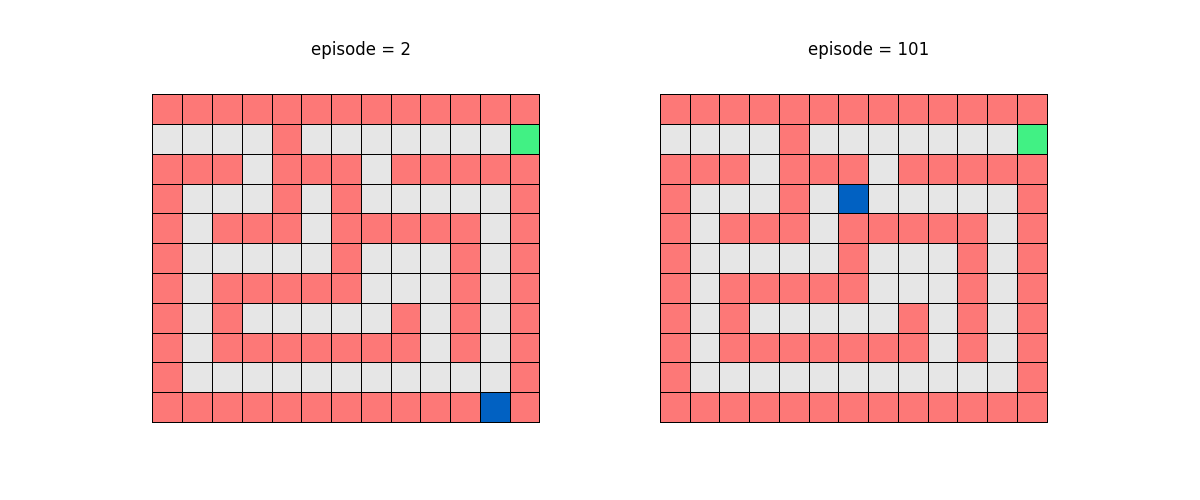
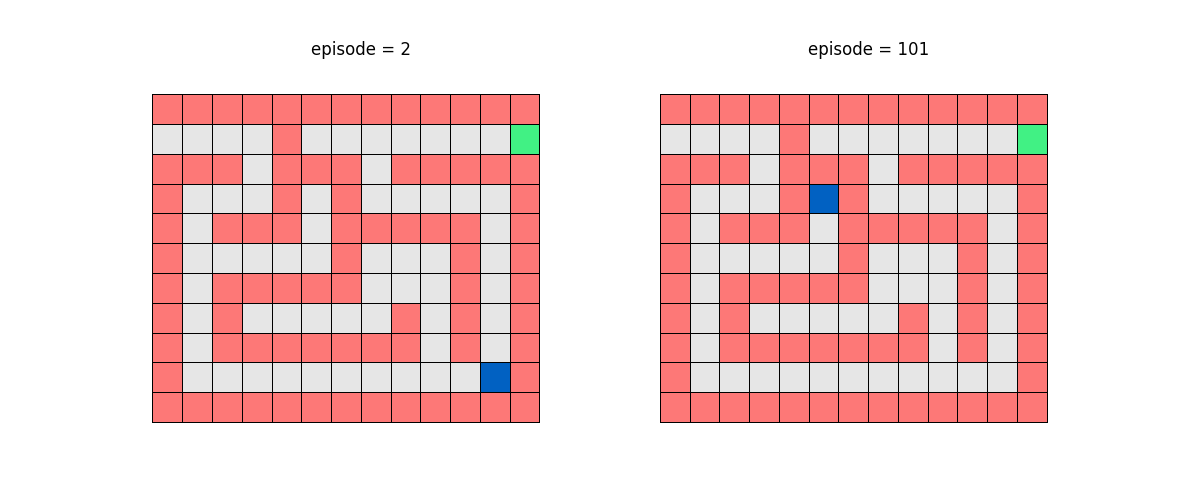
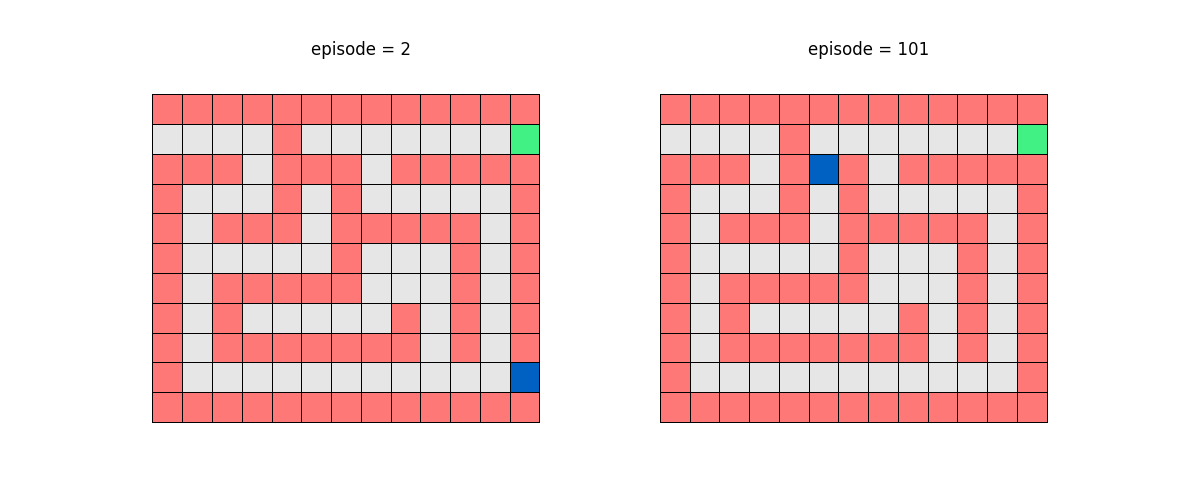
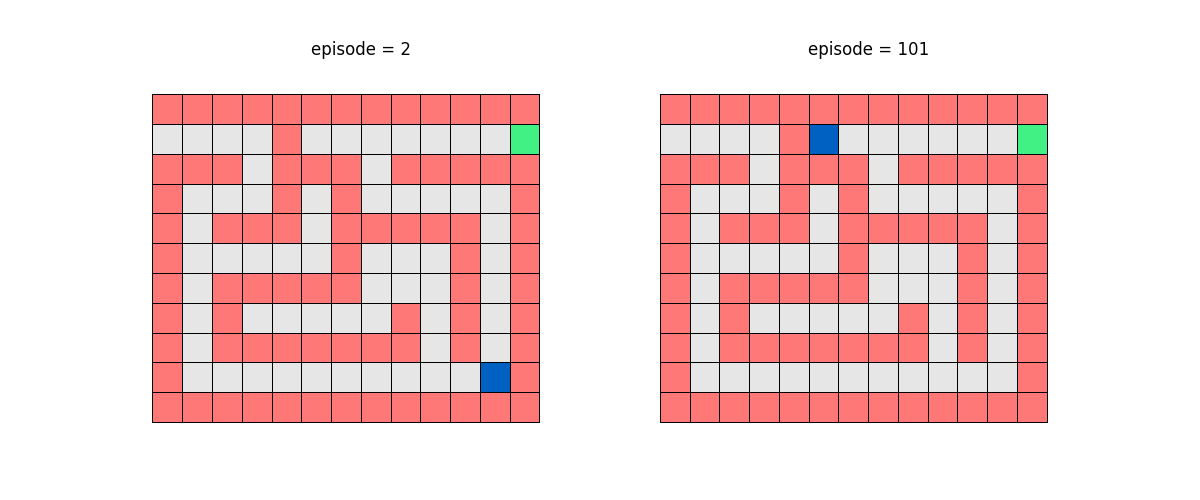
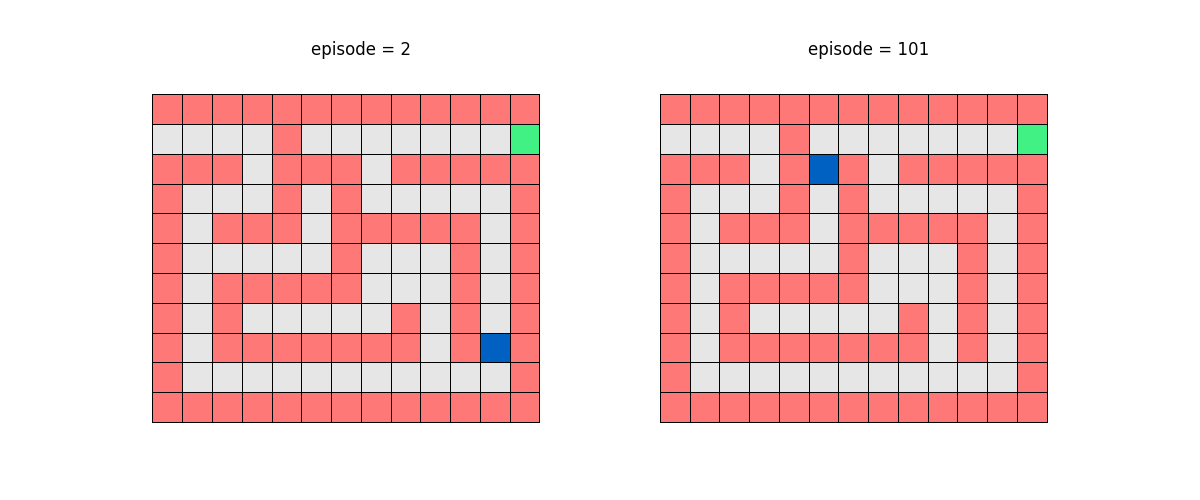
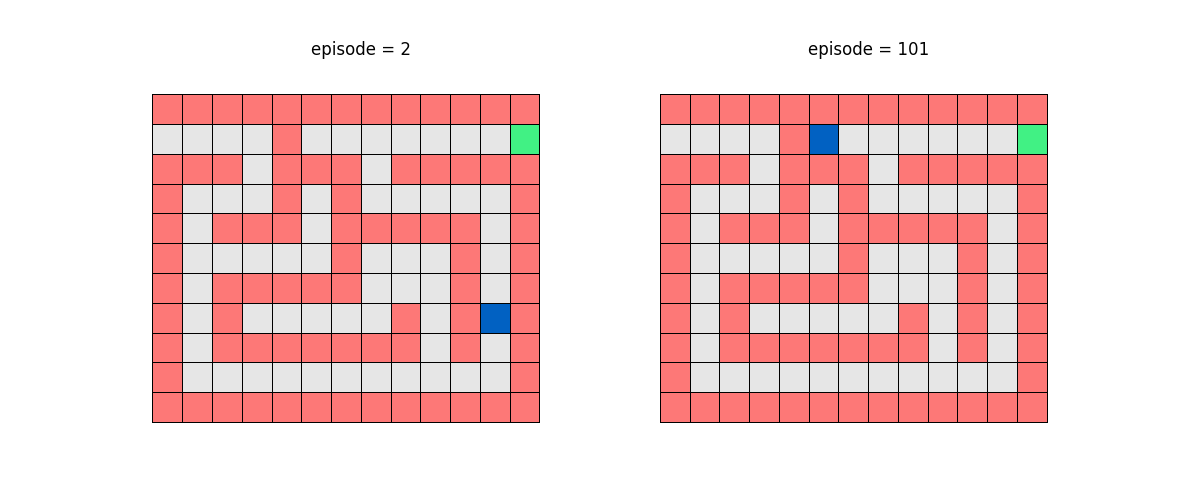
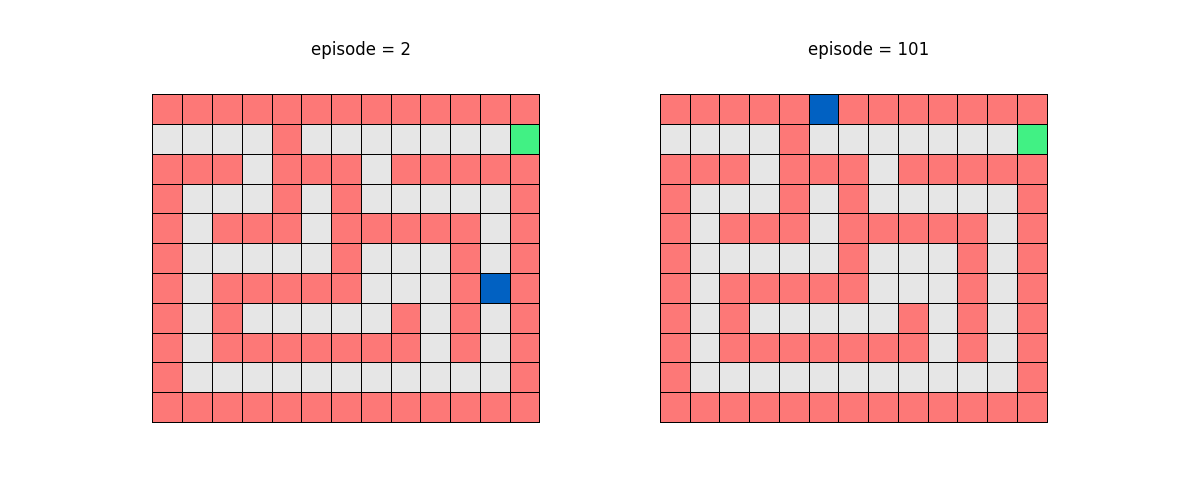
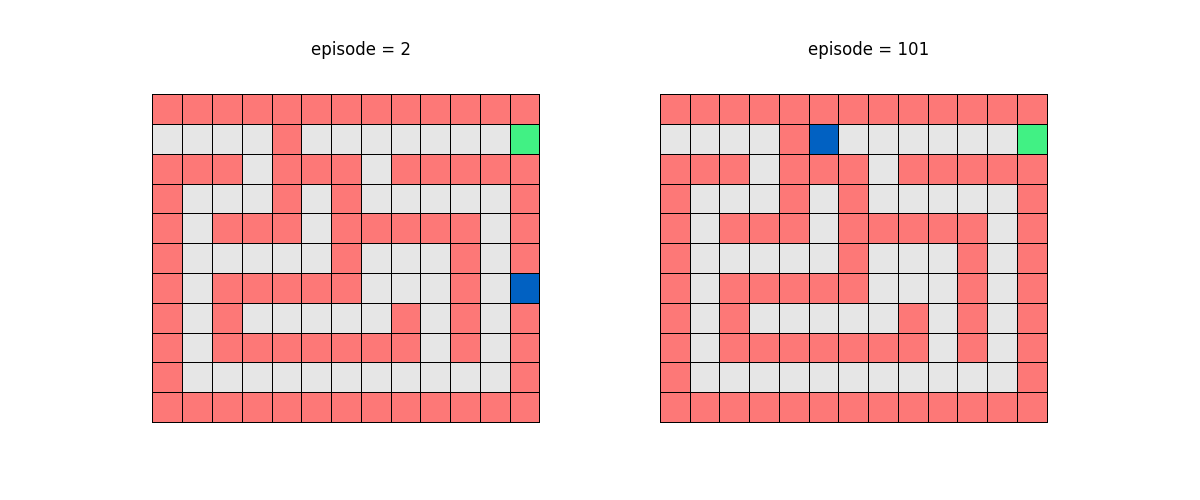
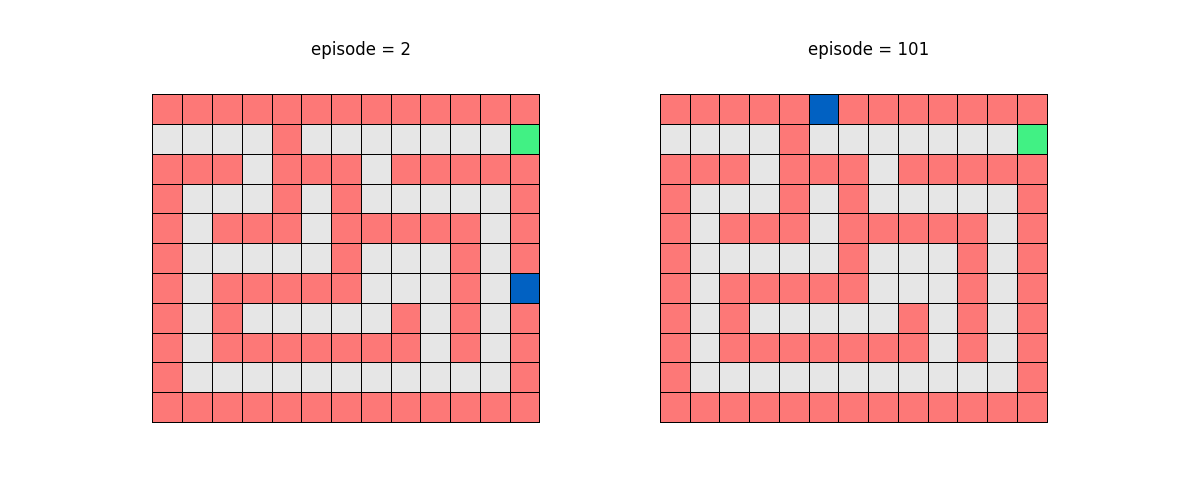
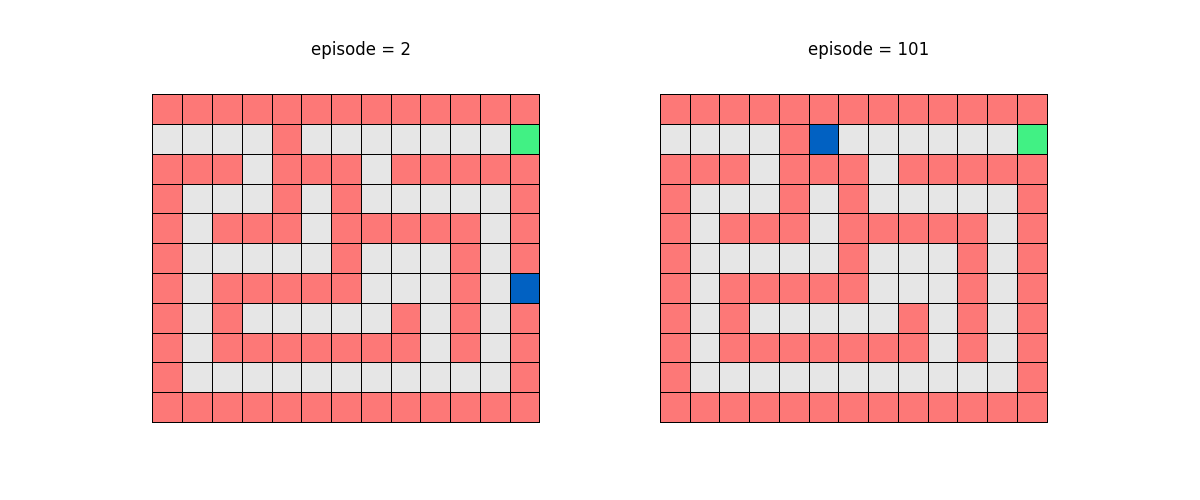
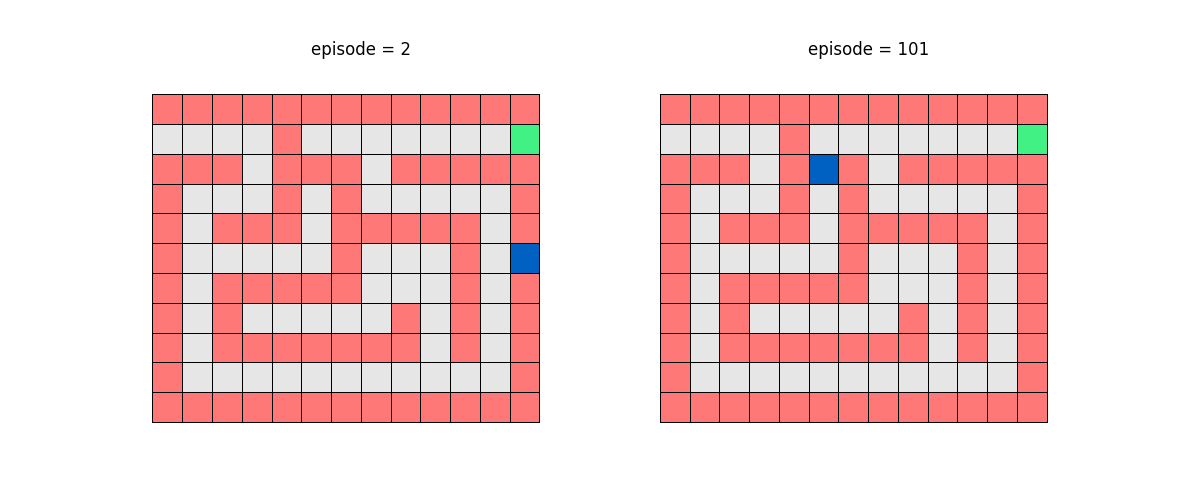
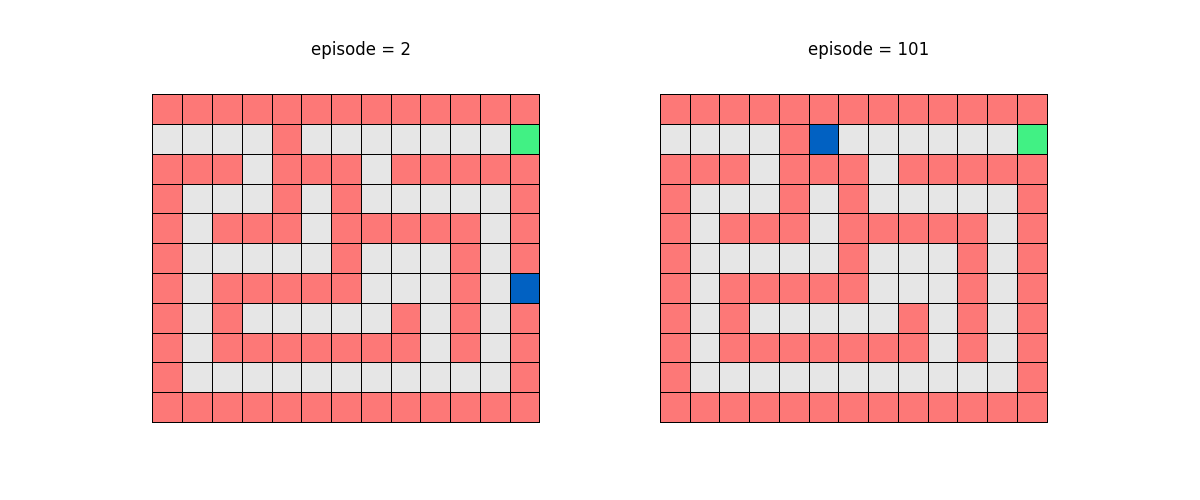
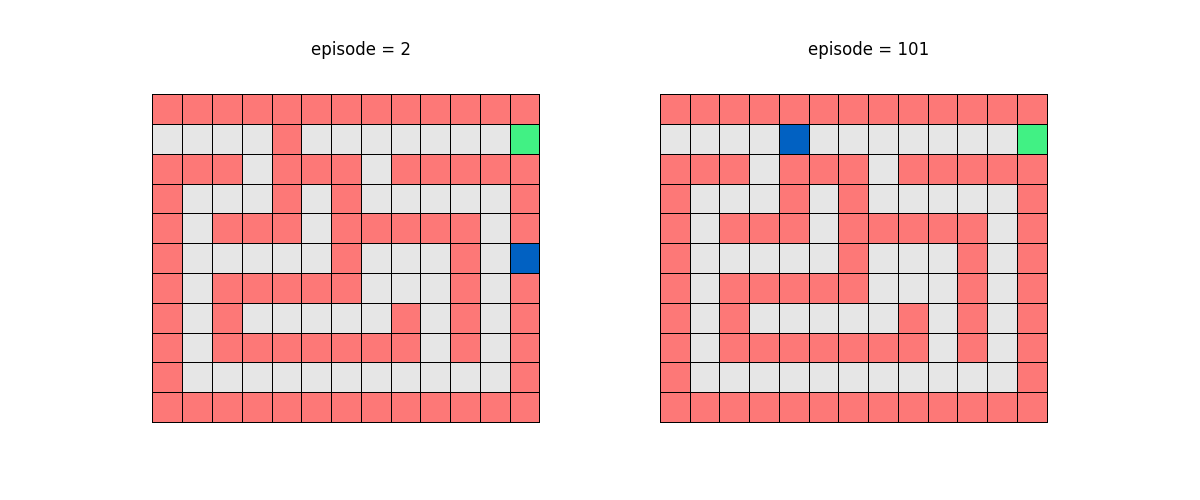
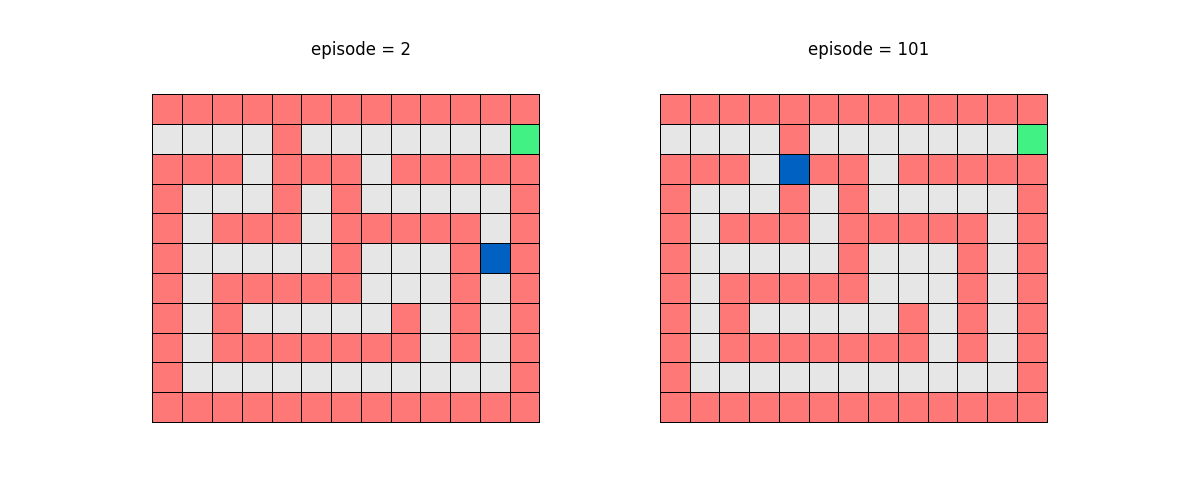
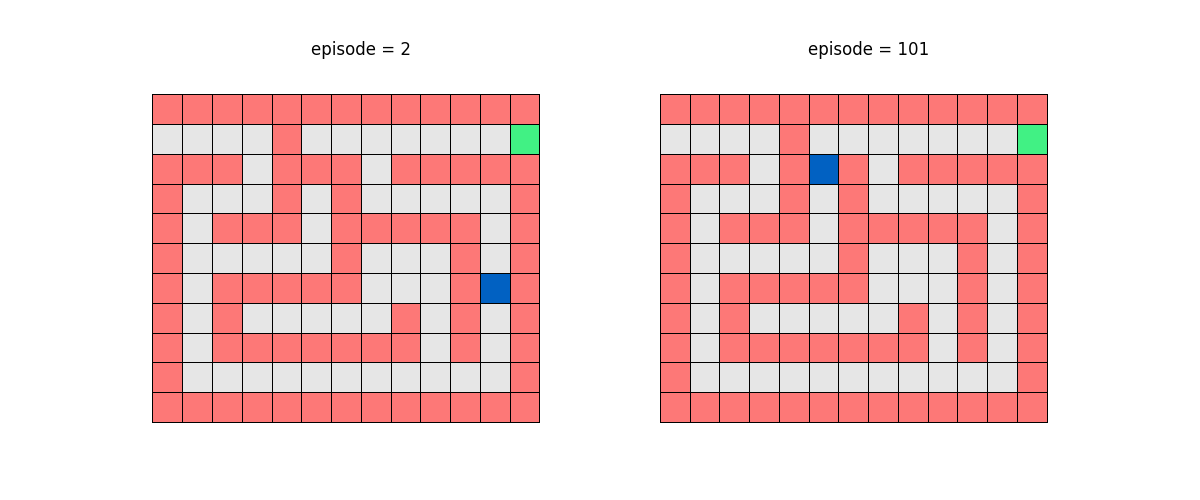
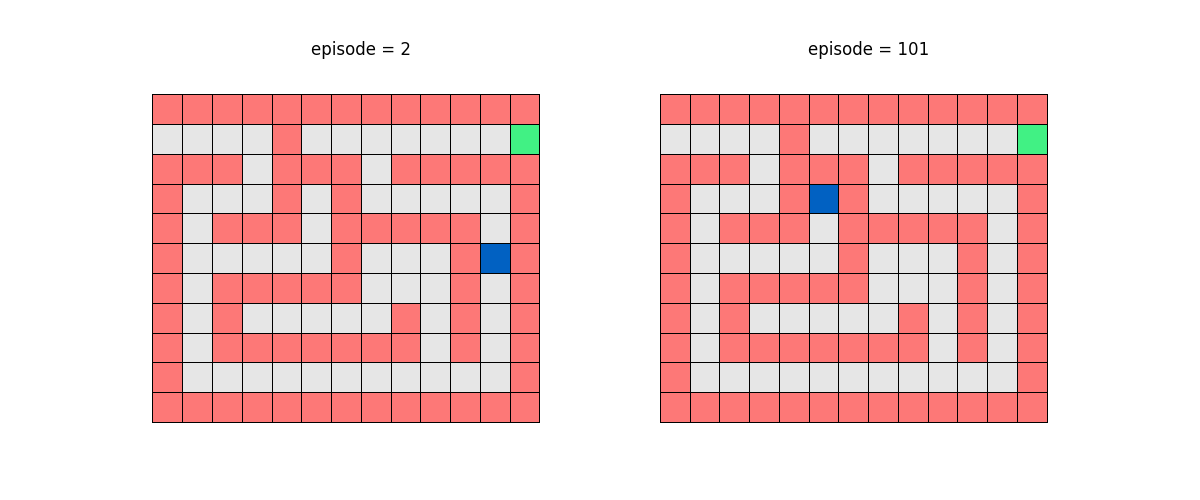
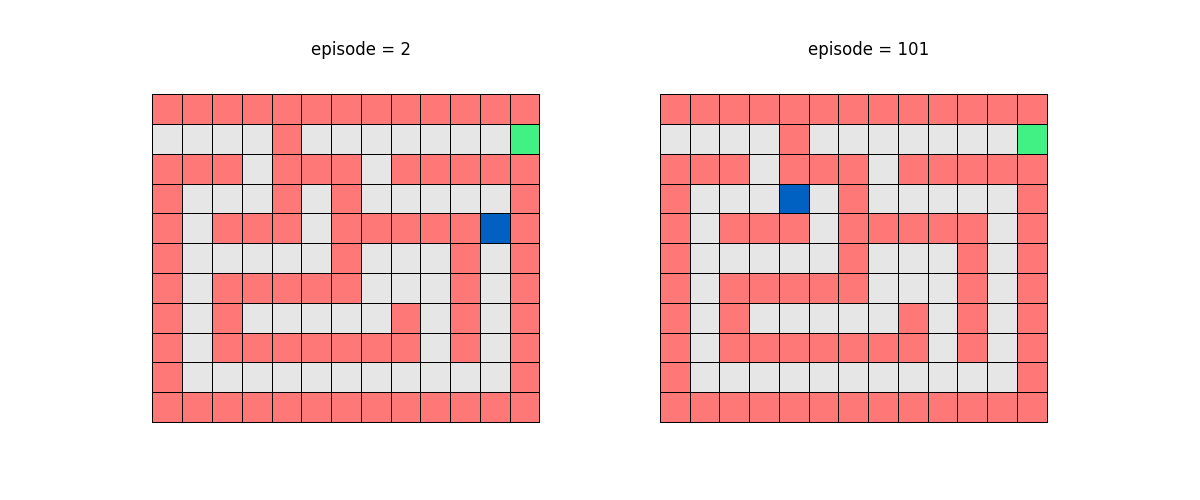
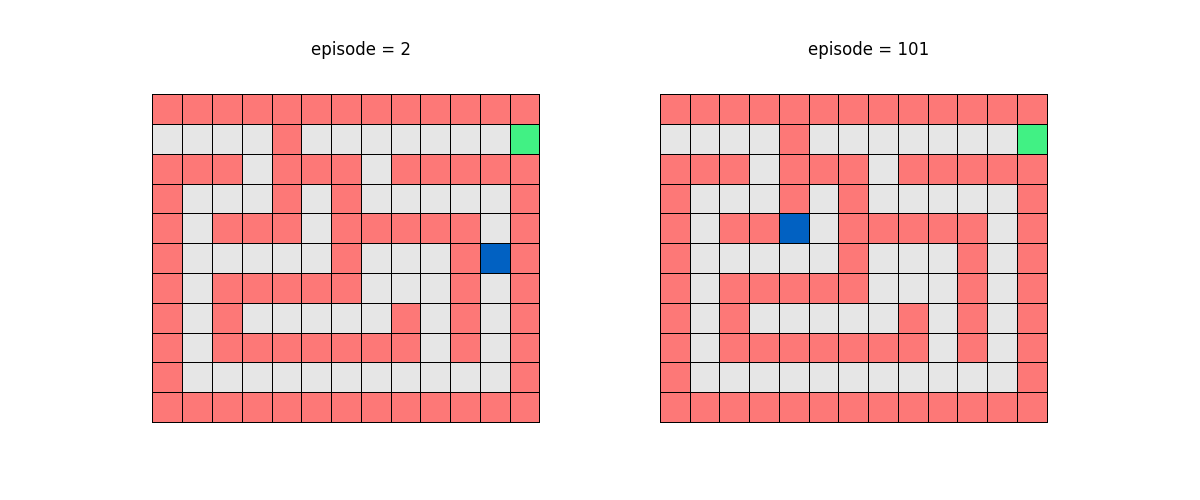
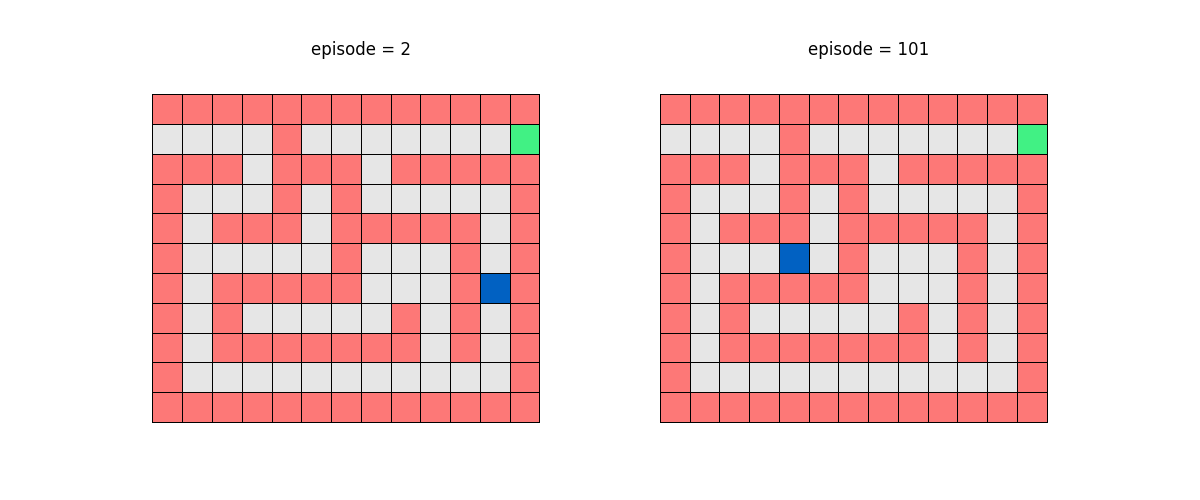
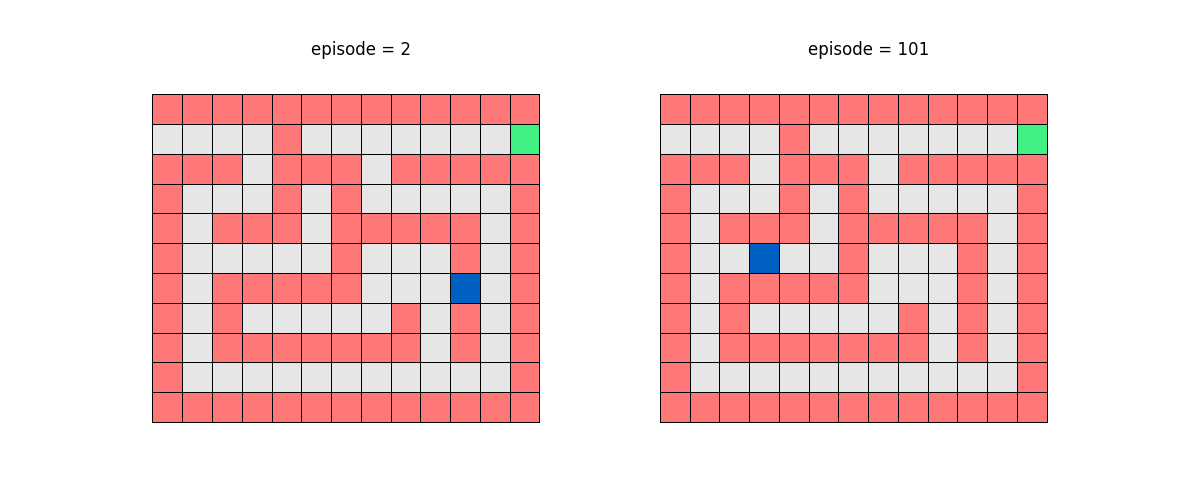
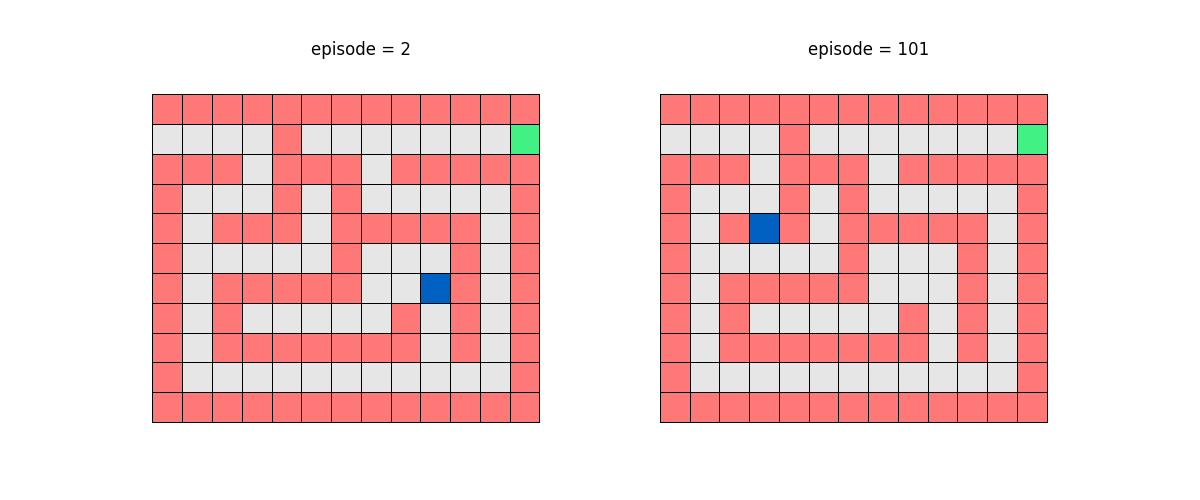
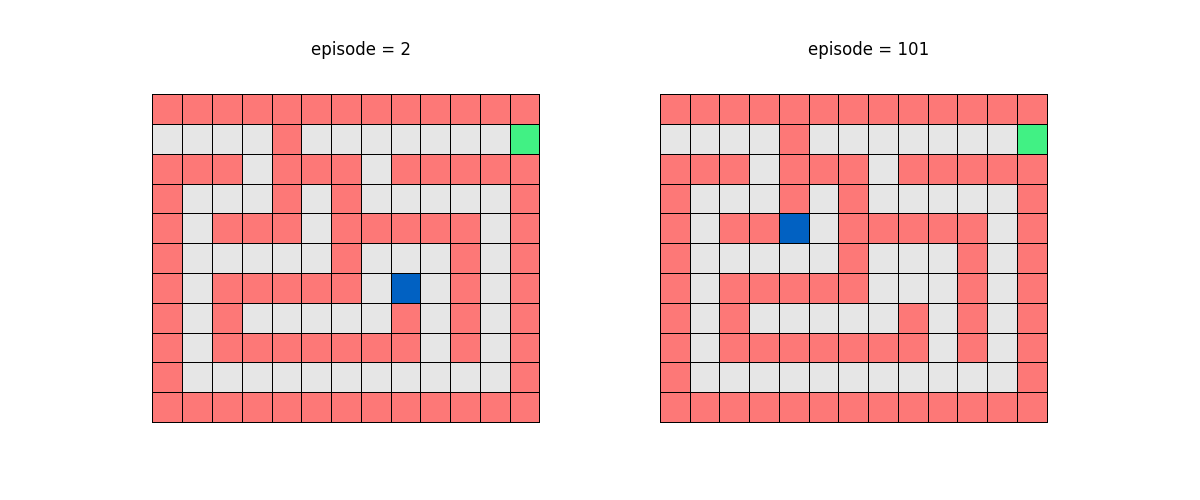
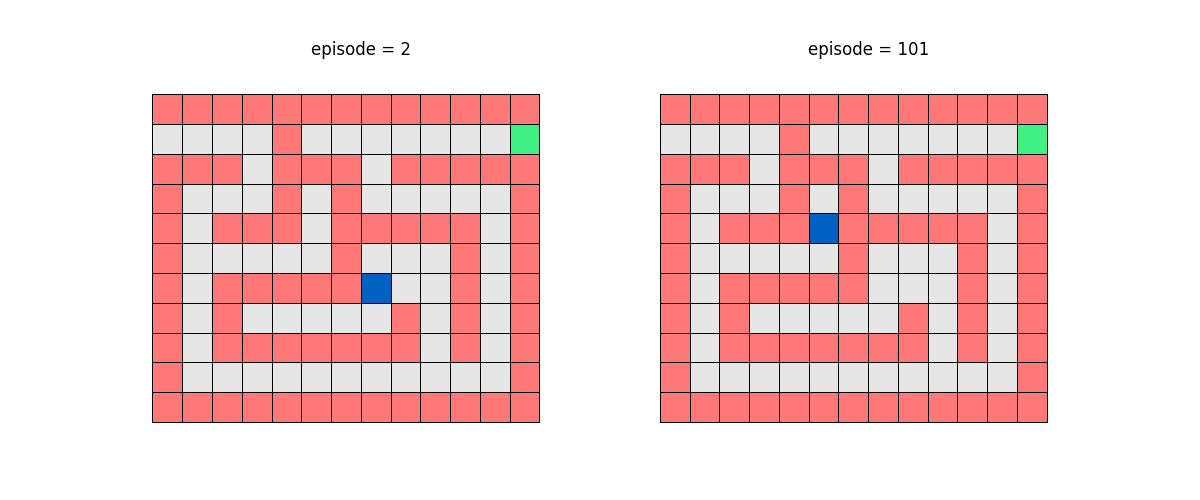
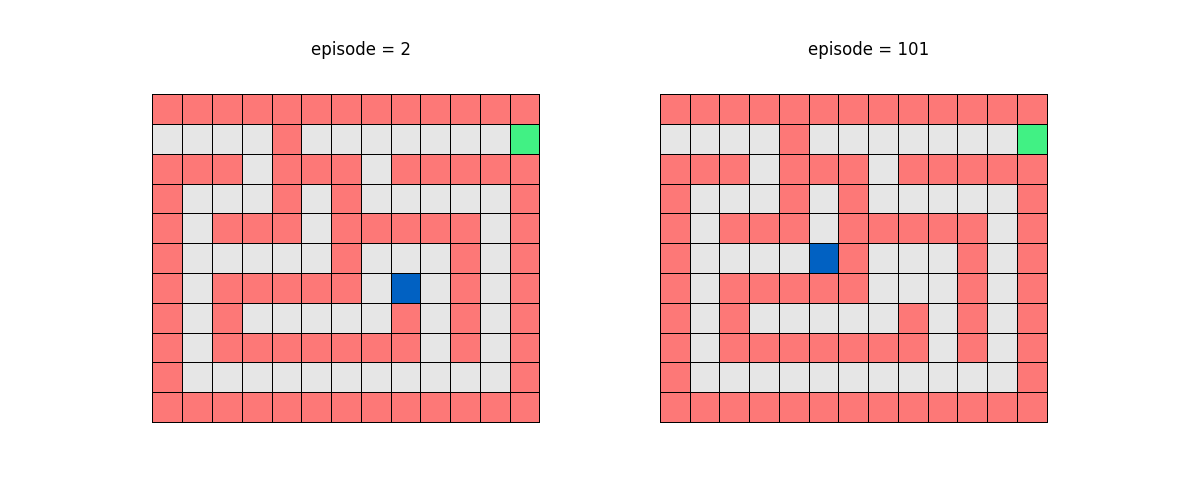
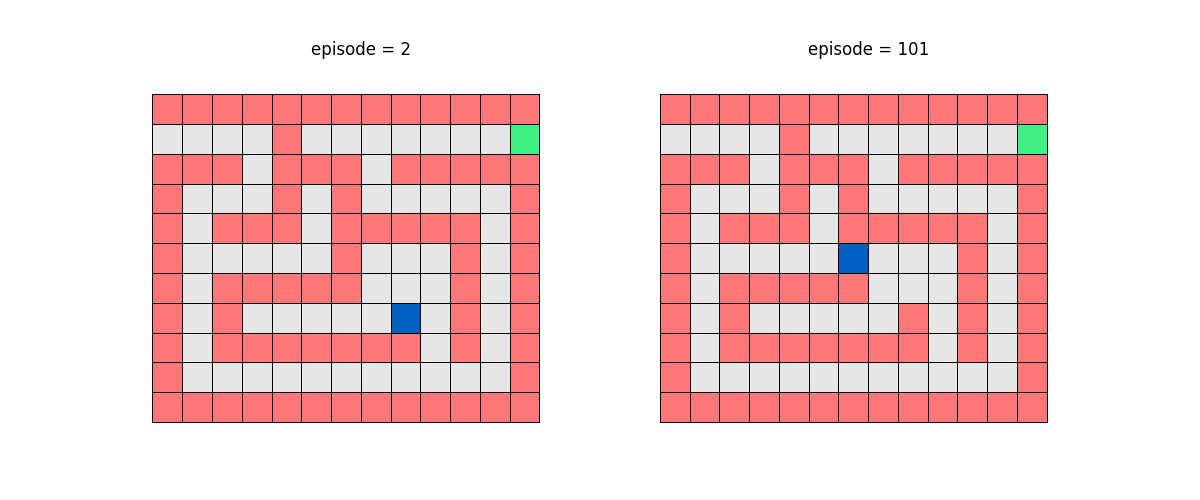
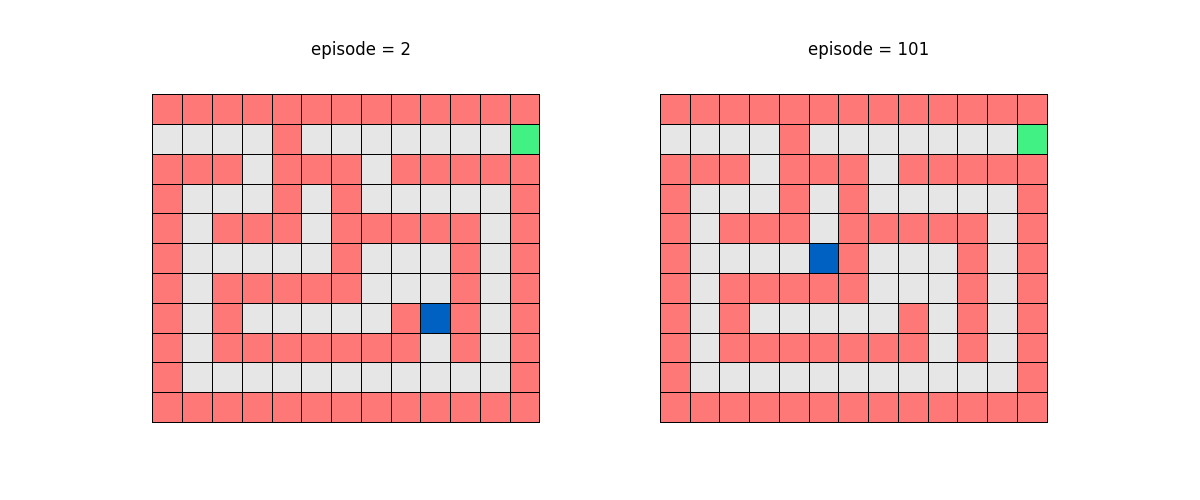
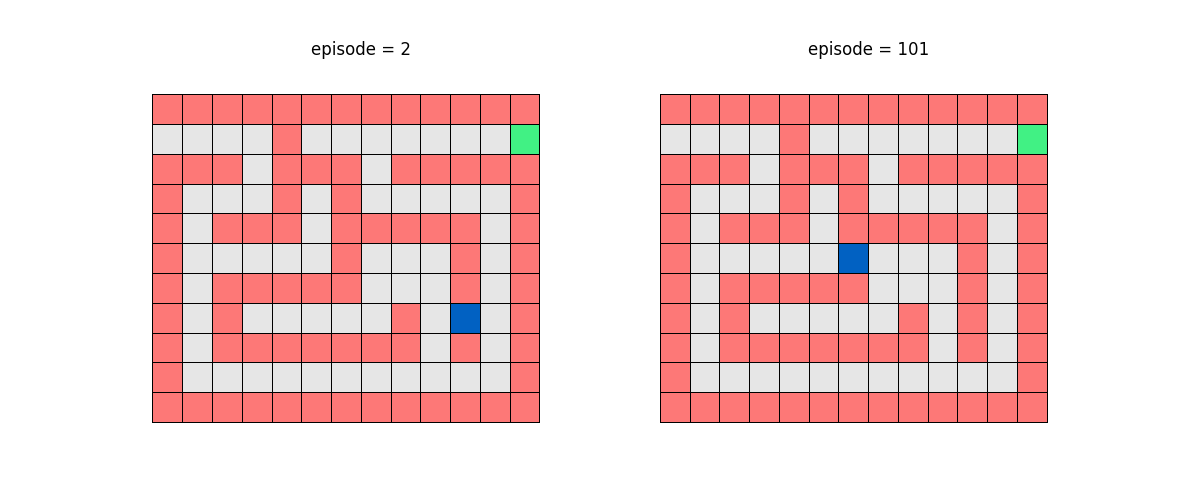
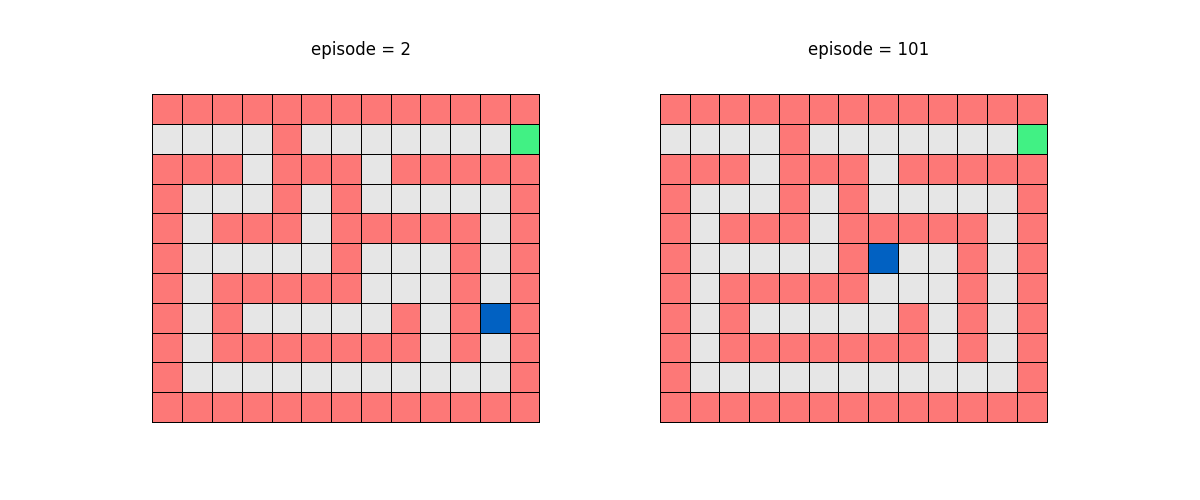
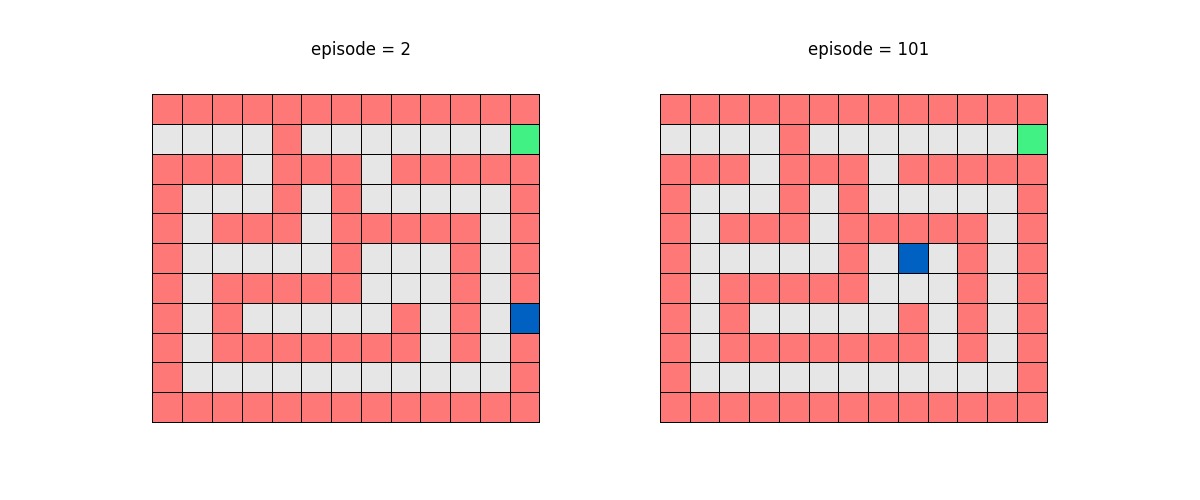
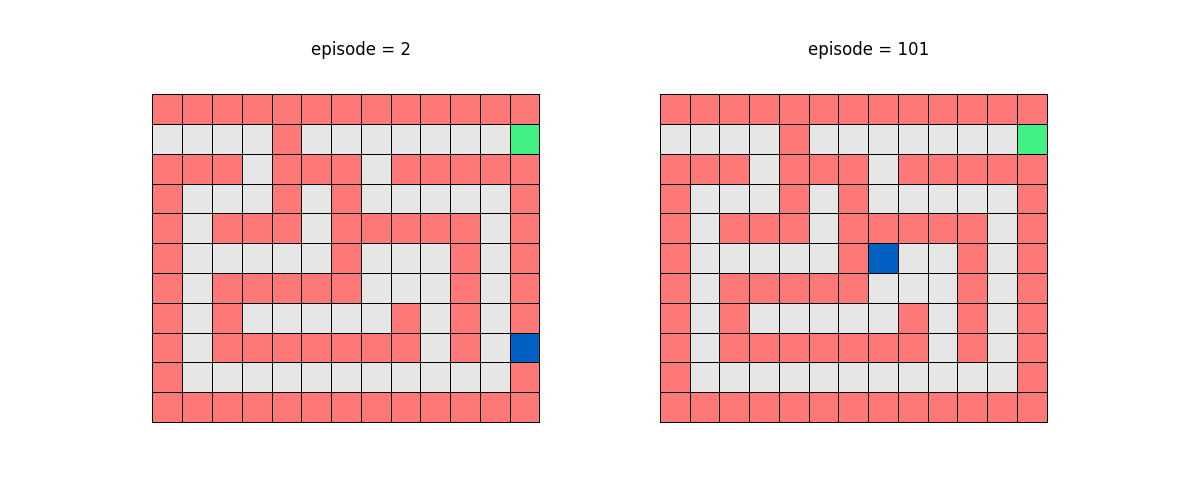
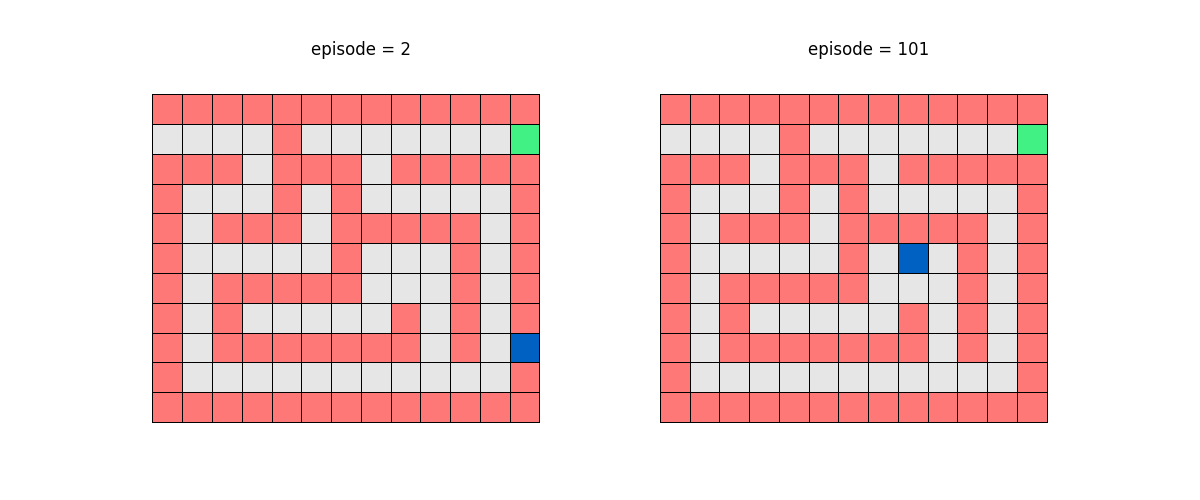
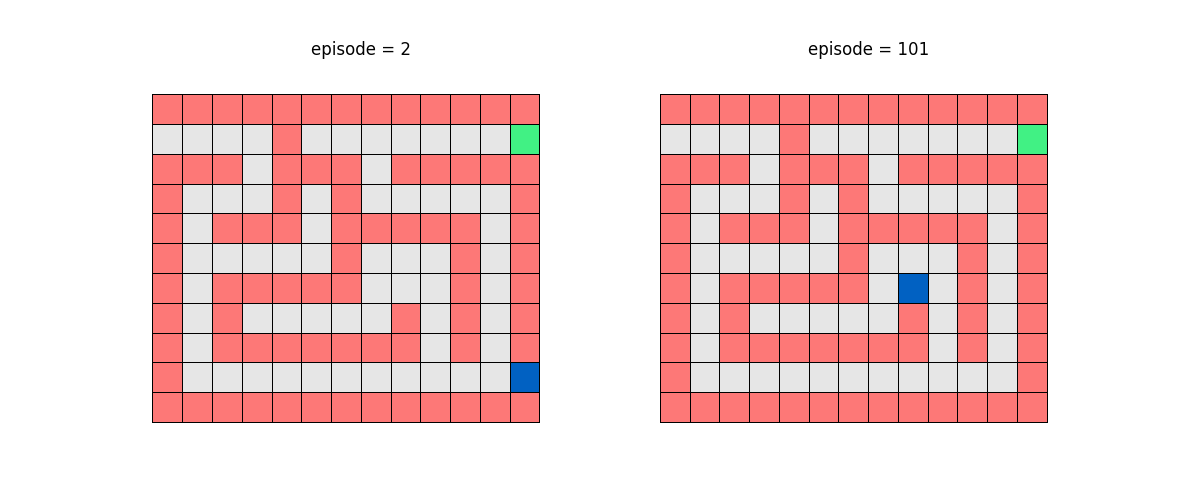
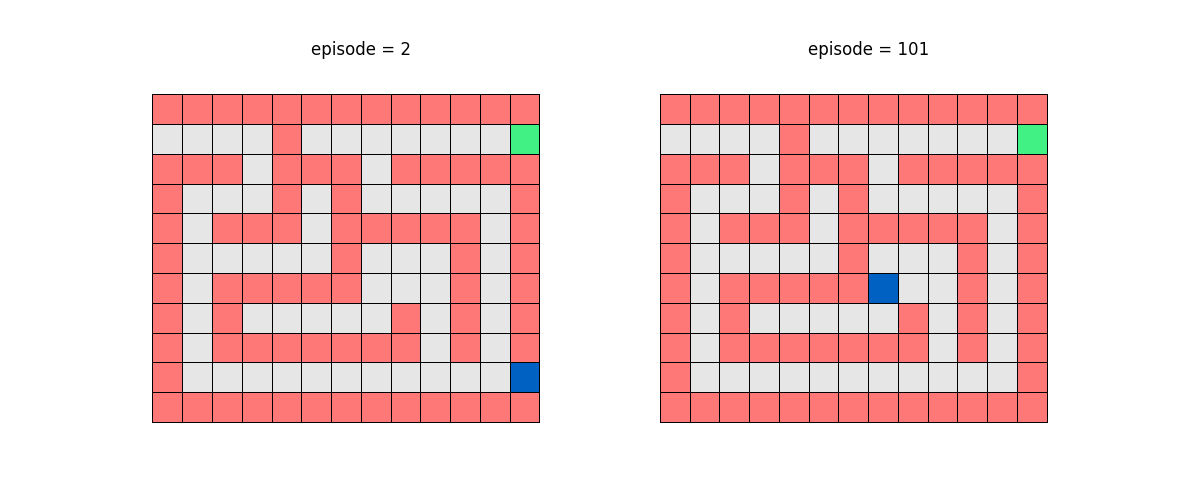
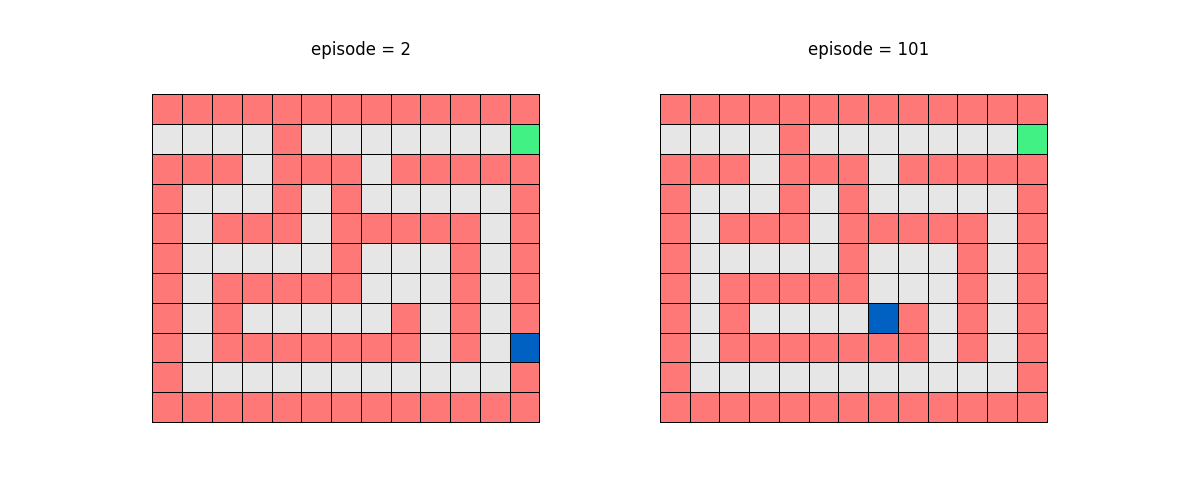
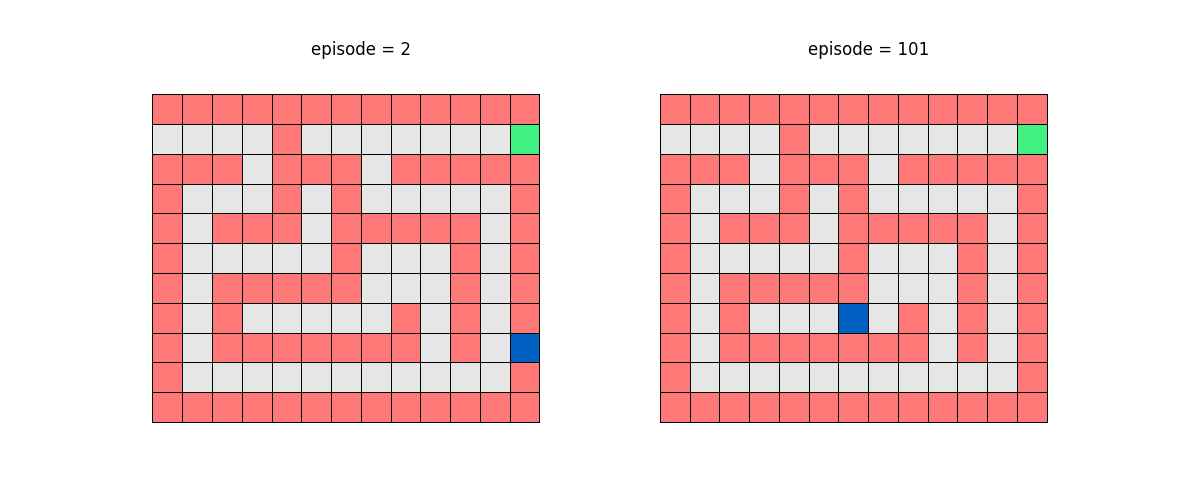
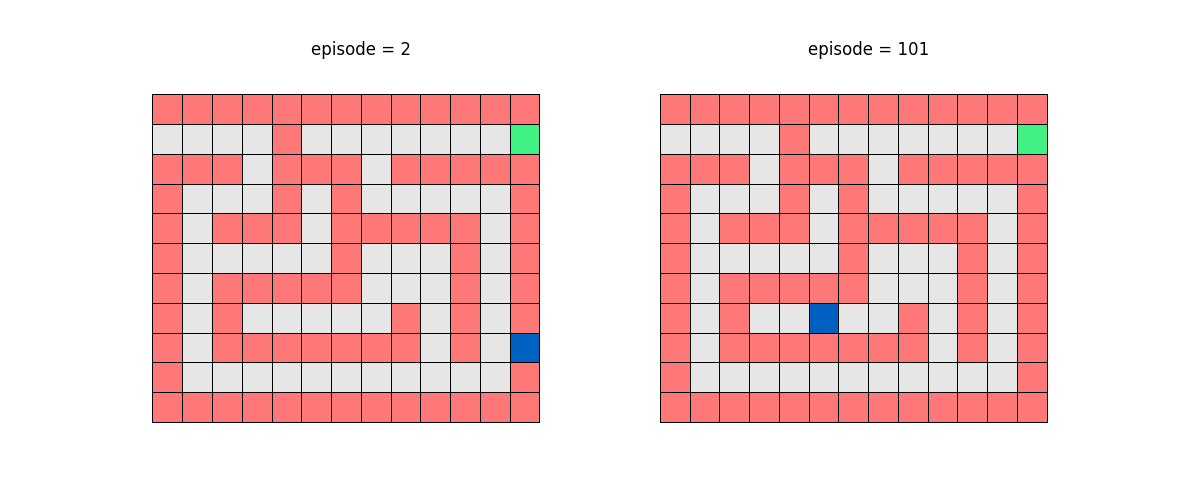
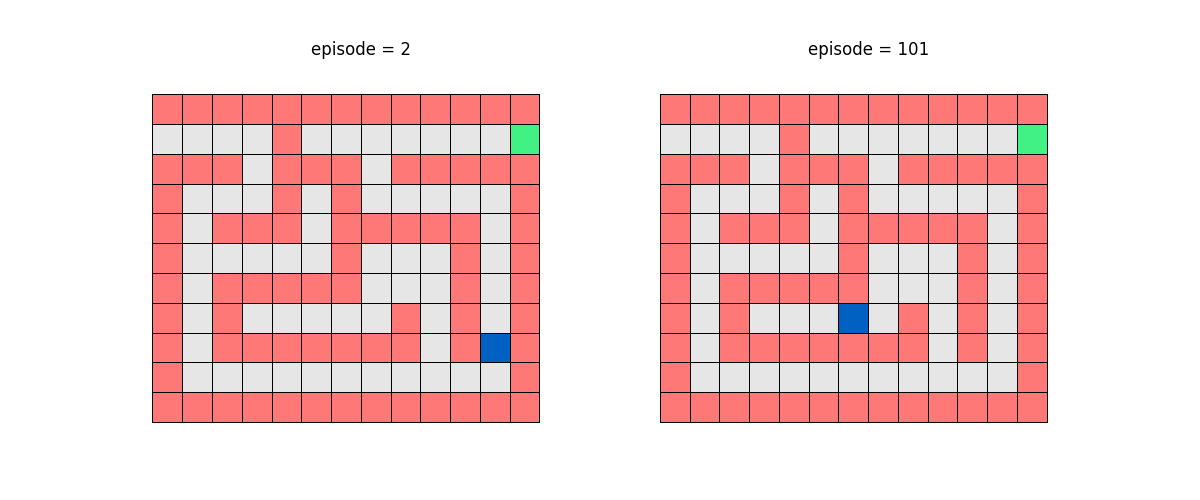
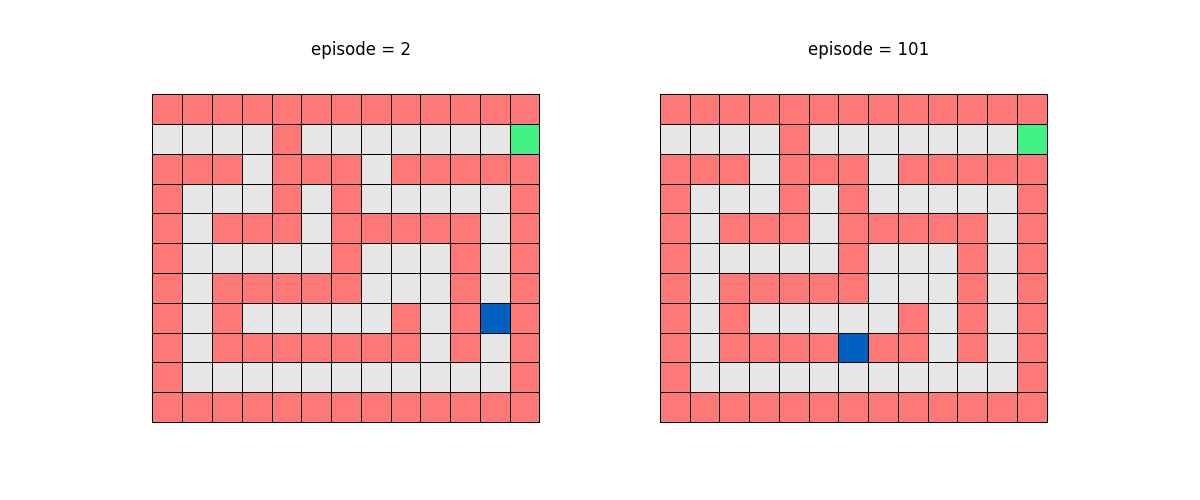
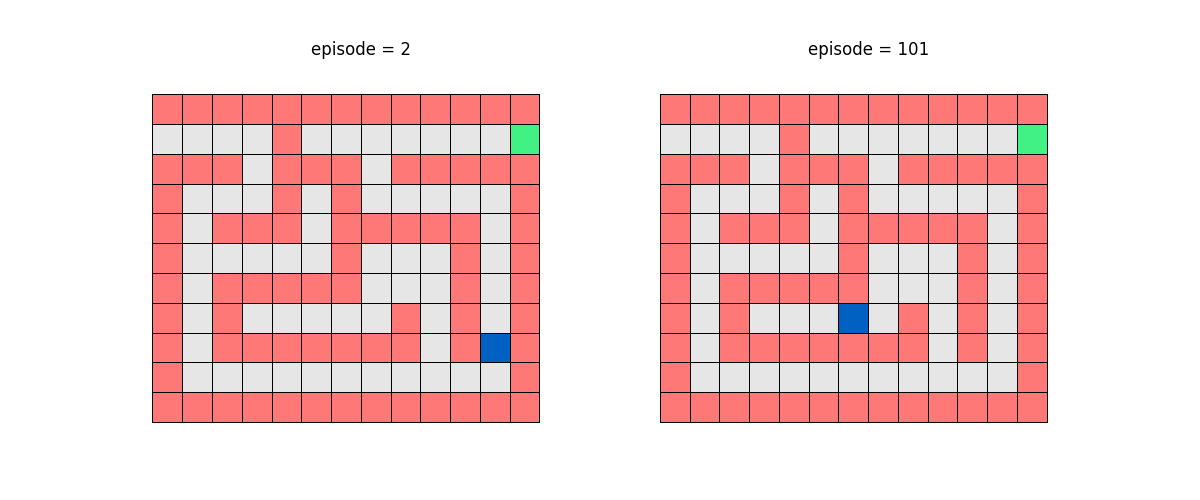
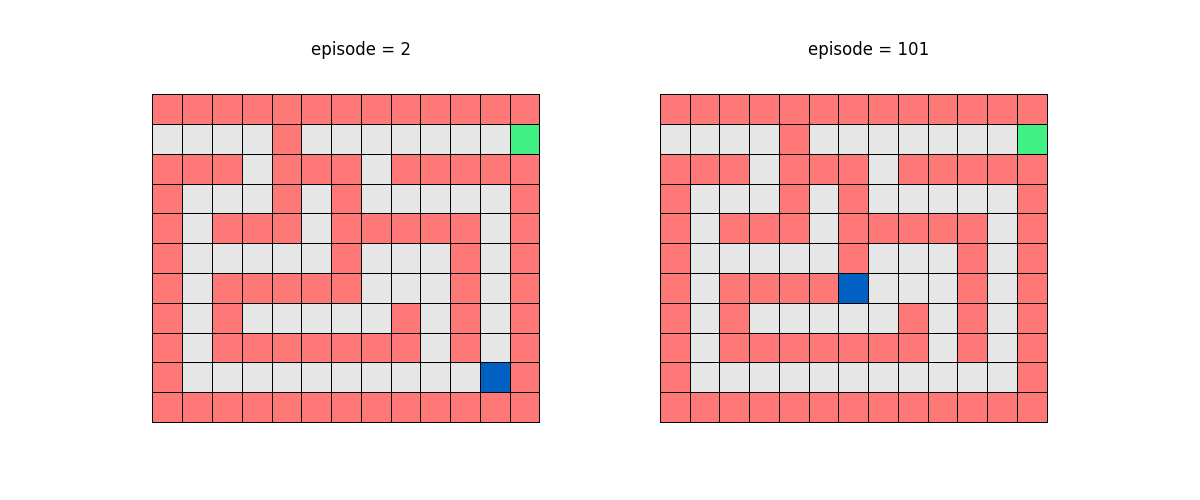
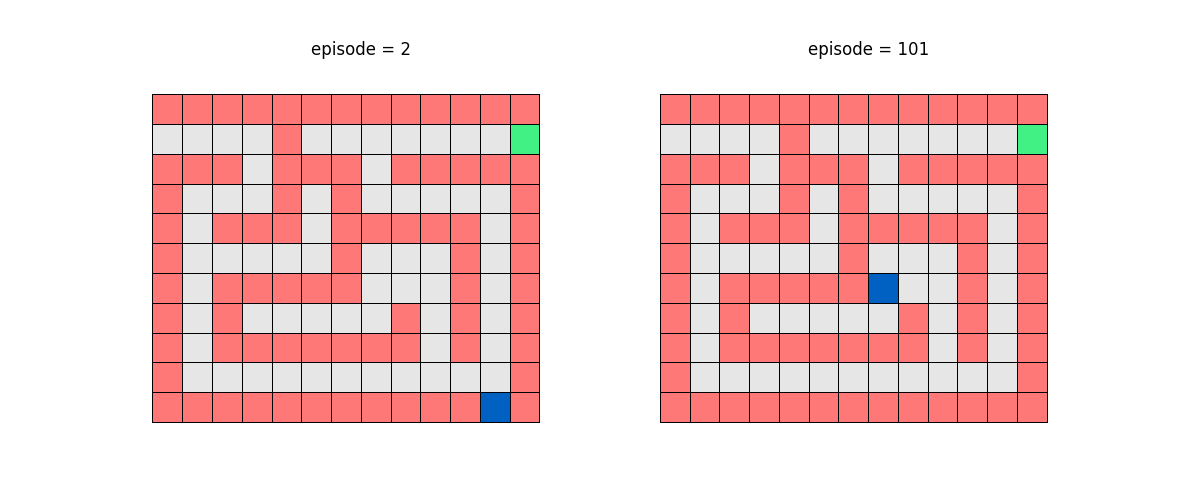
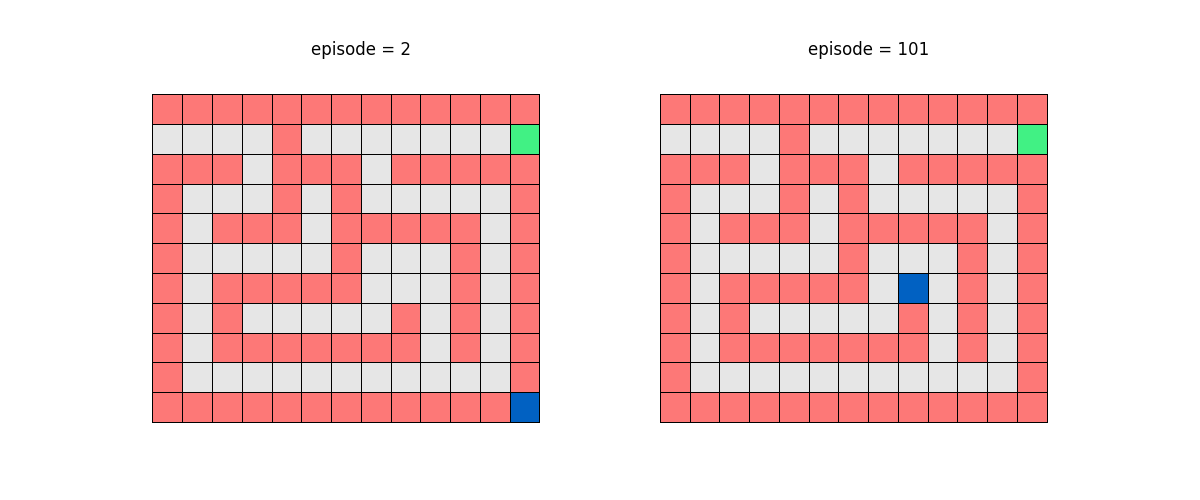
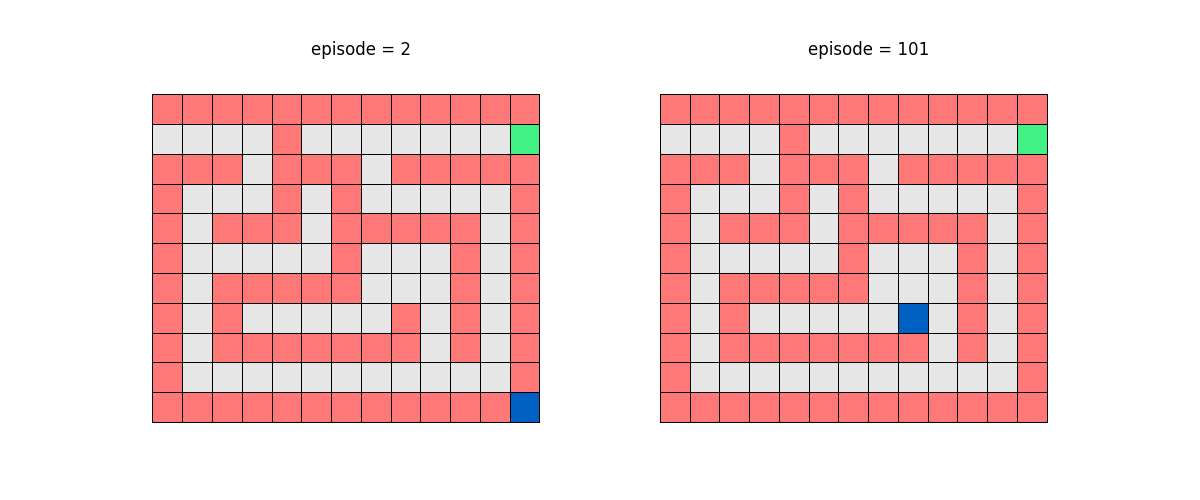
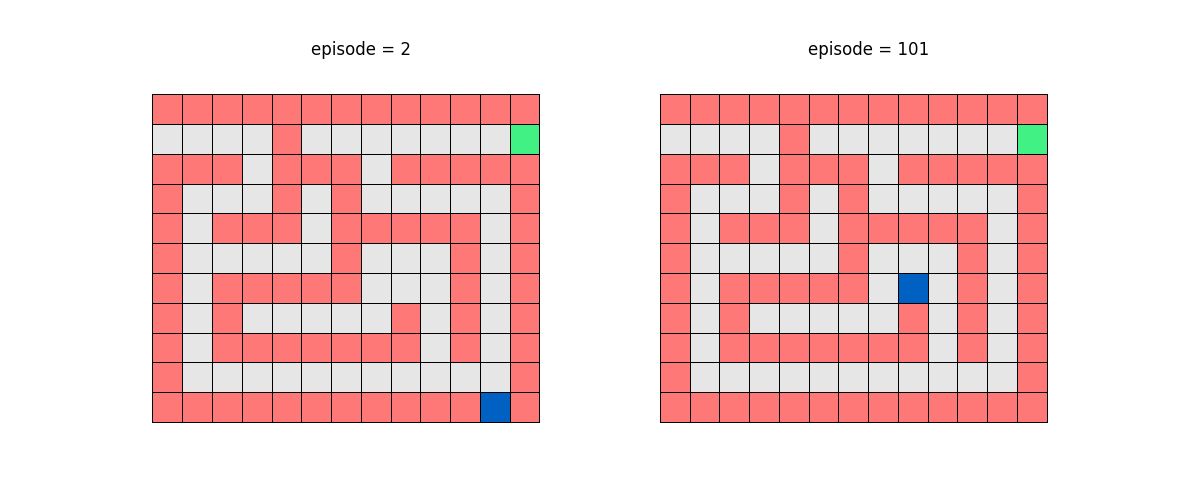
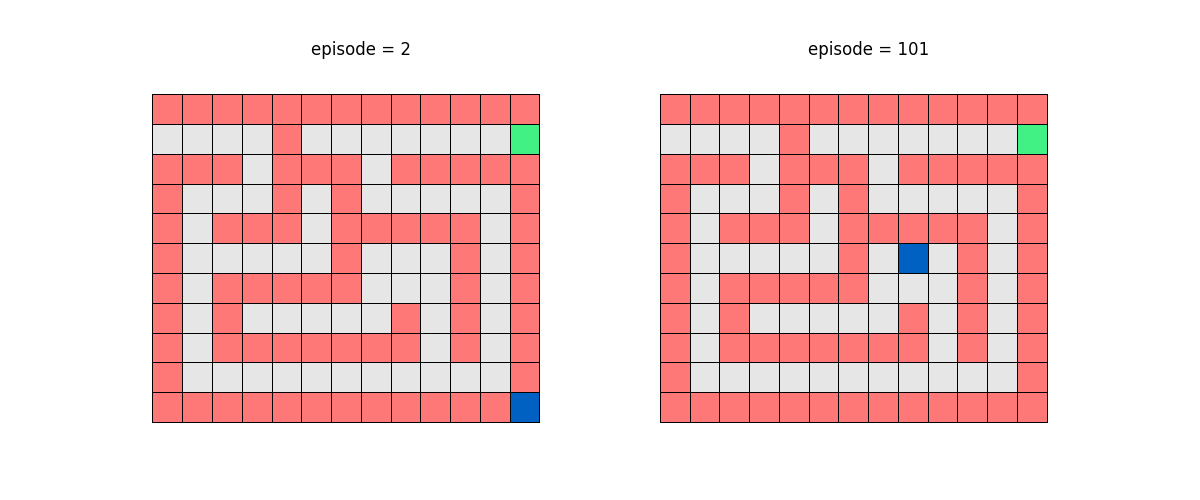
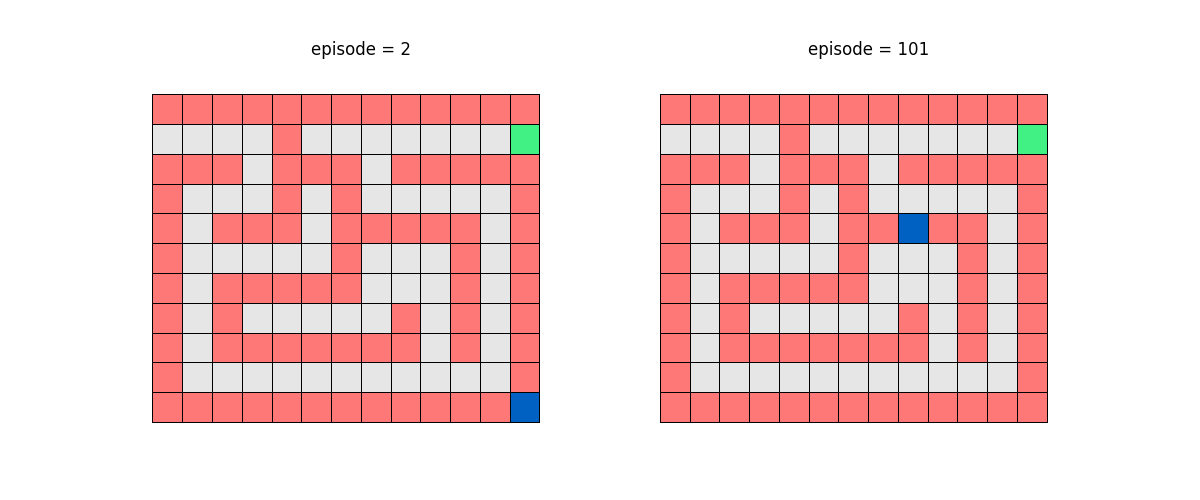
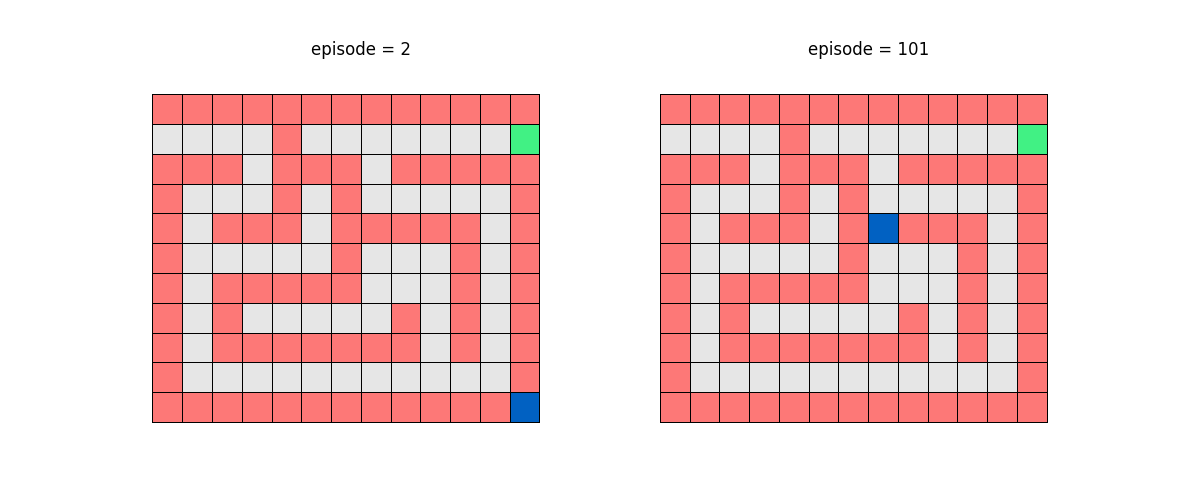
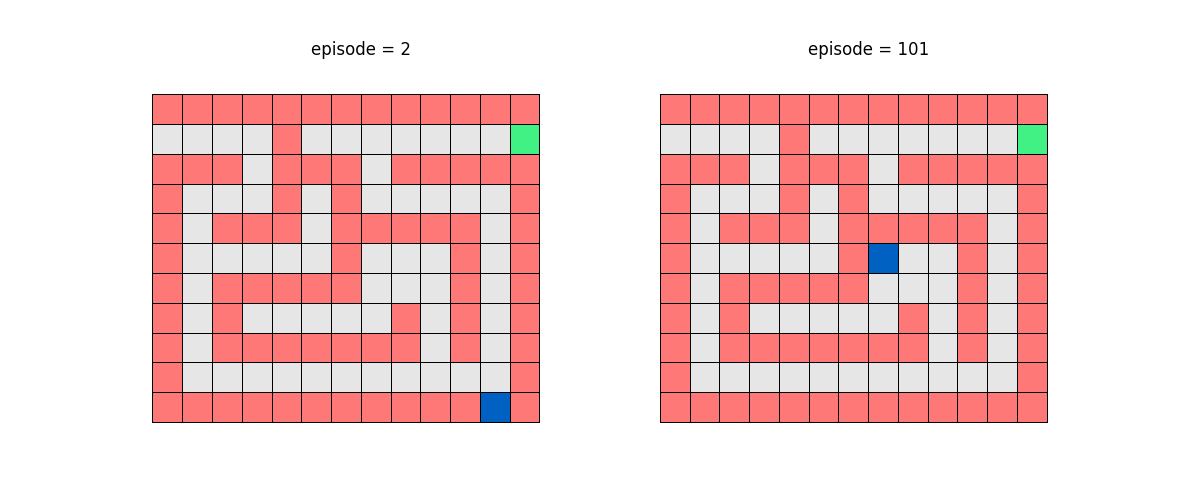
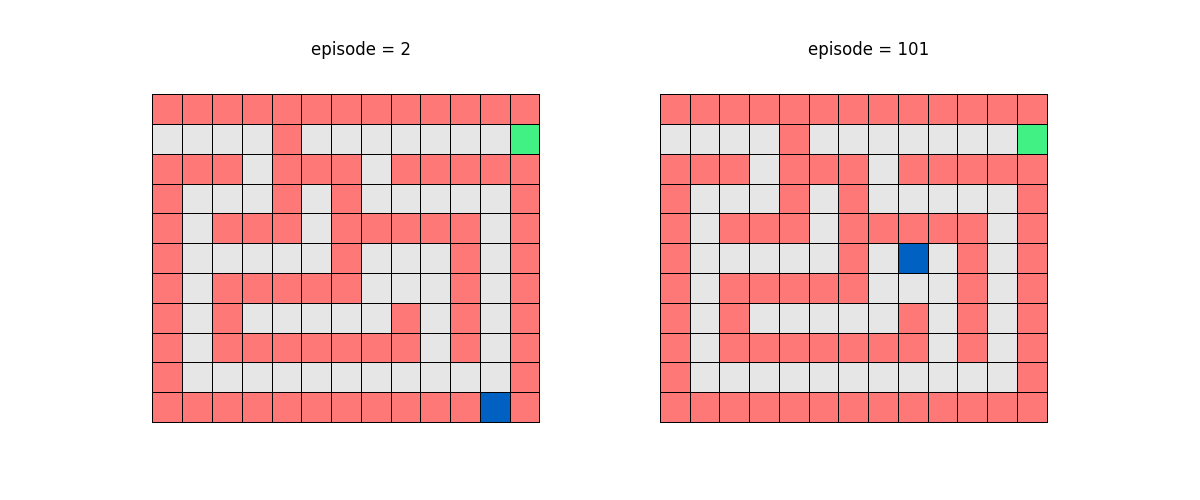
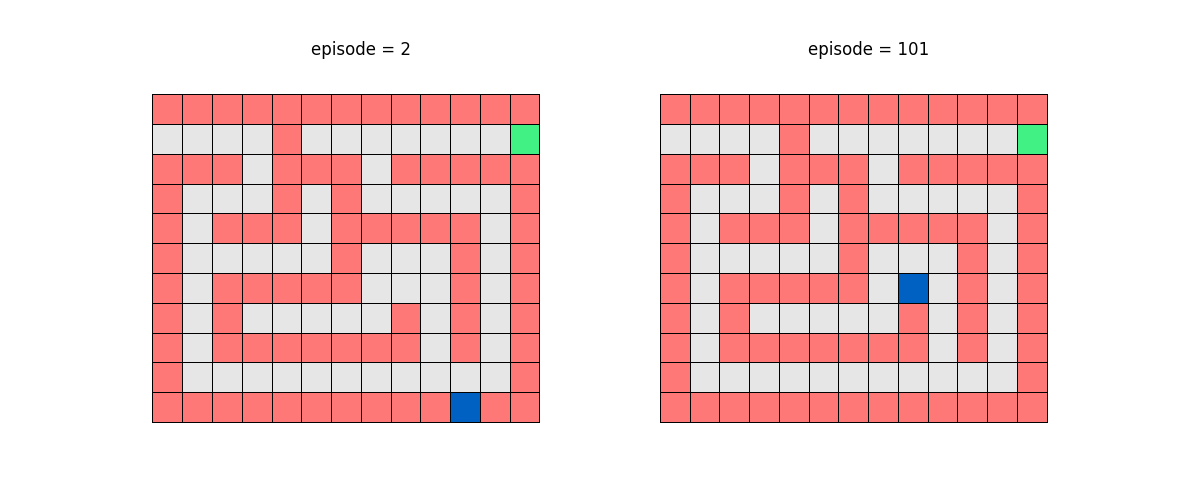
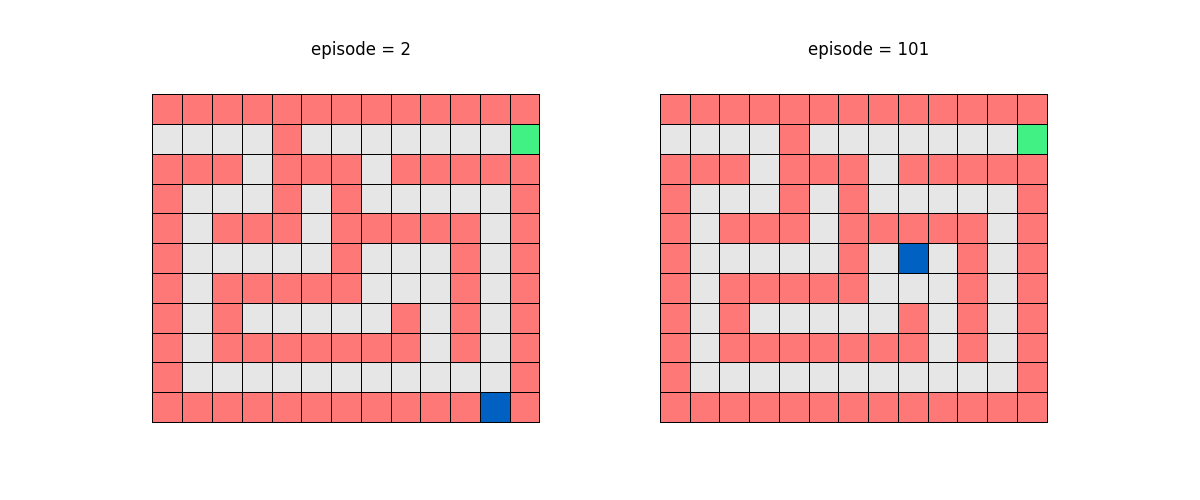
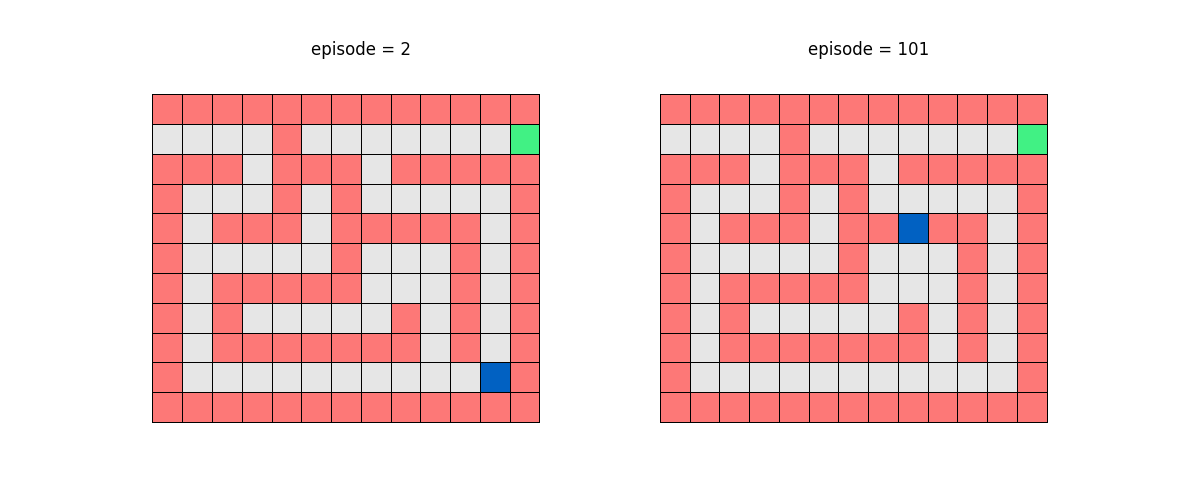

In [15]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

### animate training runs of one algorithm ###
animator.animate_training_runs(gridworld = small_maze, learner = qlearner,episodes = [1,100])

<p>As you can see in each case the agent randomly moves around the world! Note for sake of animation-rendering speed, only the first 50 steps are shown in each episode, and hence they may not conclude (i.e., reach the goal).
To see the entire Q-Learning function for this Gridworld problem, enter <code>animator.animate_training_runs??</code> into a Python cell and activate.</p>

<h1 id="3.2--Once-trained,-how-do-we-use-our-trained-agent?">3. The testing phase: using the trained agent<a class="anchor-link" href="#3.2--Once-trained,-how-do-we-use-our-trained-agent?">&#182;</a></h1>
<p>
Given our agent (and more specifically the $Q$ function) is learned properly, how should the agent optimally move at each state?
</p>
<p>The answer is implicit in the recursive definition of $Q$ itself. Recall that $Q(s_{k},a_{k})$ is the maximum total reward possible if we begin at $s_{k}$ and take the action $a_{k}$. So to maximize the overall reward we should choose the action $a_{k}$ such that $Q(s_{k},a_{k})$ has the largest possible value, or equivalently</p>
<p style="text-align: center !important;">$a_{k}=\alpha_{i^{\star}}$</p>
<p>where</p>
<p style="text-align: center !important;">$i^{\star}=\underset{i\in\varOmega(s_k)}{\text{argmax}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$</p>
<p>In the RL jargon this is often referred to as the <strong>optimal policy</strong>.</p> 

<blockquote style="border-left: 10px solid; border-left-color: #ffbf00; background: #fff0c6;">
<p>
After learning $Q$ properly we can start at any initial state $s_1$ and use the optimal policy to take actions that allow us to travel in a reward maximizing path of states until we reach the goal (or a maximum number of steps are taken).
</p>
</blockquote>

<h3 id="Example:-back-to-the-gridworld-maze---using-the-optimal-policy-of-a-trained-agent"><span style="color:#a50e3e;"> Example. </span> &nbsp; Back to Gridworld: testing the agent<a class="anchor-link" href="#Example:-back-to-the-gridworld-maze---using-the-optimal-policy-of-a-trained-agent">&#182;</a></h3>
<p>
In the next Python cell we illustrate how to use the optimal policy with the Gridworld example, where we have already learned the proper $Q$ function in a previous Python cell. You can initialize the agent at any square on the board (except hazard locations in red), and activating the cell will animate its path.</p>



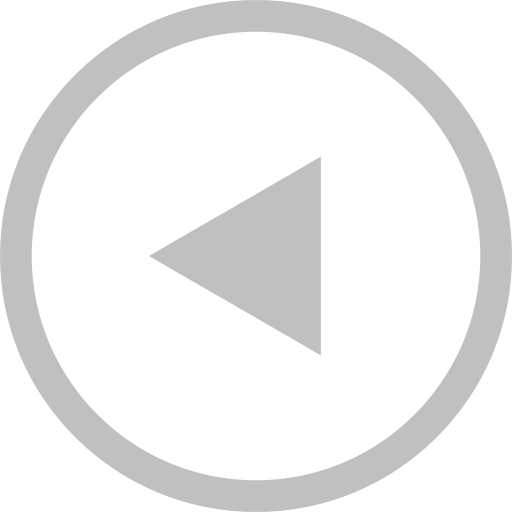
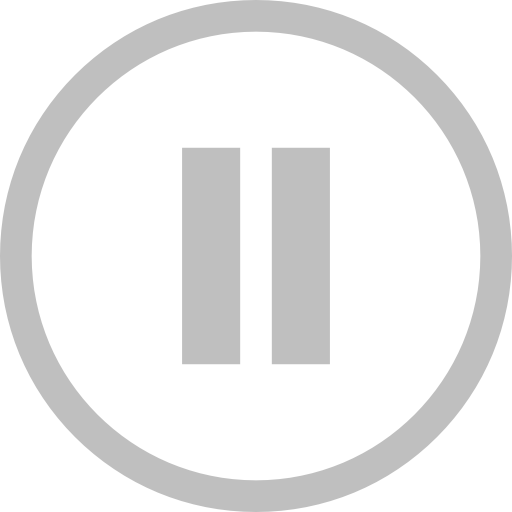
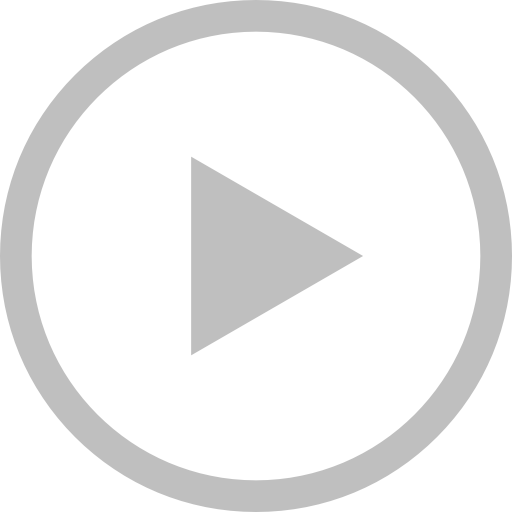
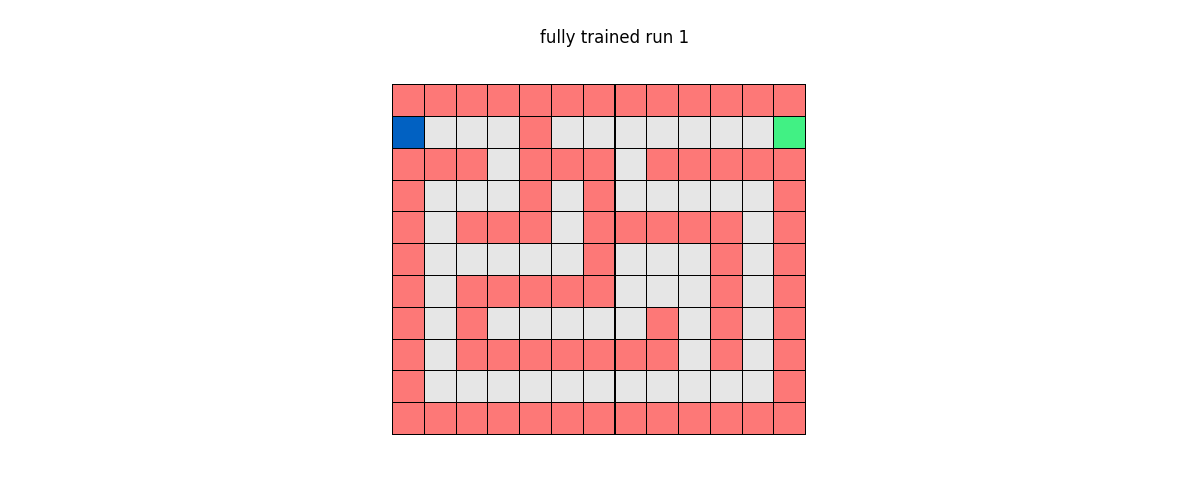
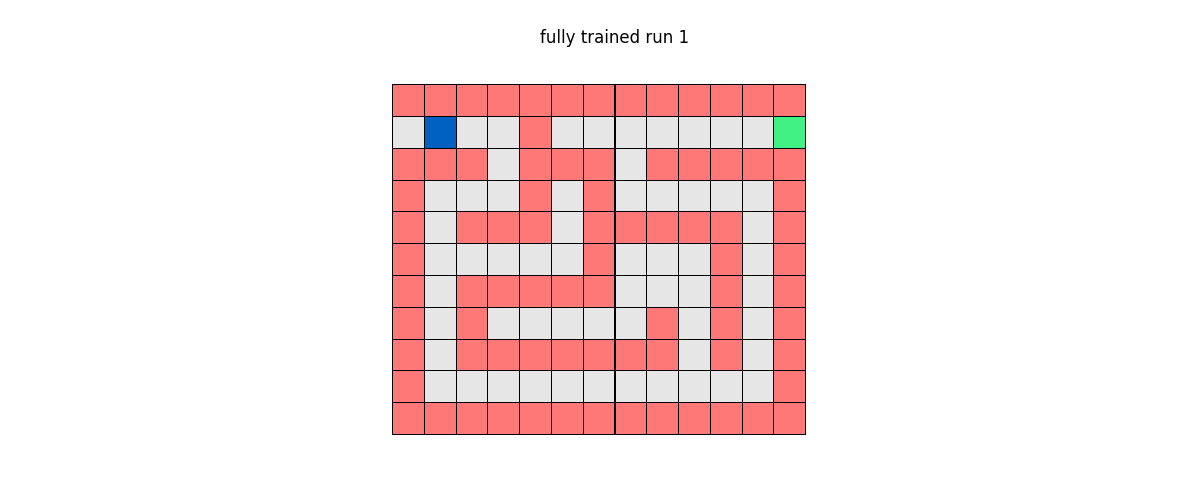
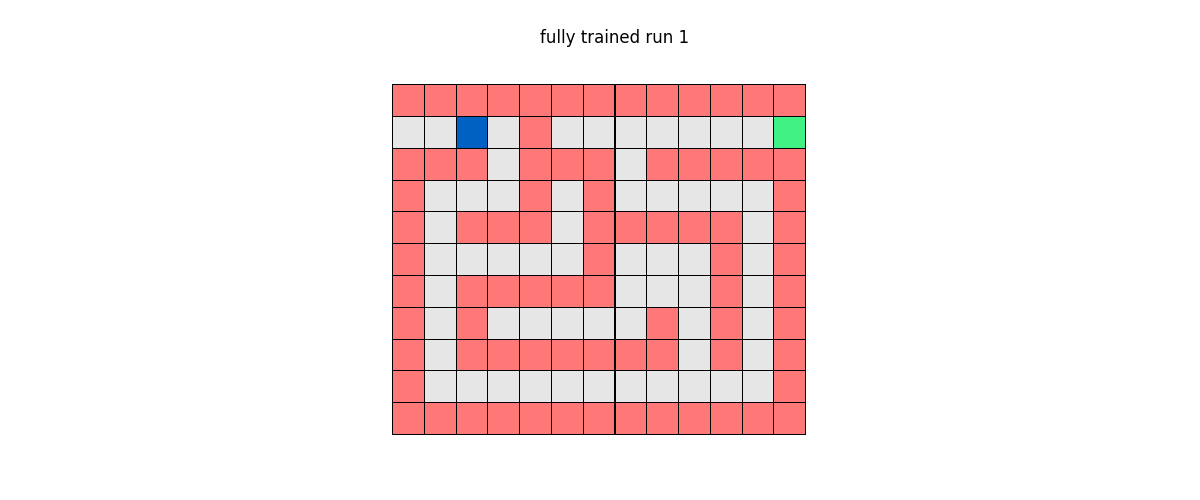
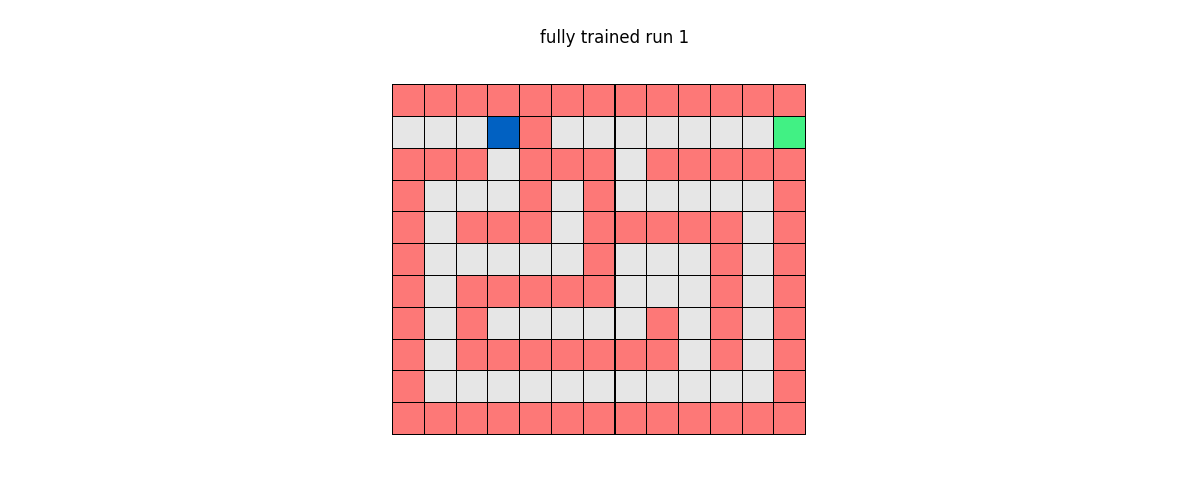
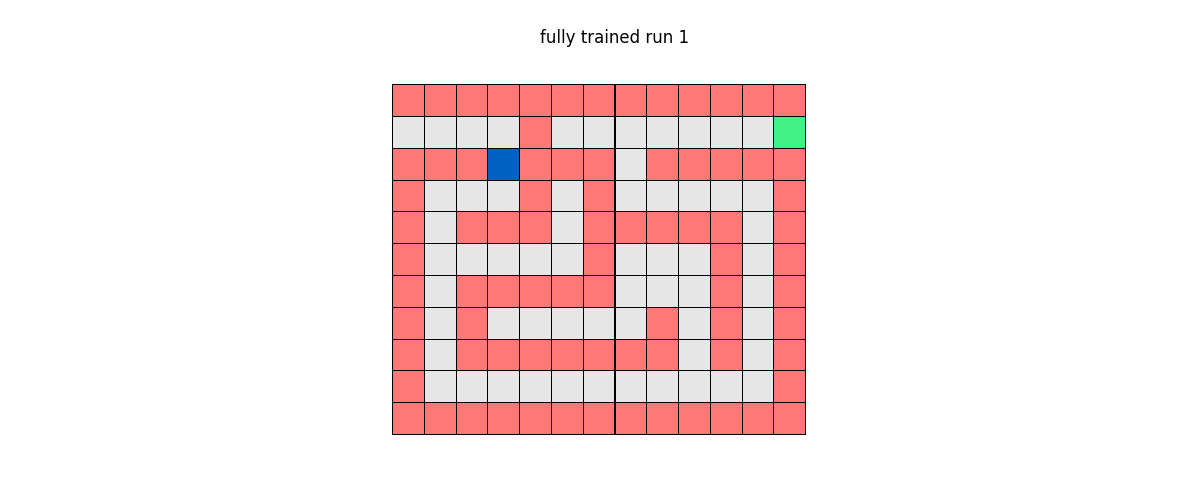
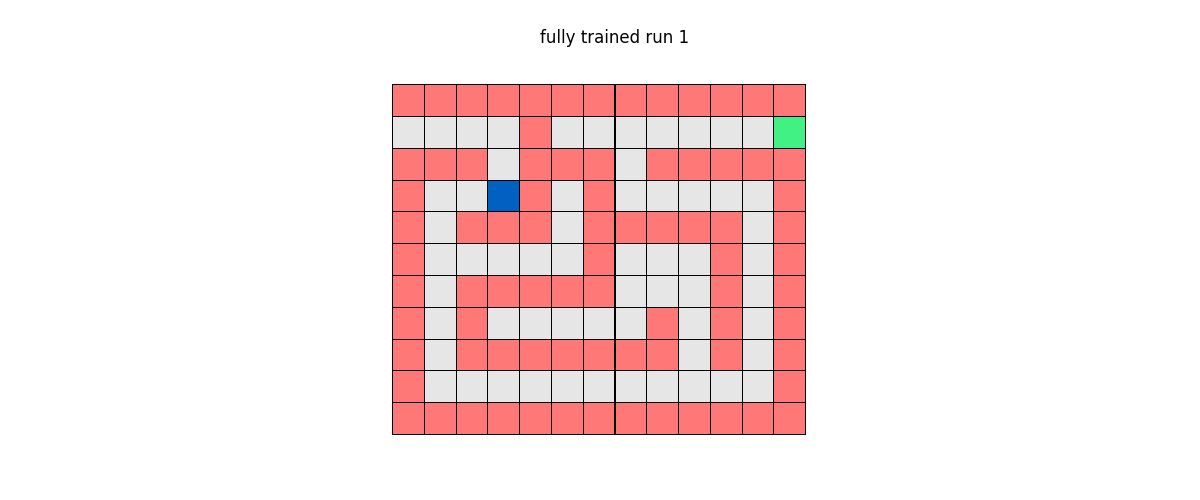
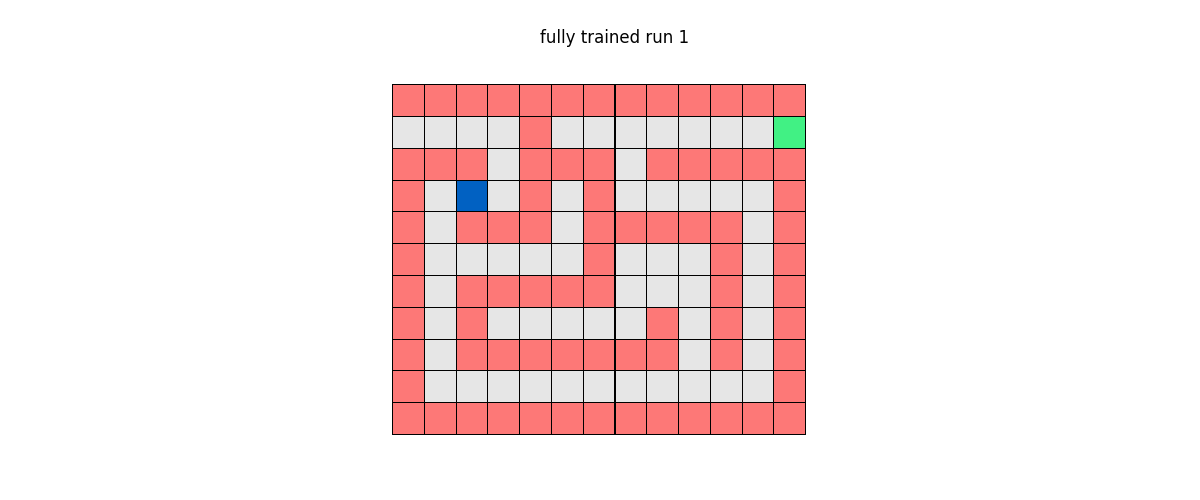
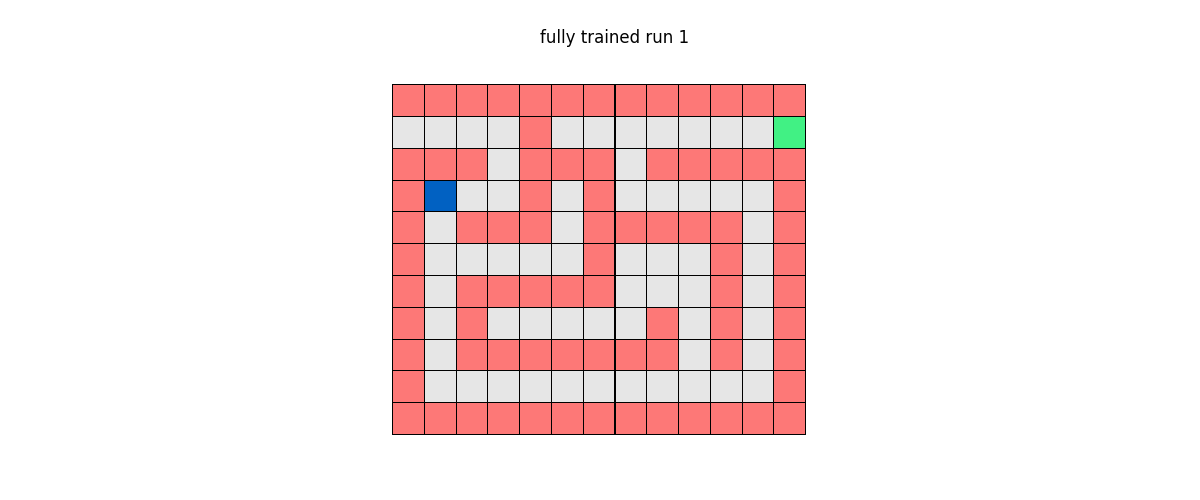
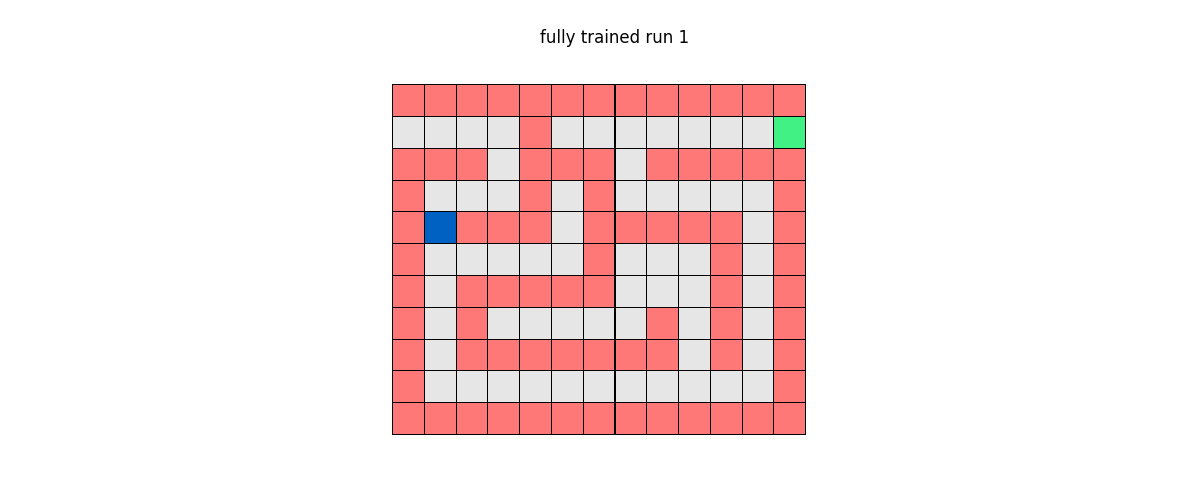
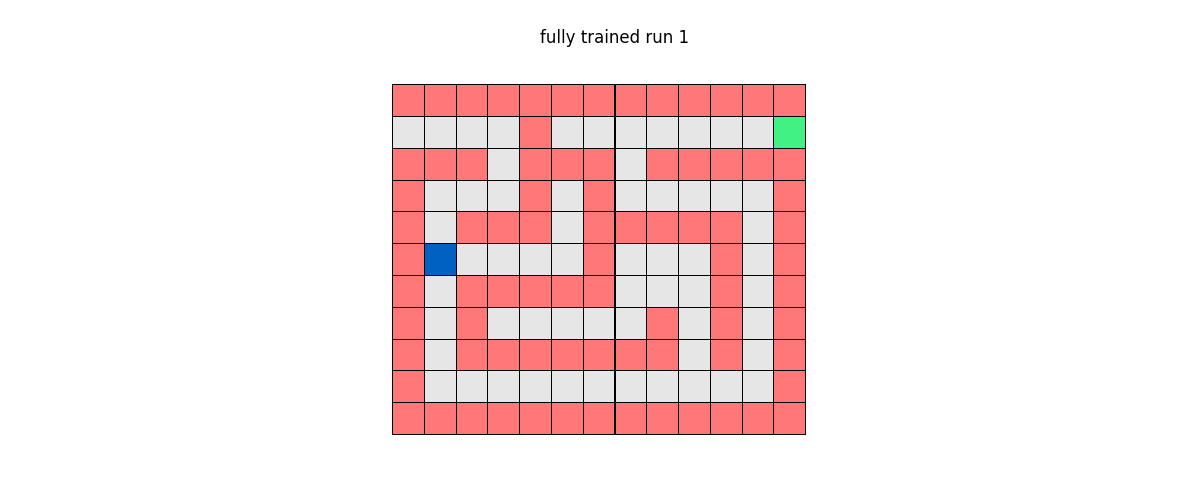
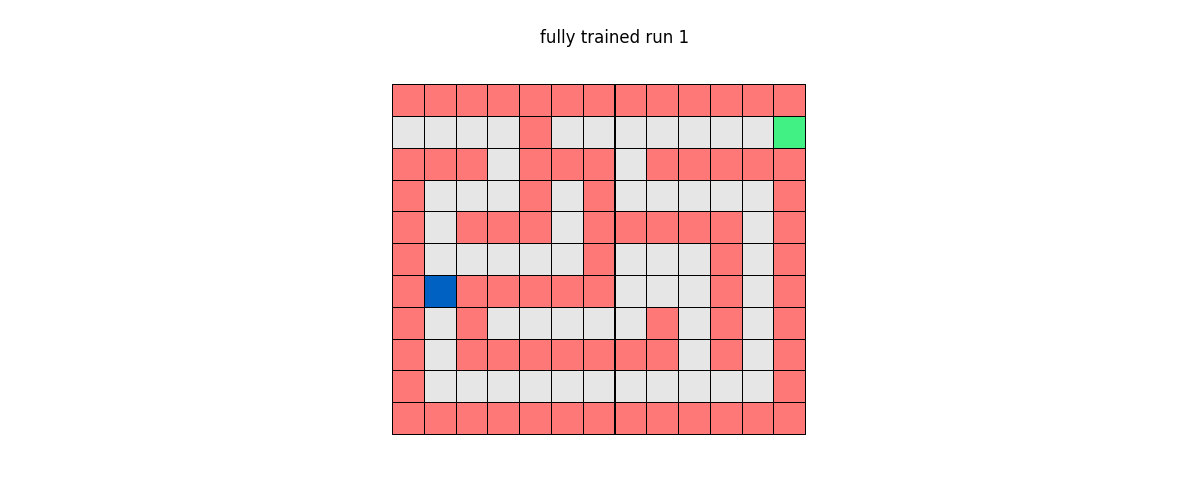
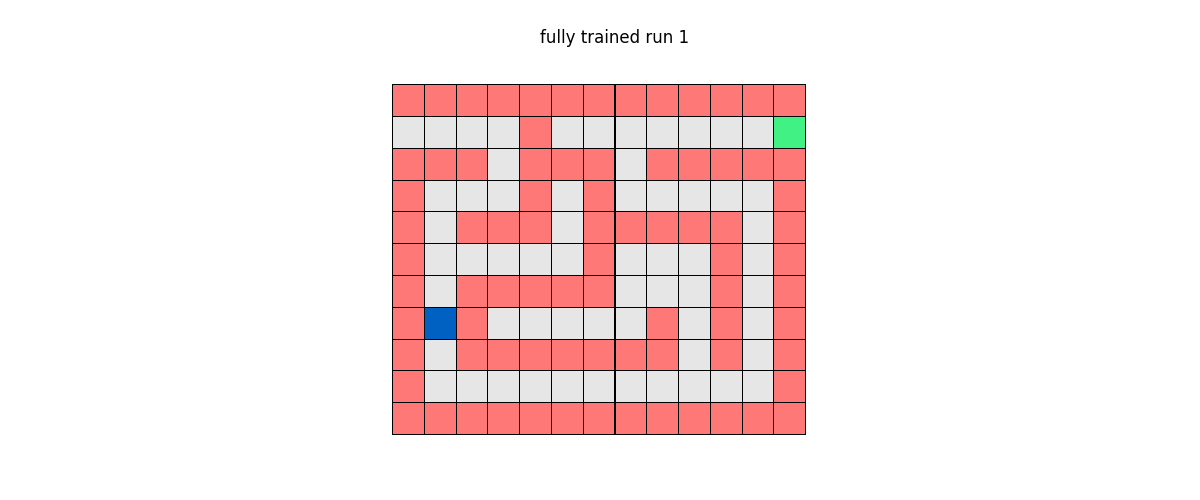
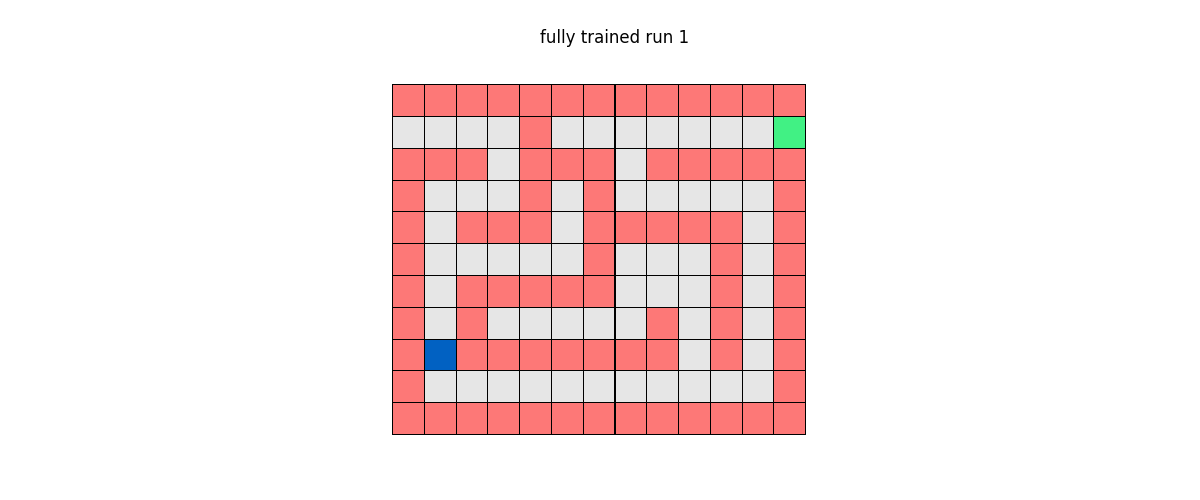
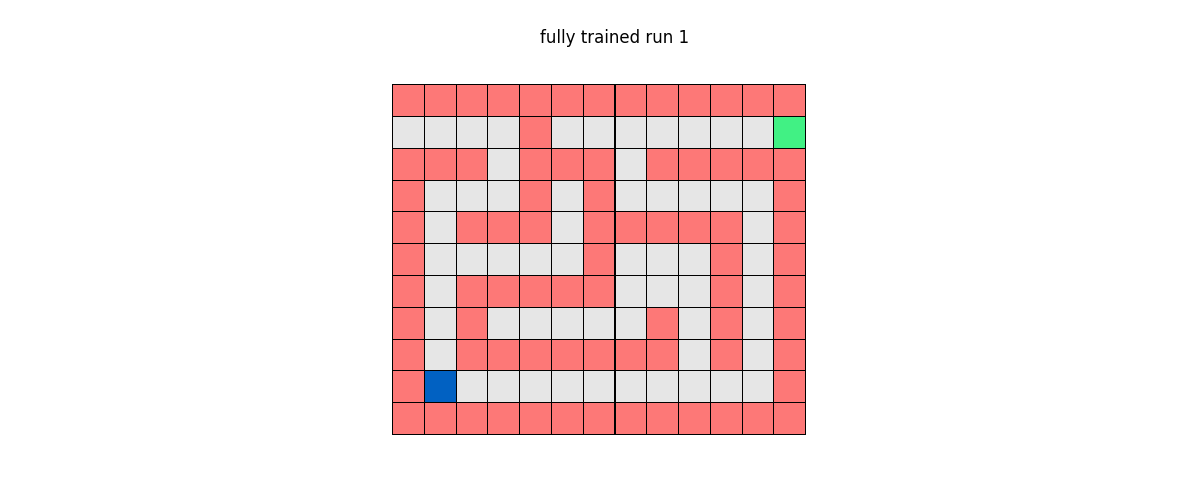
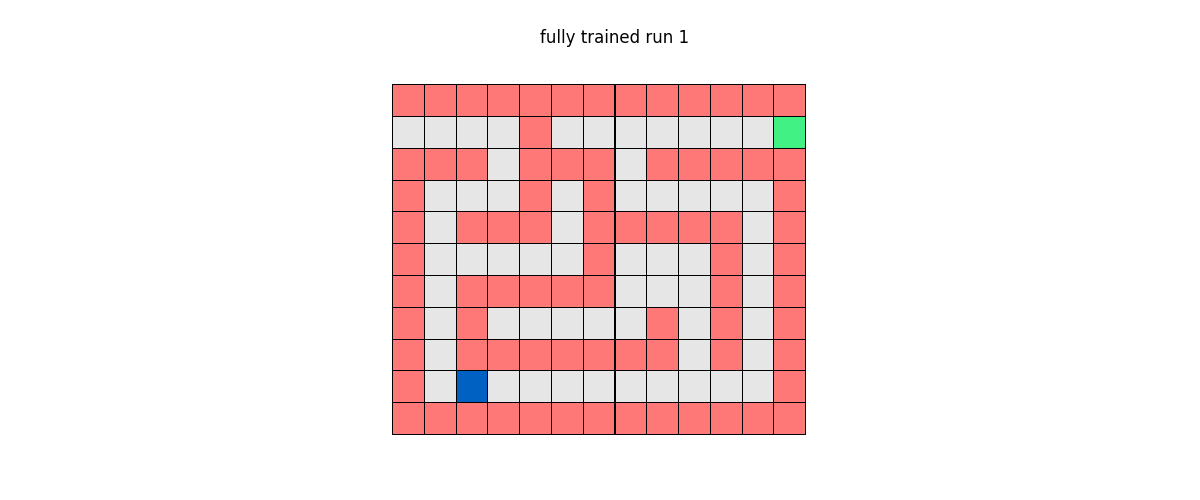
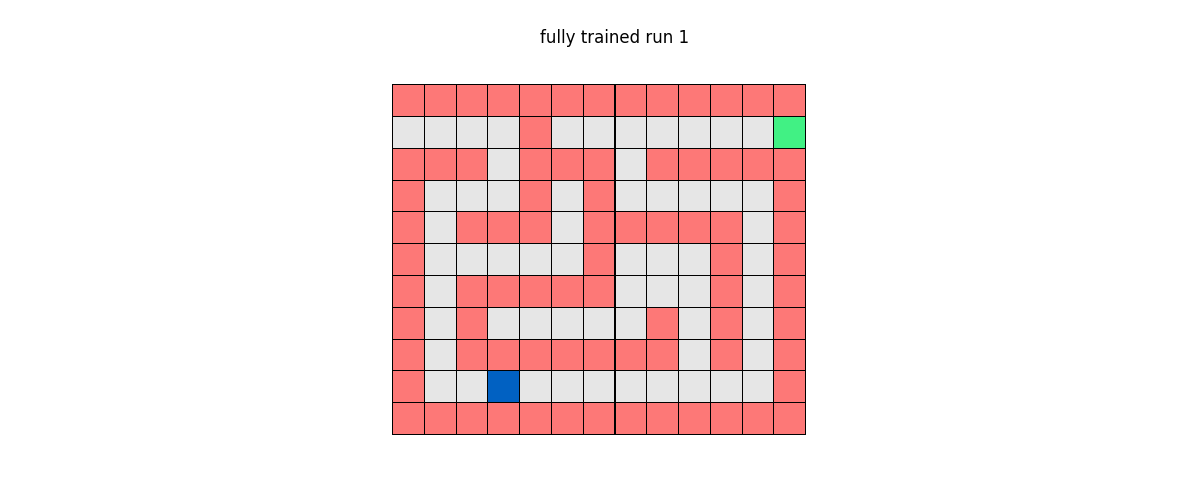
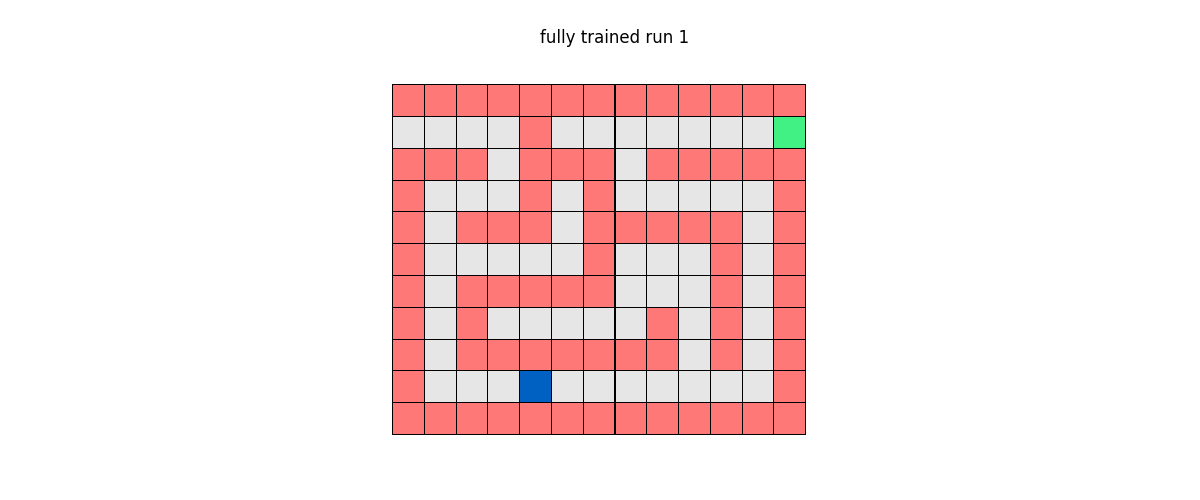
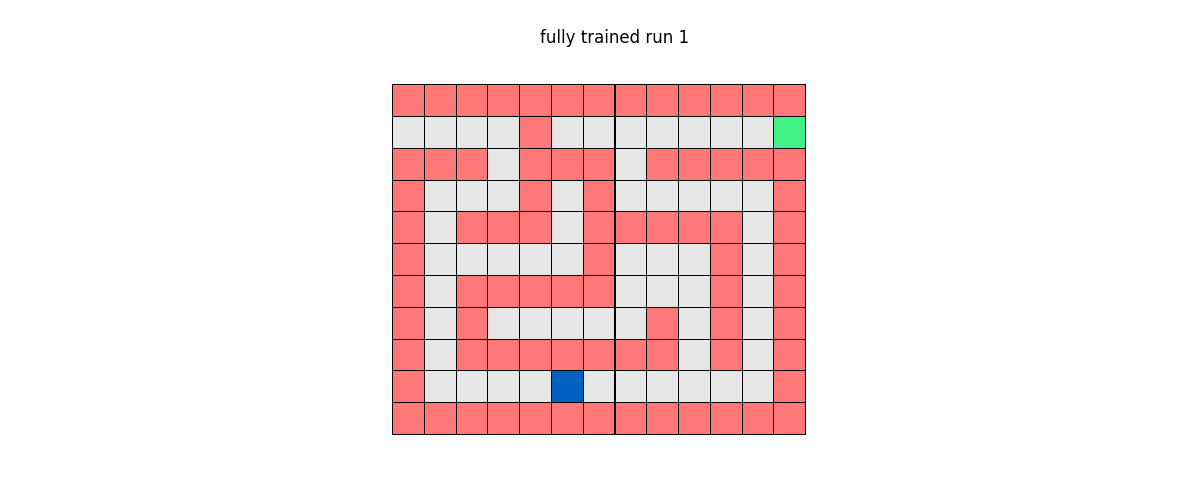
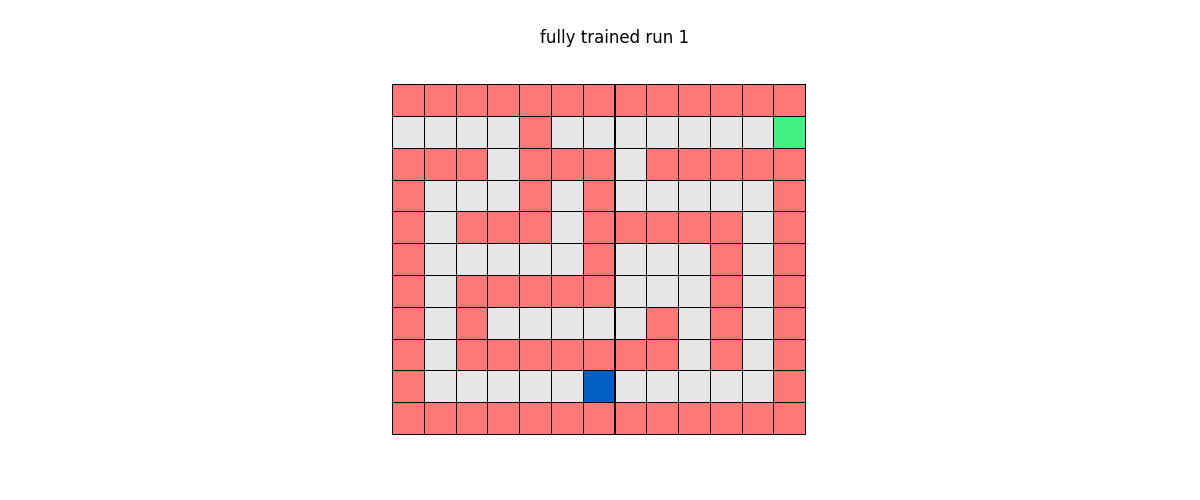
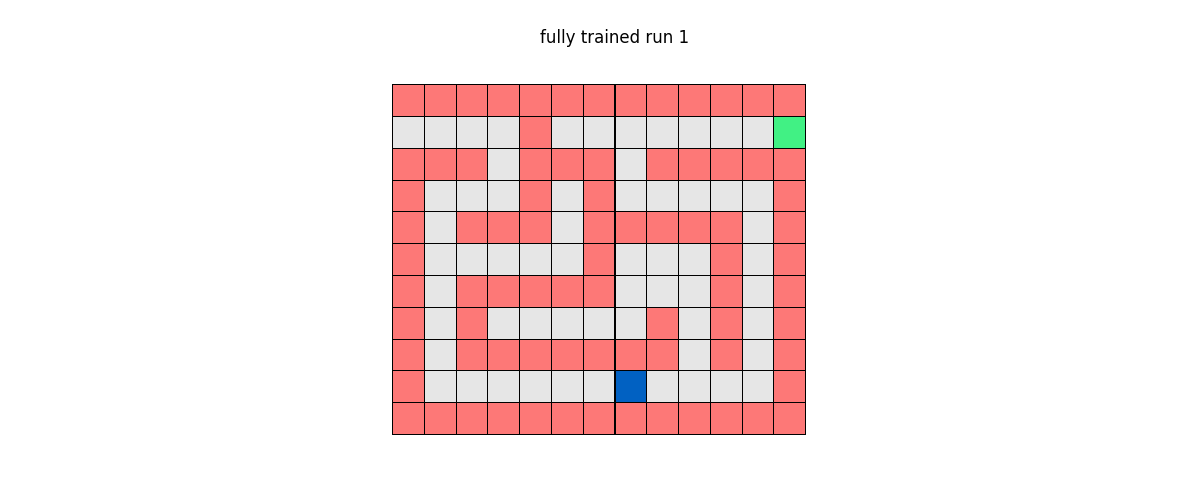
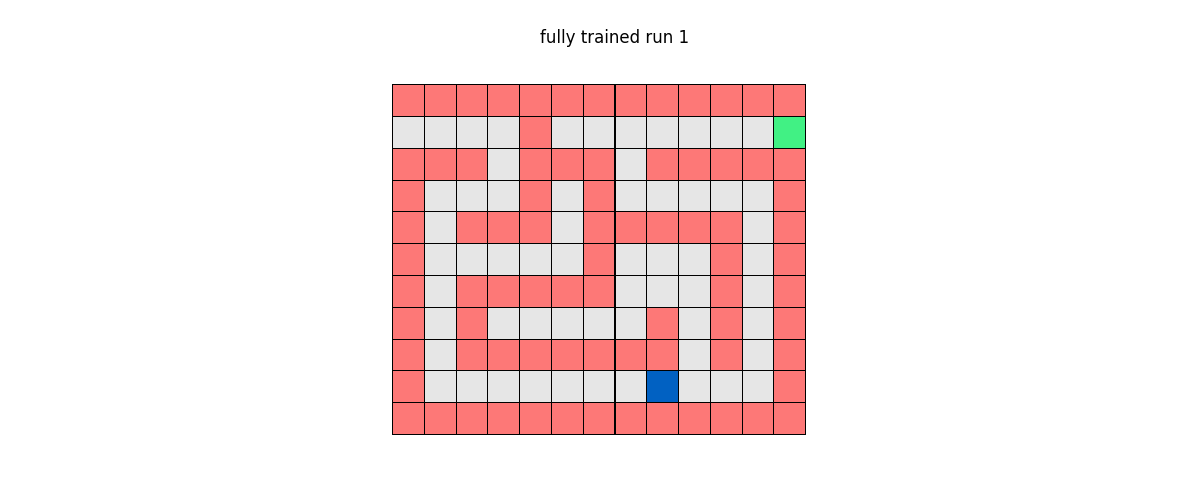
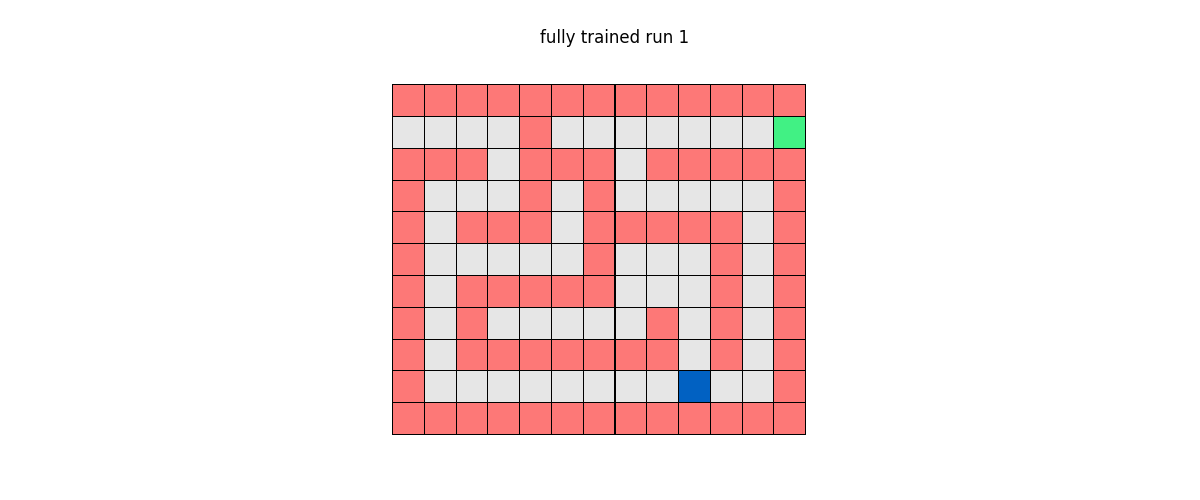
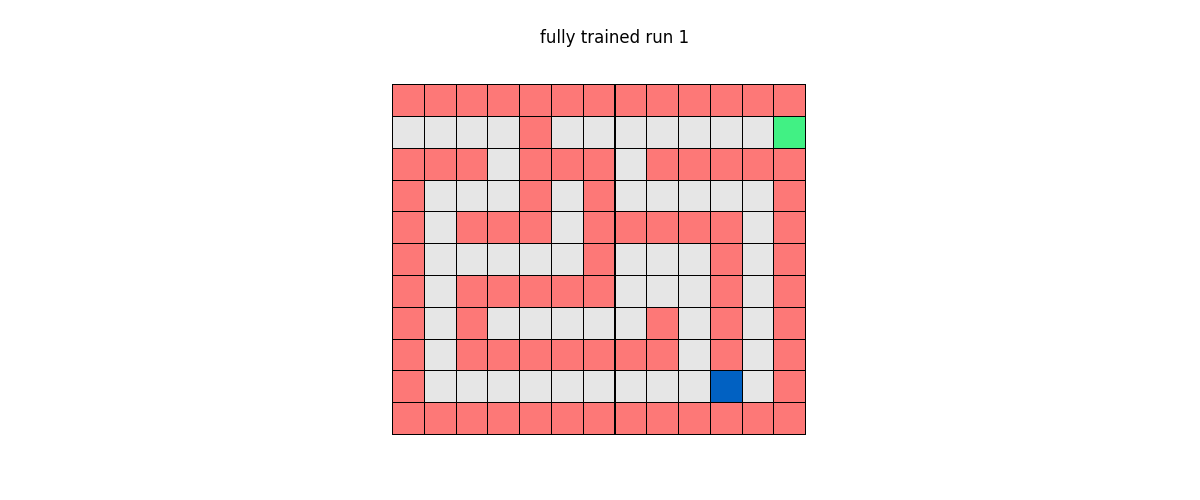
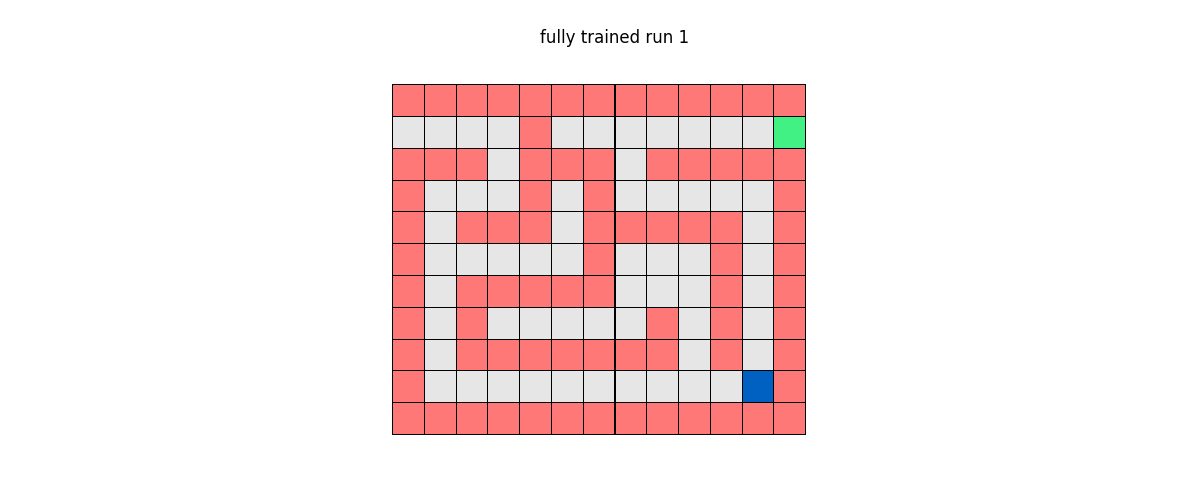
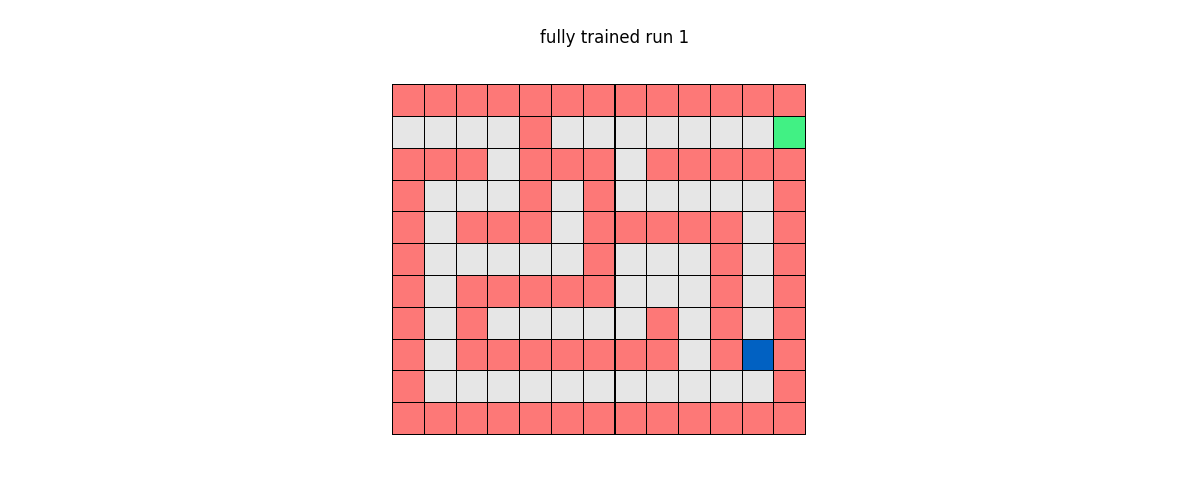
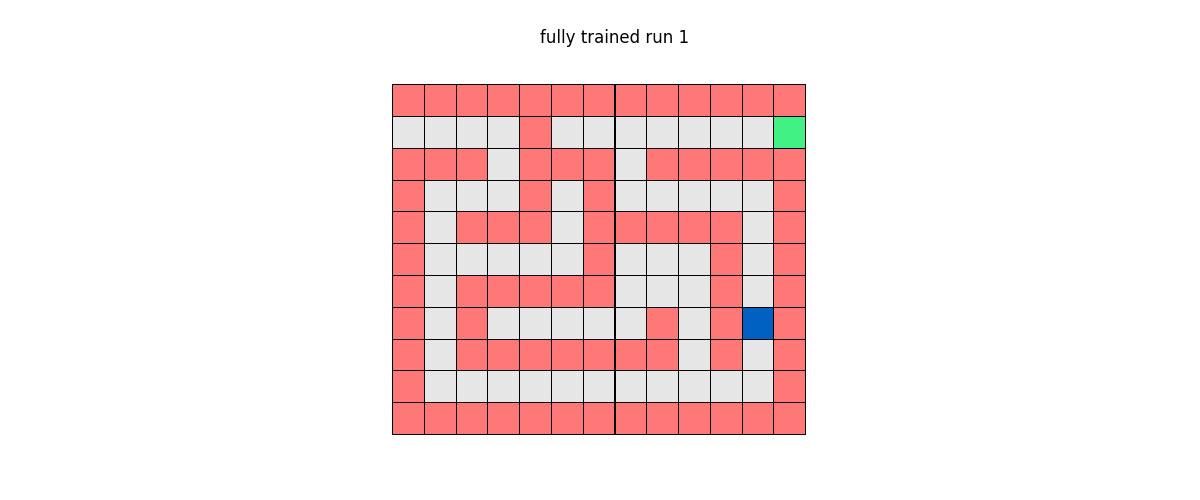
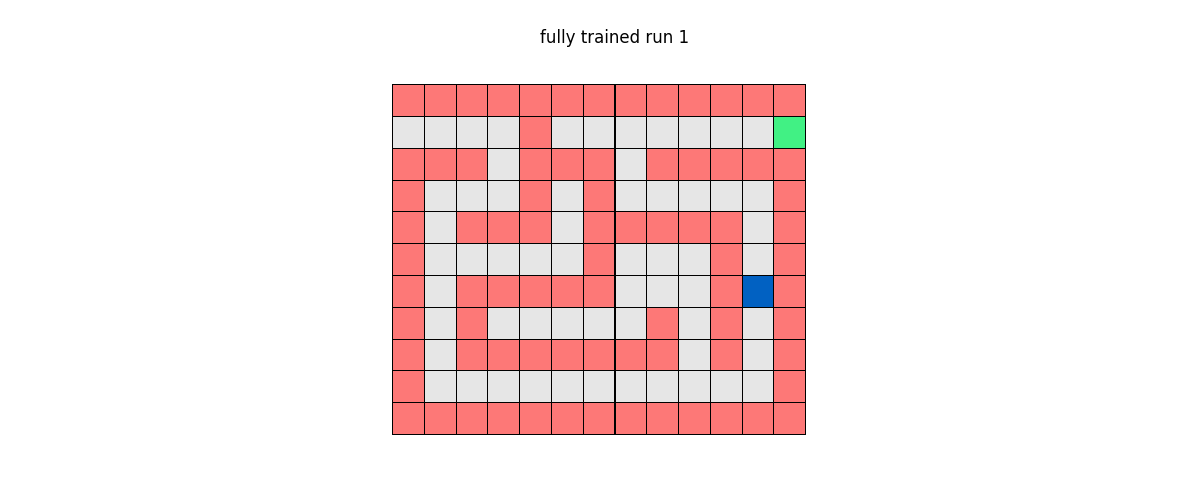
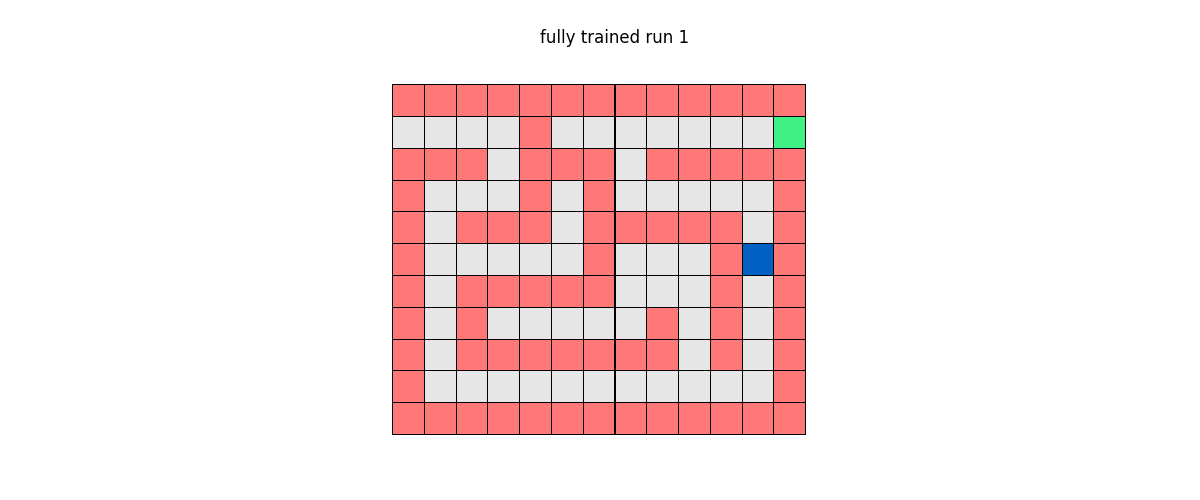
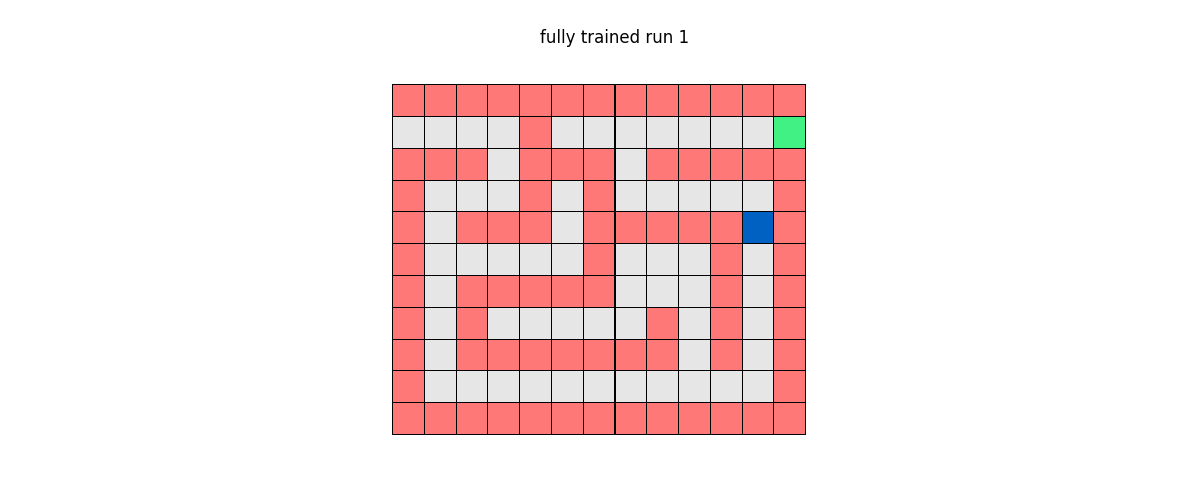
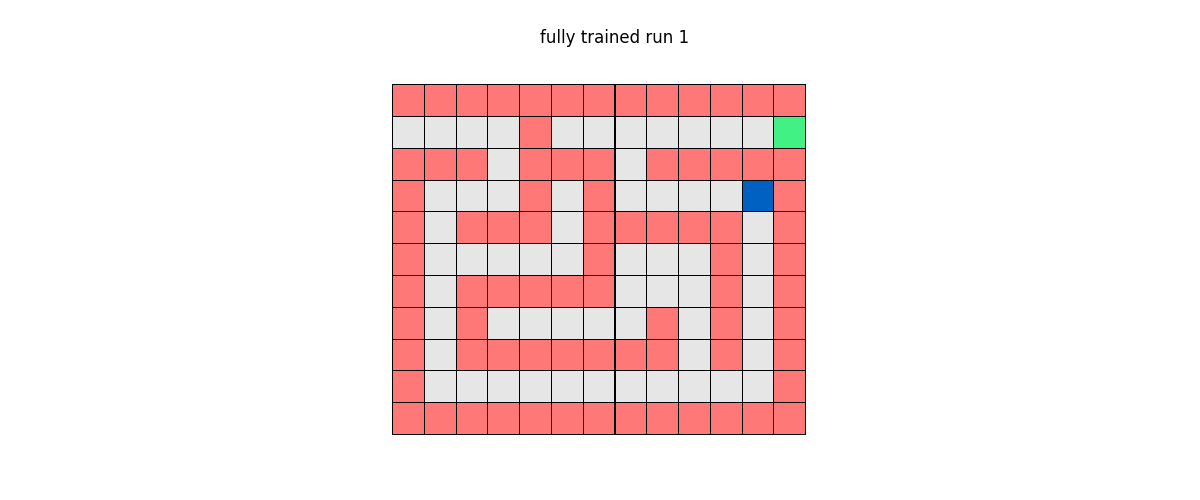
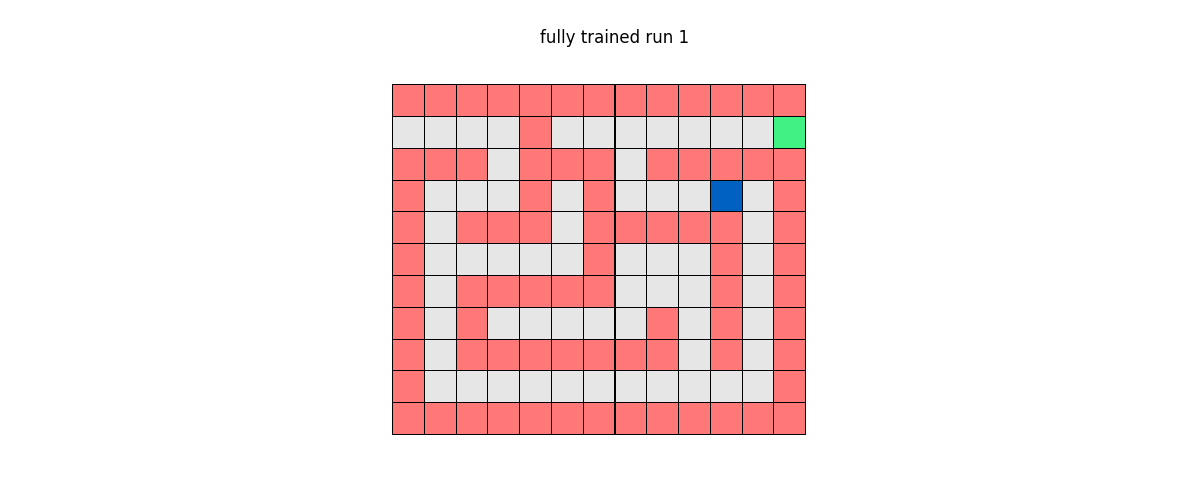
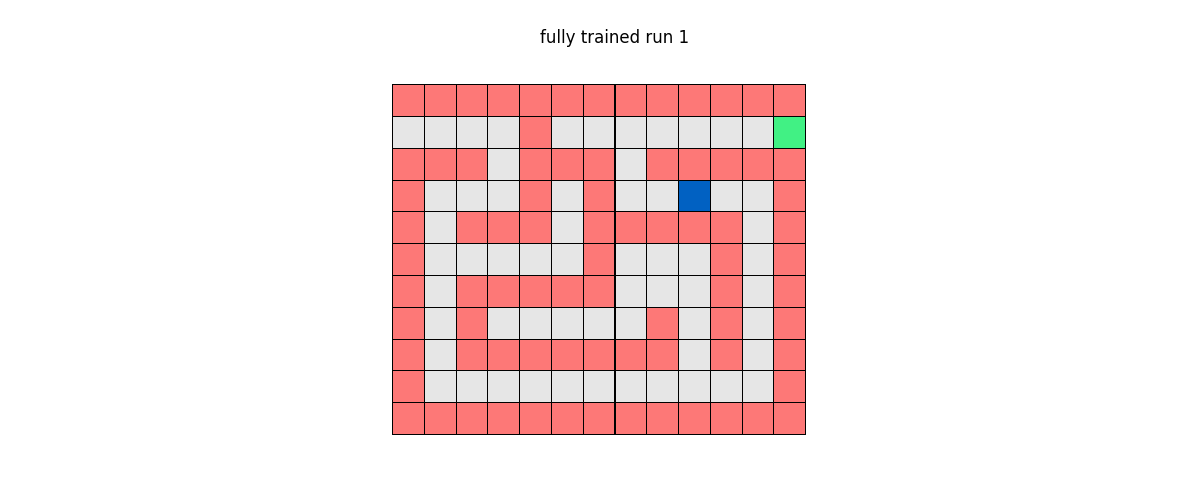
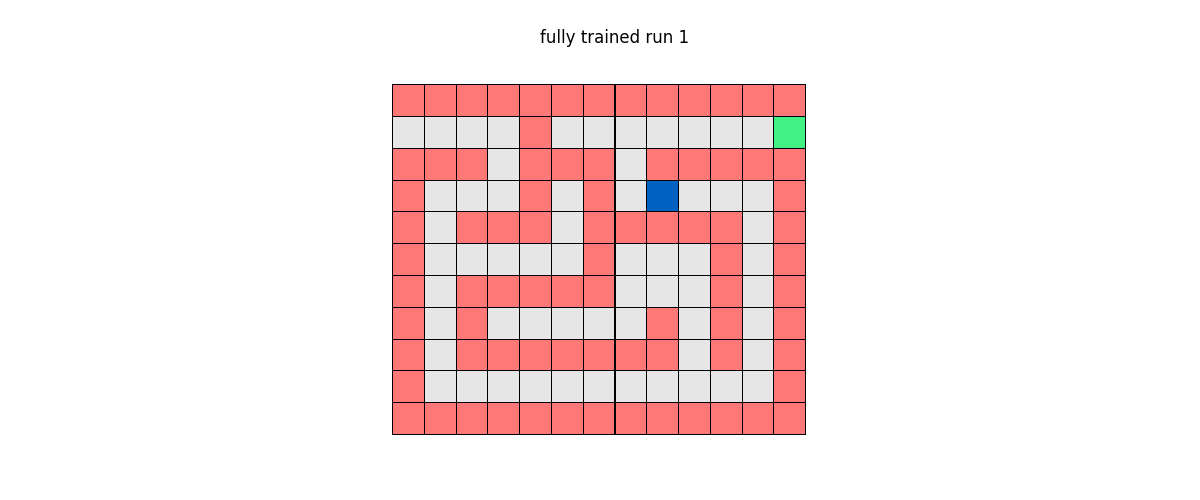
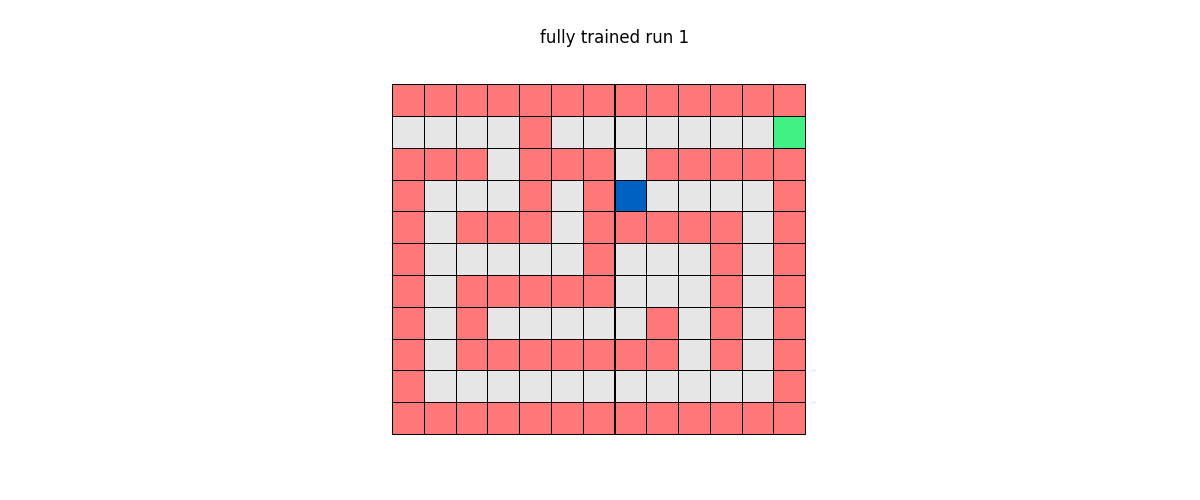
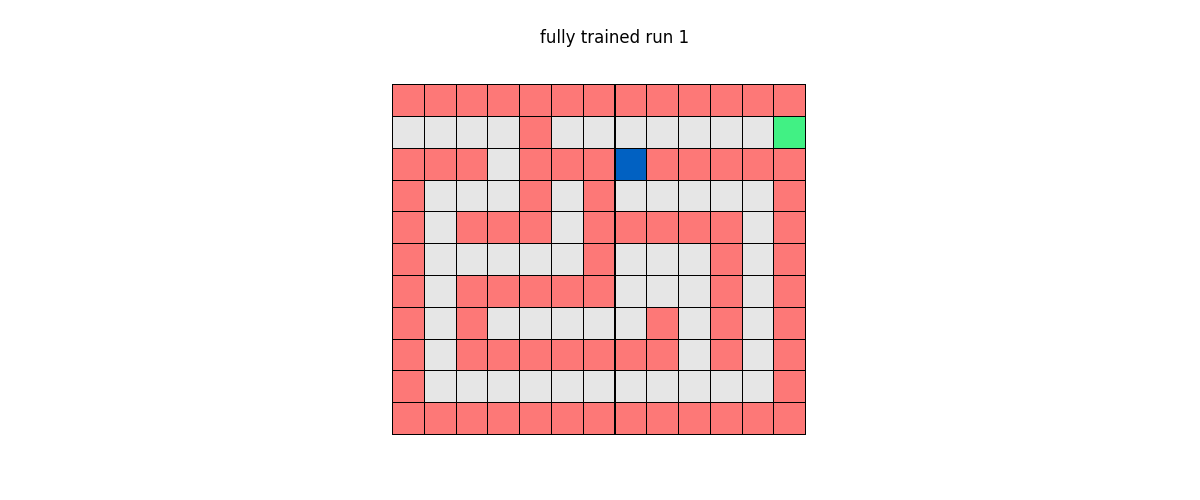
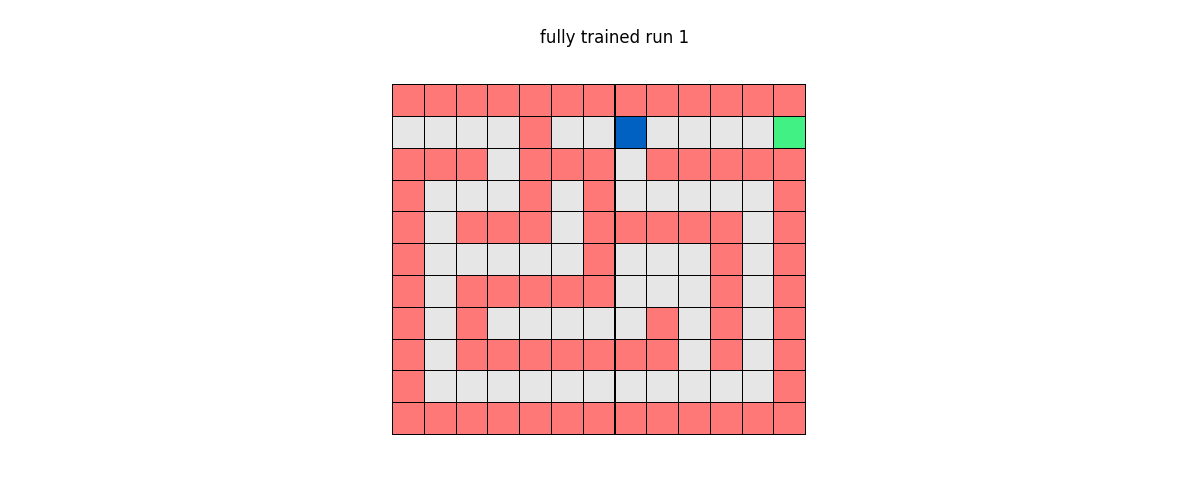
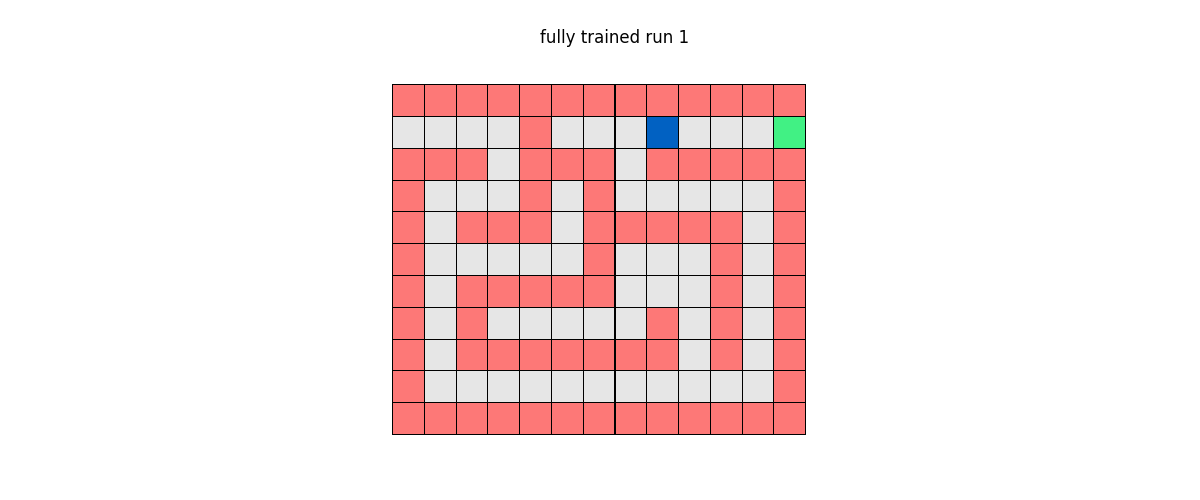
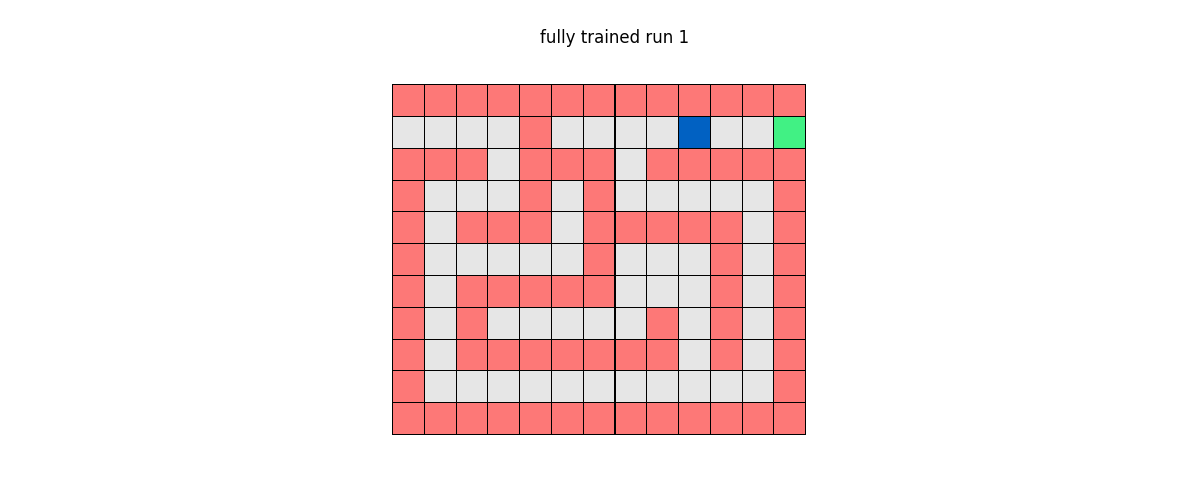
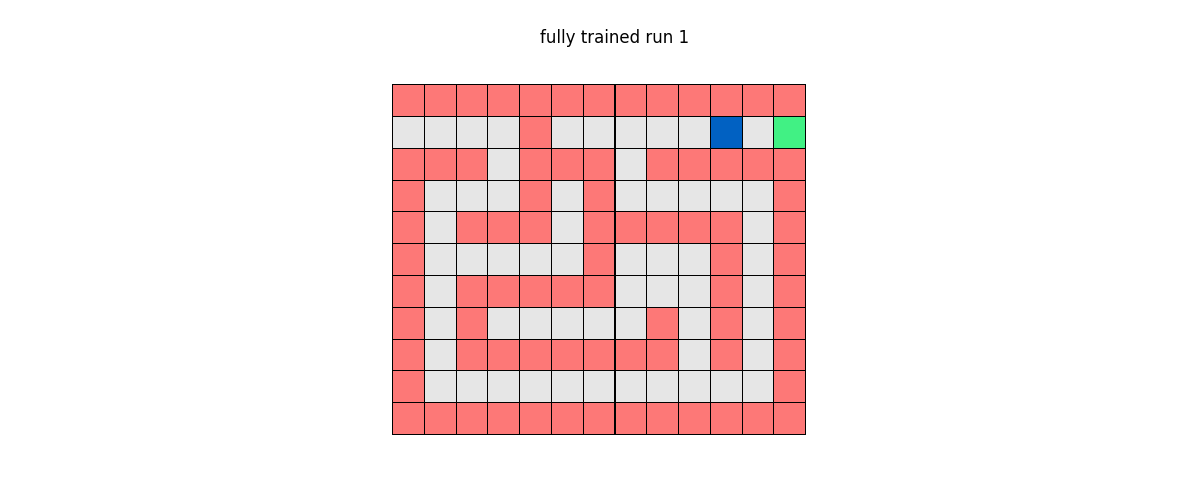
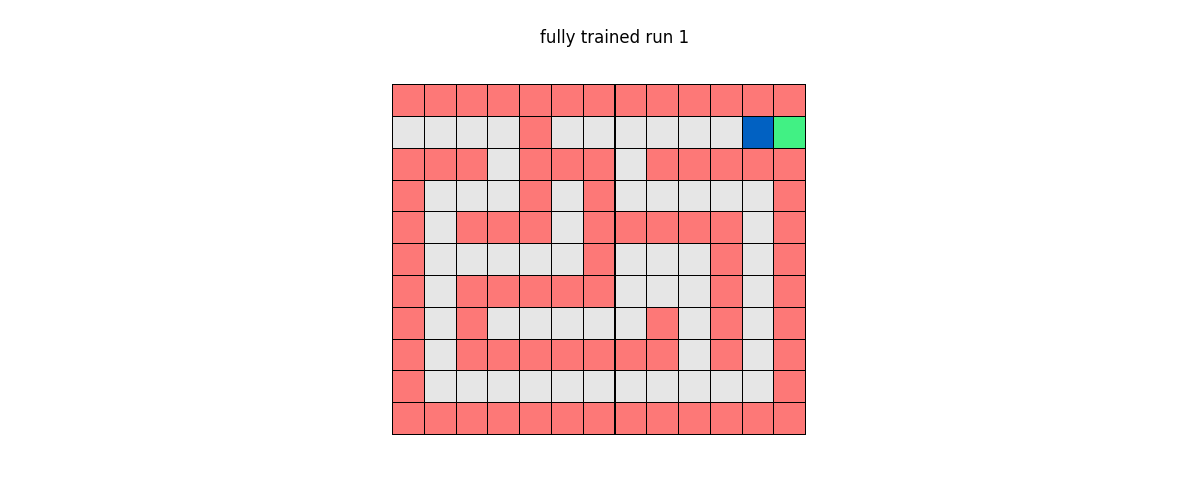
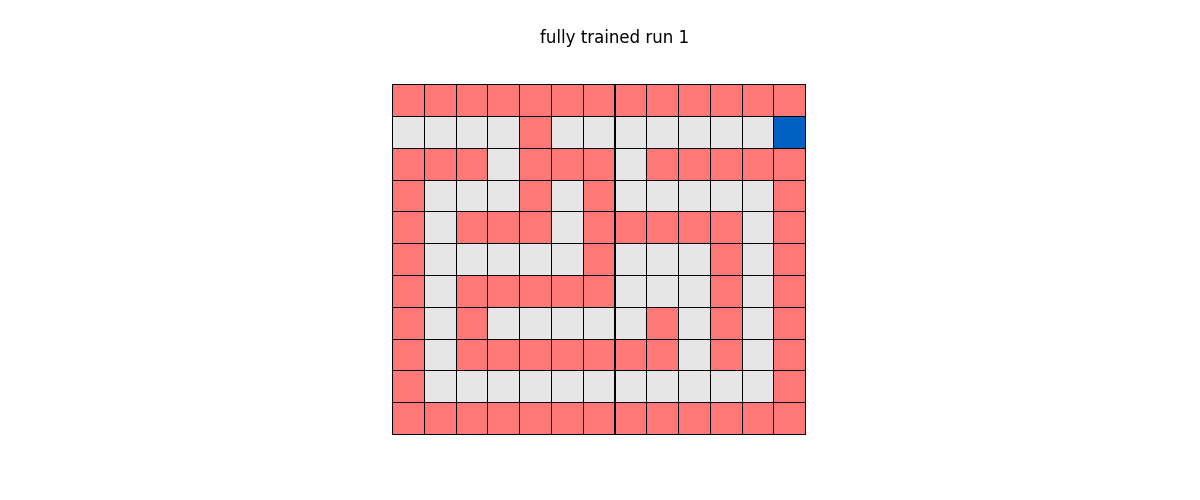

In [16]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[9,0]]
animator.animate_validation_runs(gridworld = small_maze,learner = qlearner,starting_locations = locs)

<p>Type <code>small_maze.animate_trained_run??</code> in a Python cell and activate to view this function. Notice how the agent typically takes the shortest route to the goal while avoiding the hazards. Try changing the initial position to see how the trained agent performs in general.</p>

<h1 id="3.3--Evaluating-performance-and-parameter-tuning">4. Parameter tuning<a class="anchor-link" href="#3.3--Evaluating-performance-and-parameter-tuning">&#182;</a></h1>
<p>
We have a number of parameters to choose for the basic Q-learning algorithm. These include
the number of maximum steps per episode of training $T$, as well as the total number of training episodes $E$. Each of these parameters can heavily influence the performance of our trained agent. On one end of the spectrum, if $T$ is not set high enough the agent may never reach the goal state. With a problem like Gridworld, where there is only one such state, this would be disastrous as the system (and $Q$) would never learn how to reach a goal. On the other hand, setting the number of steps too large can make training take extremely long.
</p>
<p>
A similar story can be said for the number of episodes $E$: too small and $Q$ will not be learned correctly, and too large results in much wasted time and computation. As we will see later, other variants of the basic Q-Learnig algorithm have additional parameters that need to be set as well.
</p>
<p>
To tune the Q-Learning parameters we need a validation strategy to evaluate the performance of our trained agent with different parameter settings. This validation strategy includes running a set of validation episodes, where each episode begins at a different starting position and the agent transitions using the optimal policy. Calculating the average reward on a set of validation episodes at the completion of each training episode can then help us see how a particular parameter setting affects the efficiency and speed of training.
</p>
<p>
Because a small-scale problem like the Gridworld example we saw above has a small number of states, we can get away with a relatively small value for the number of steps and training episodes. However, generally we set both to a large number, as large as possible given time and computational constraints. 
</p>
<br>
<blockquote style="border-left: 10px solid; border-left-color: #ffbf00; background: #fff0c6;">
<p>
Running a series of <strong>validation episodes</strong> using the optimal policy allows us to gauge the effectiveness of our trained agent, and helps us tune the associated parameters.
</p>
</blockquote>
<br>

<h3 id="Example---gridworld-maze"><span style="color:#a50e3e;"> Example. </span> &nbsp; Back to Gridworld again<a class="anchor-link" href="#Example---gridworld-maze">&#182;</a></h3>
<p>
With Gridworld (and any other RL problem) we want the agent to learn how to most effectively reach the goal, starting from <em>any</em> position (state). To get a better sense of this we can animate several validation runs at once using the same function used when illustrating a single run previously.
</p>


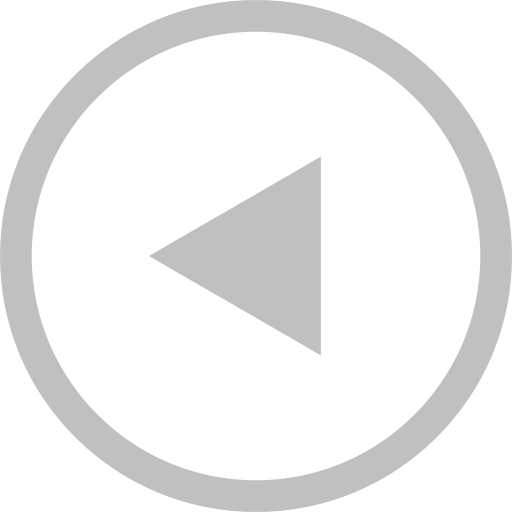
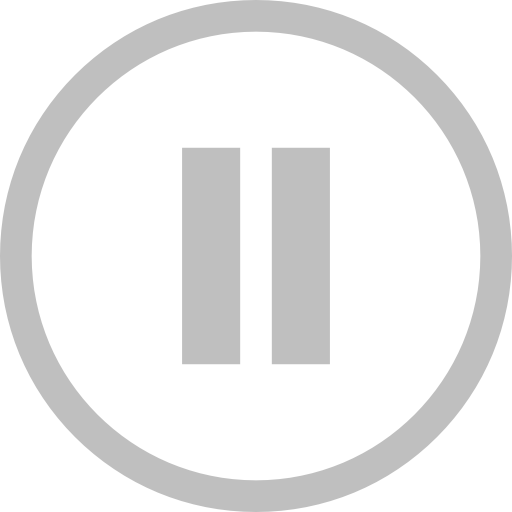
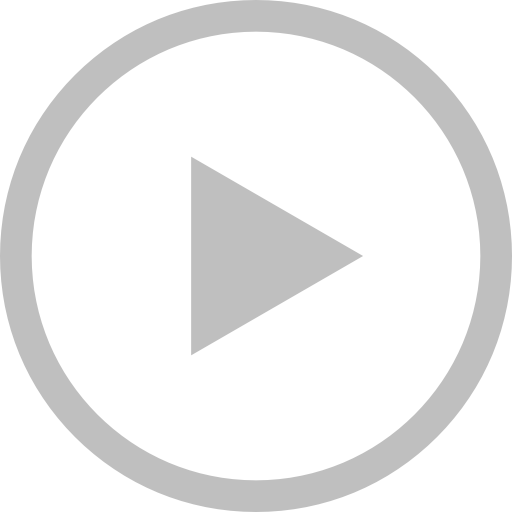
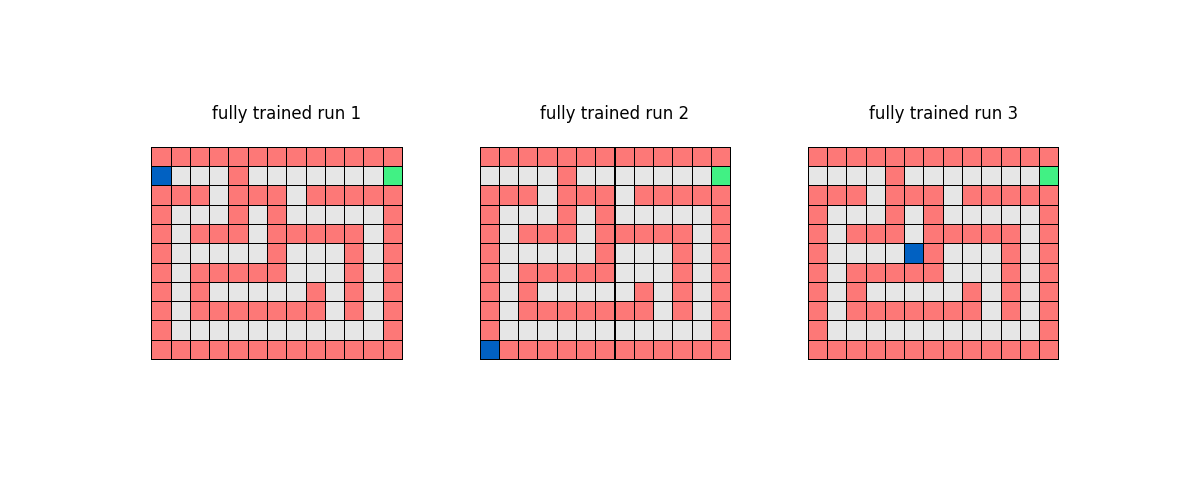
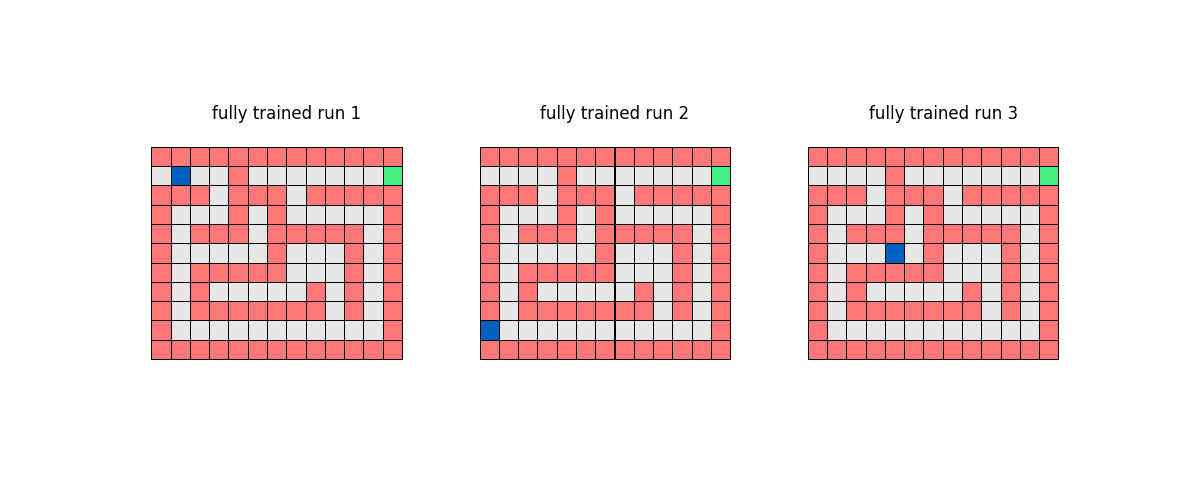
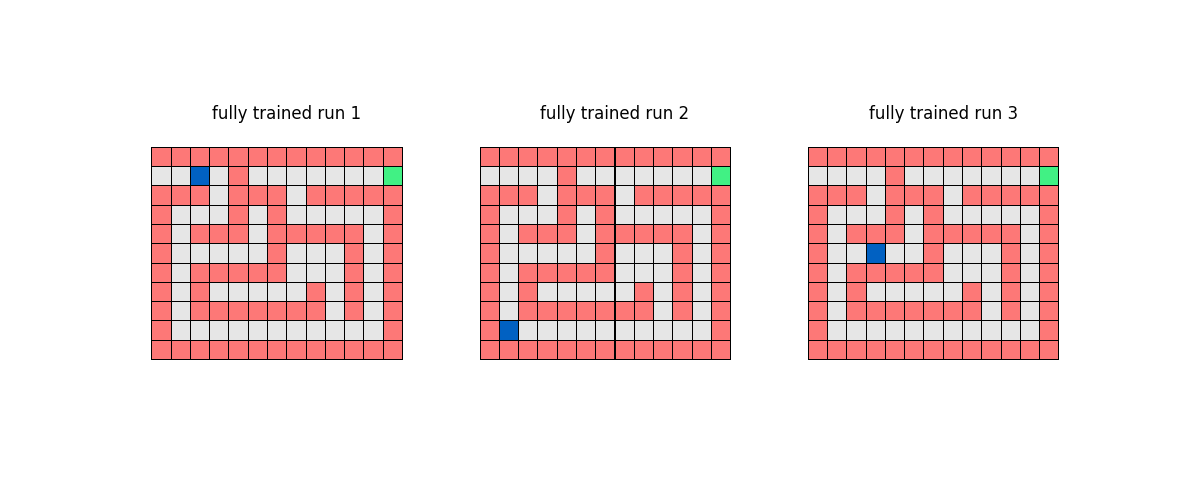
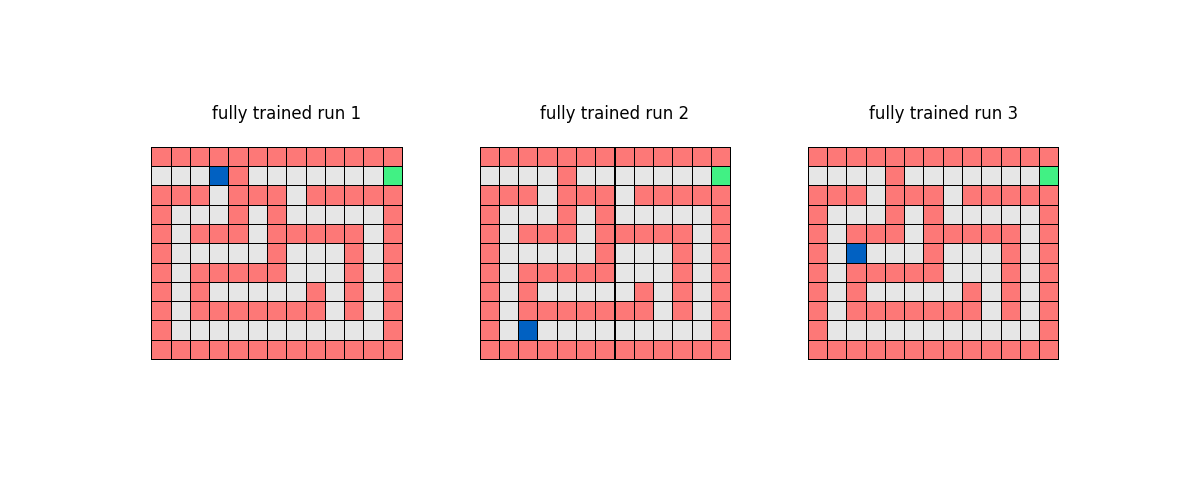
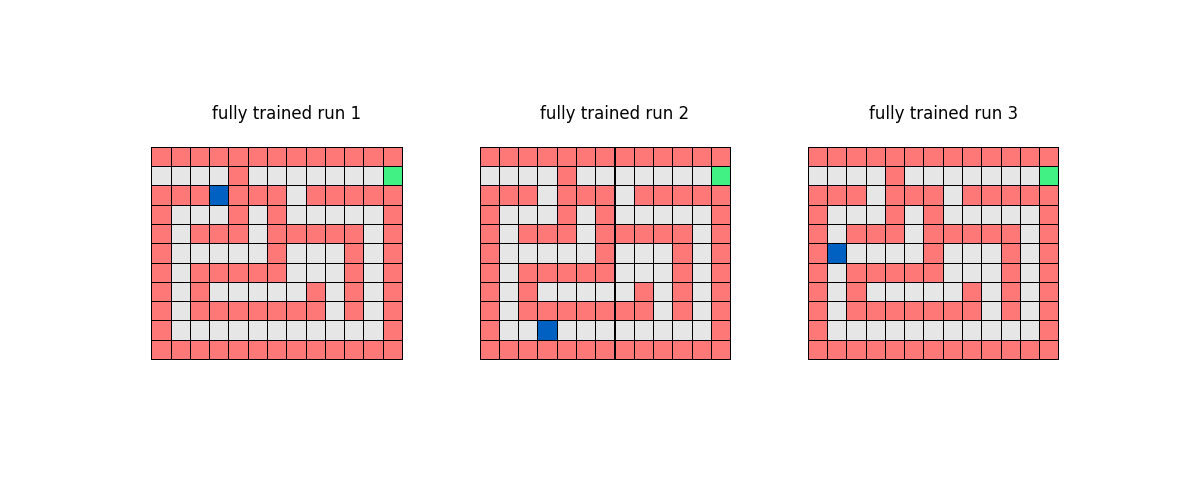
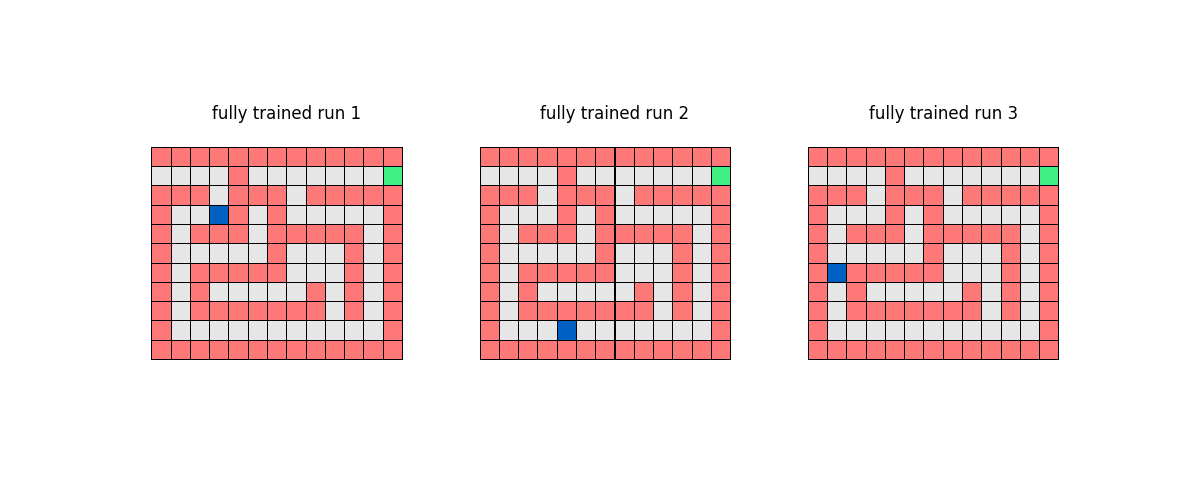
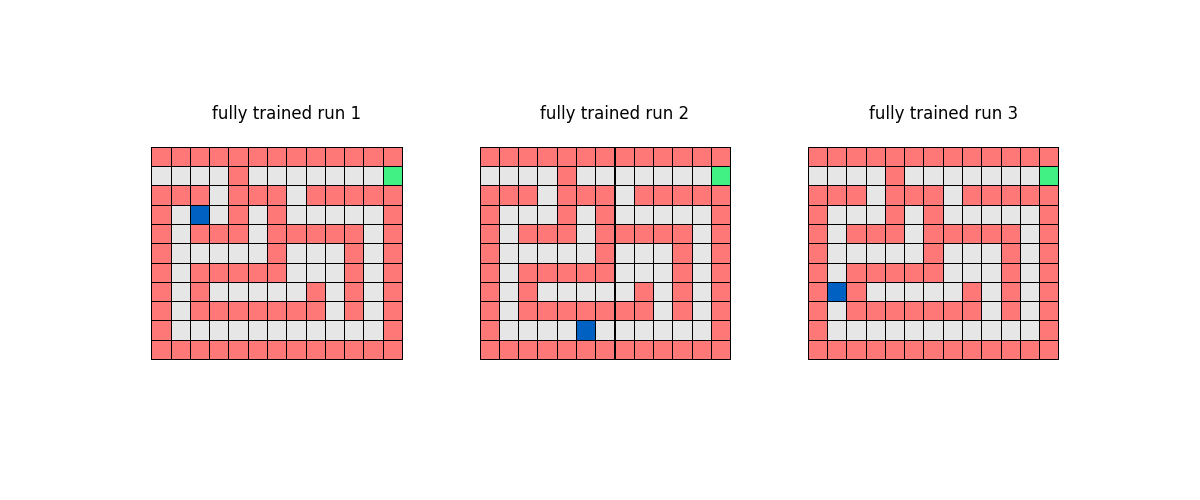
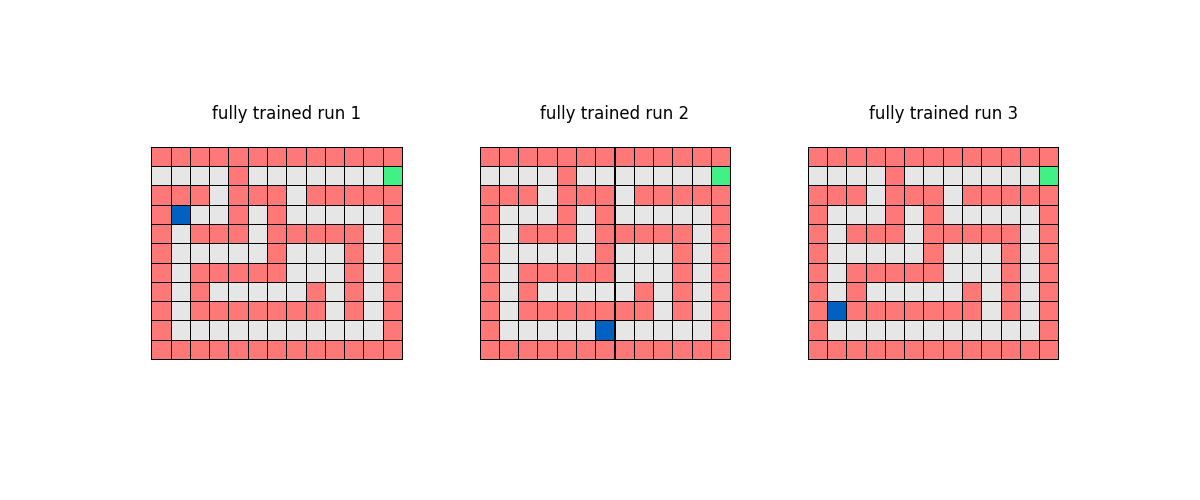
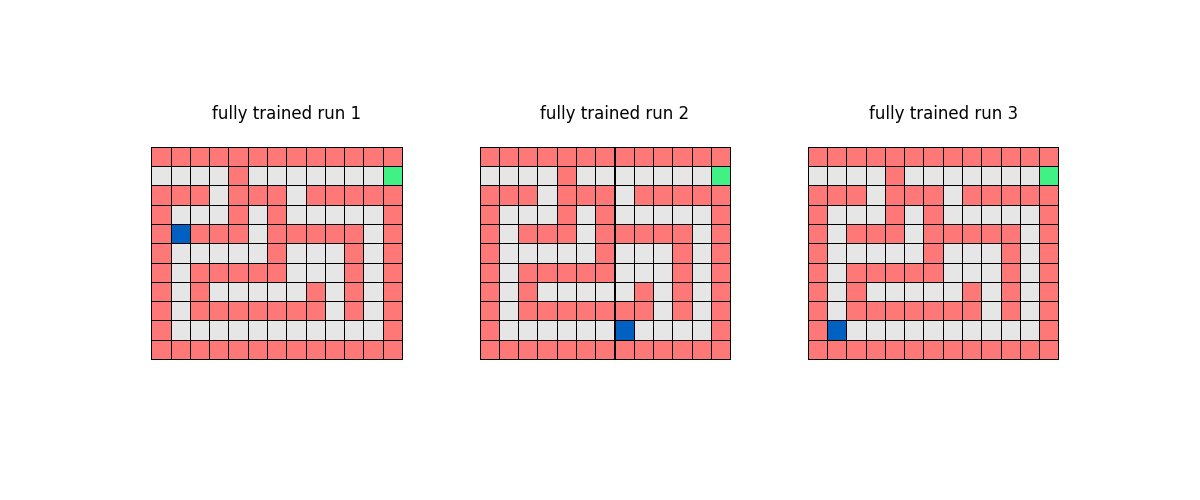
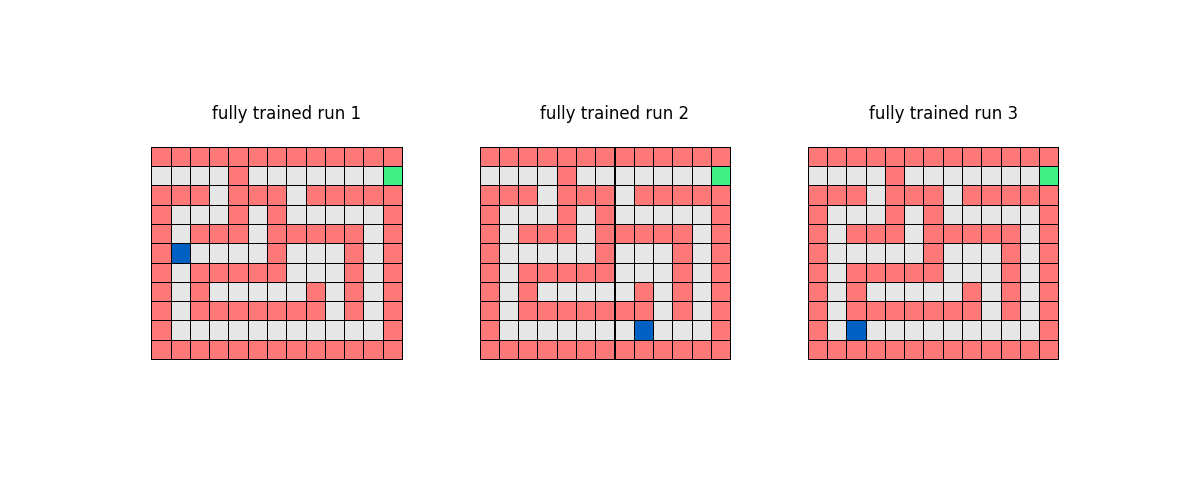
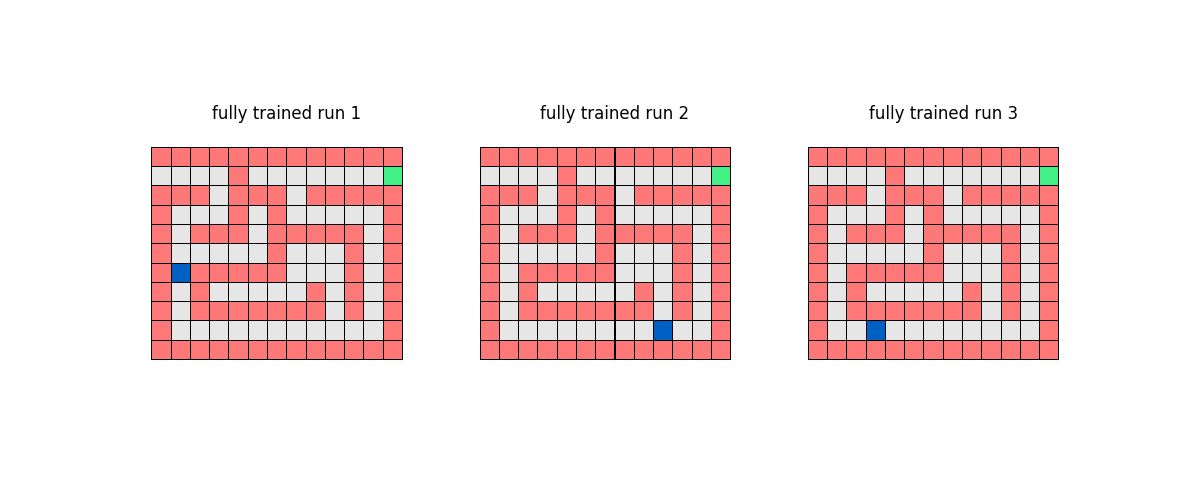
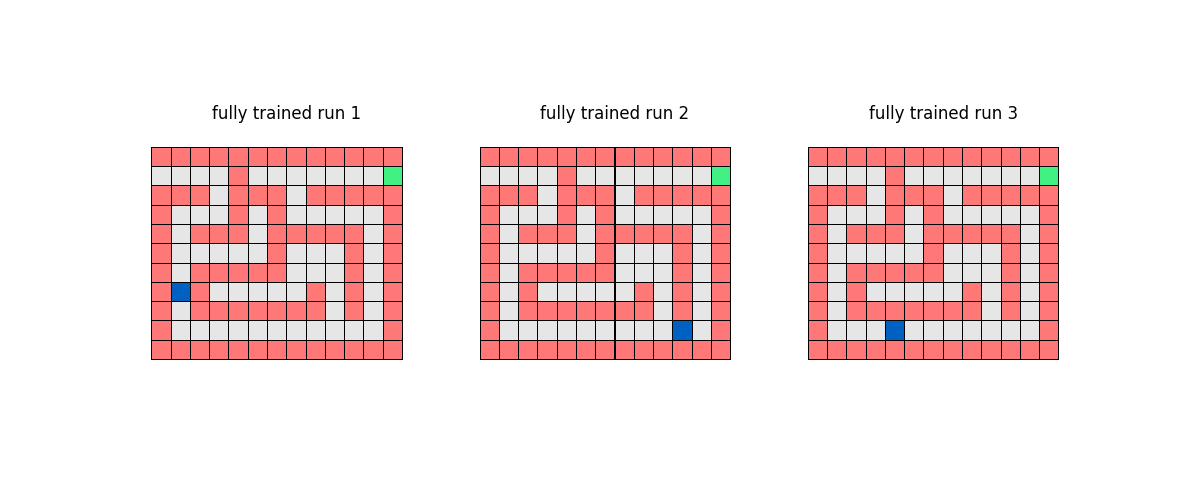
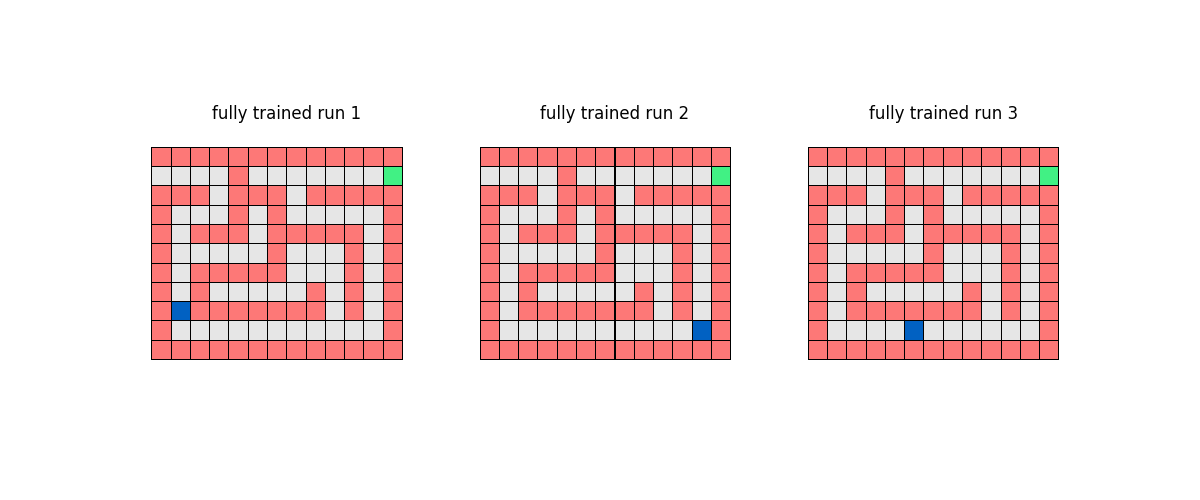
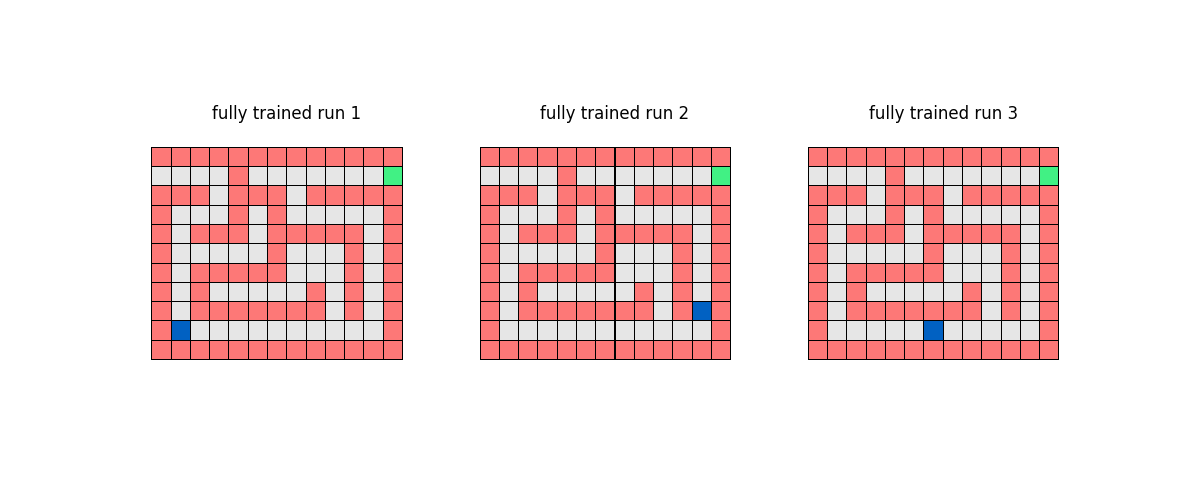
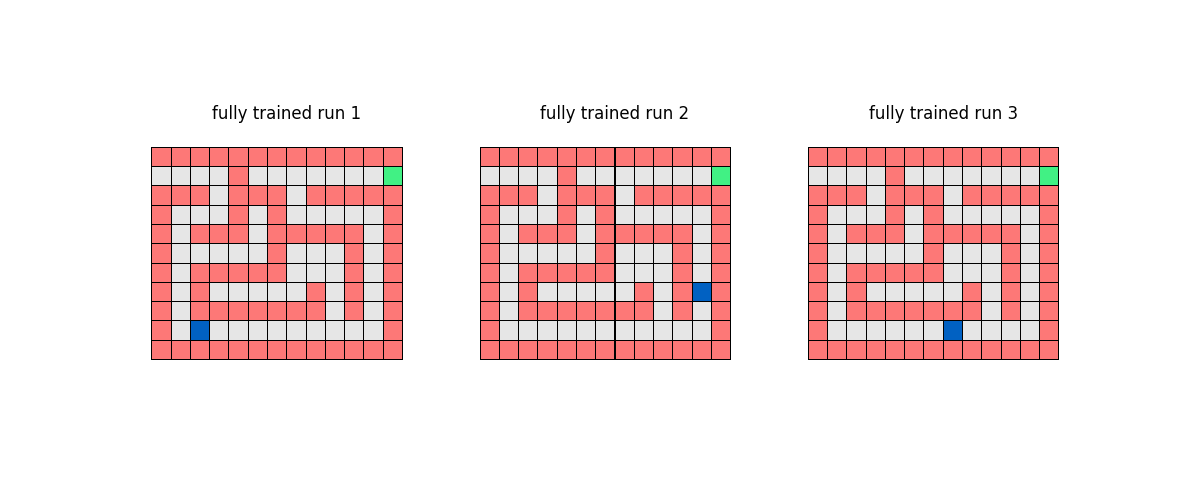
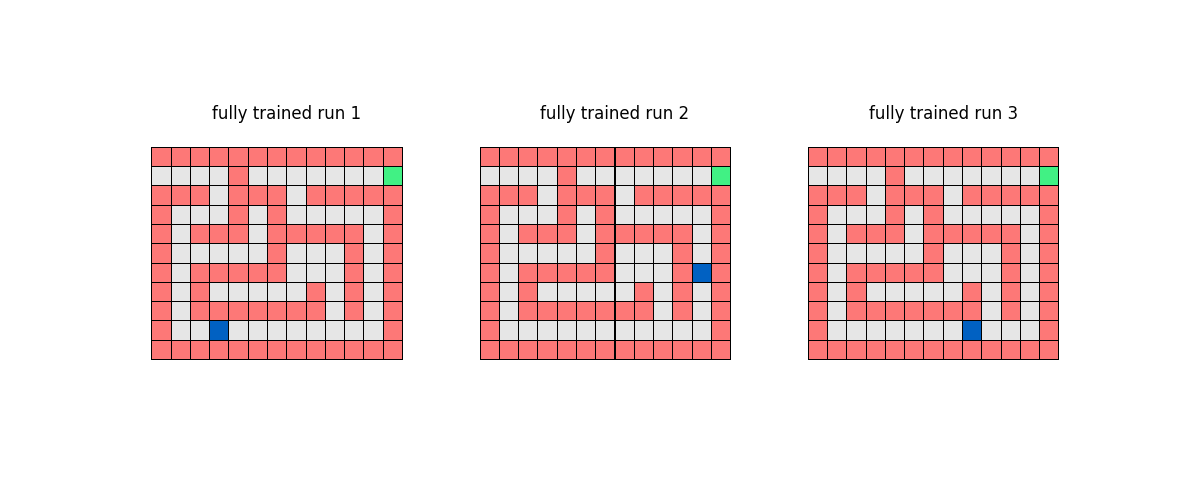
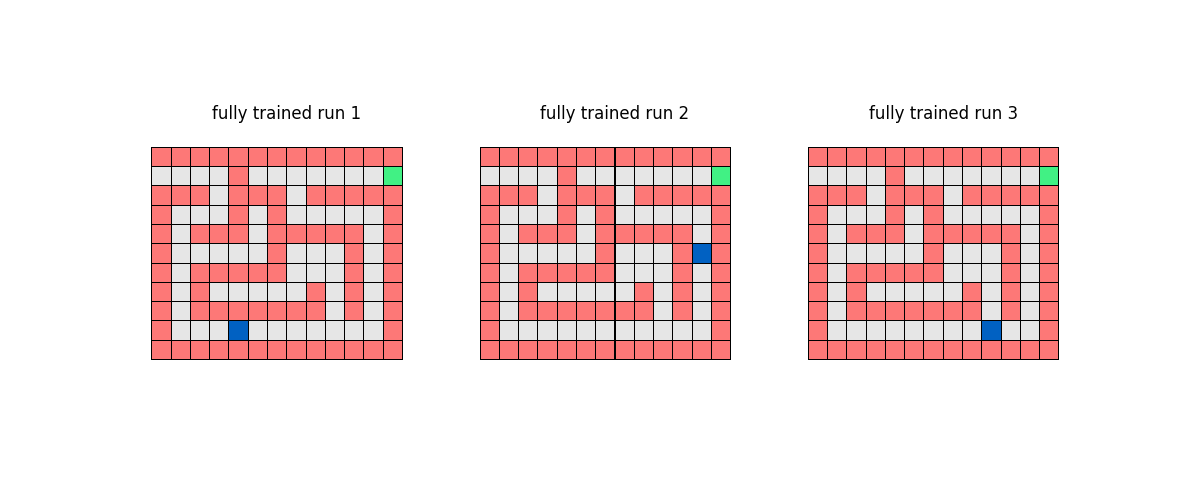
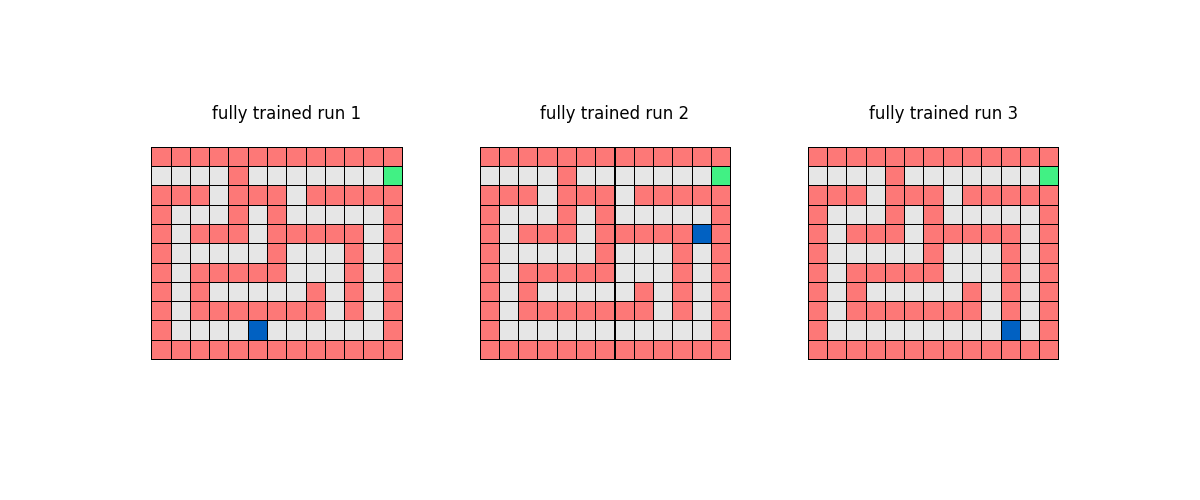
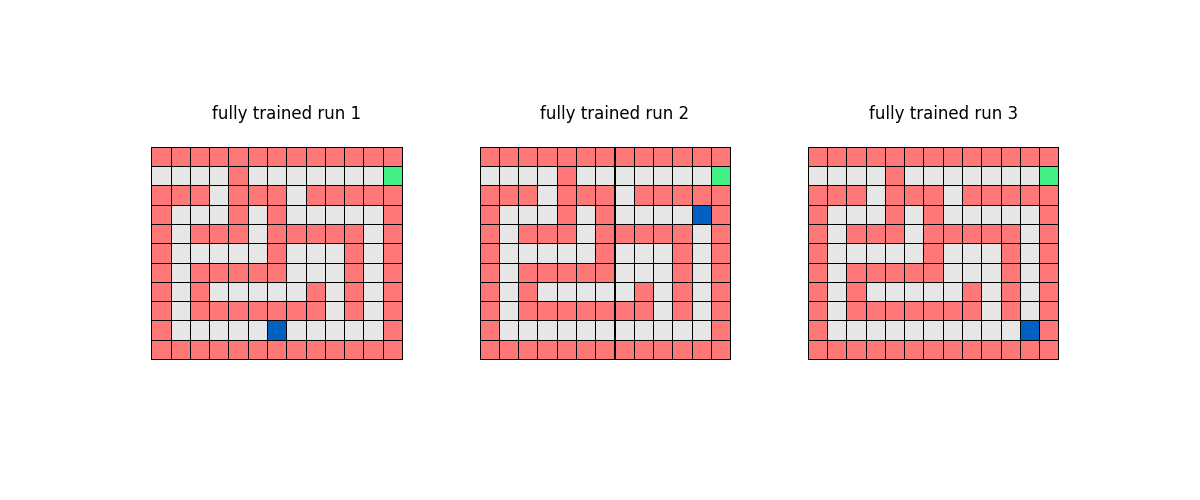
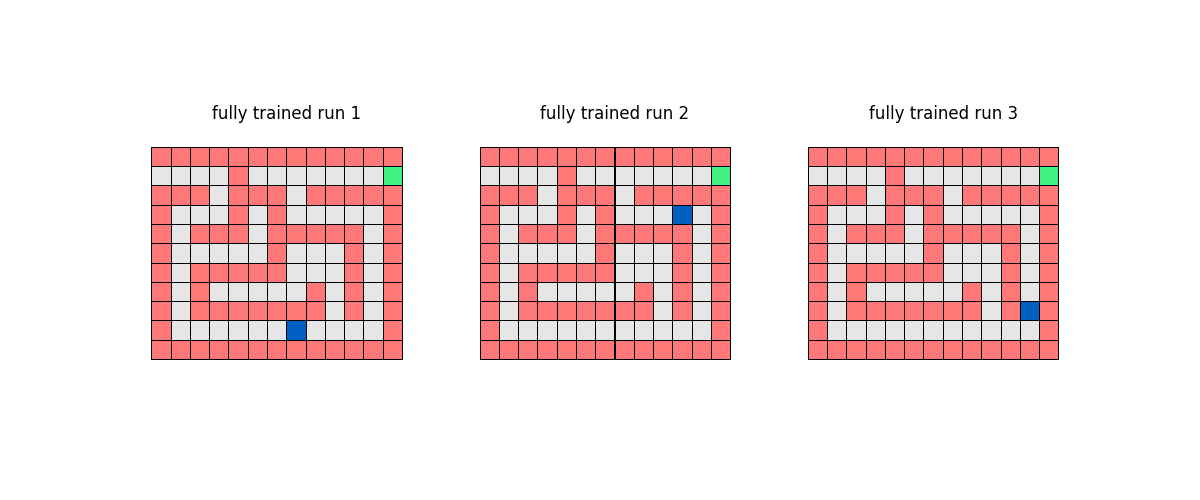
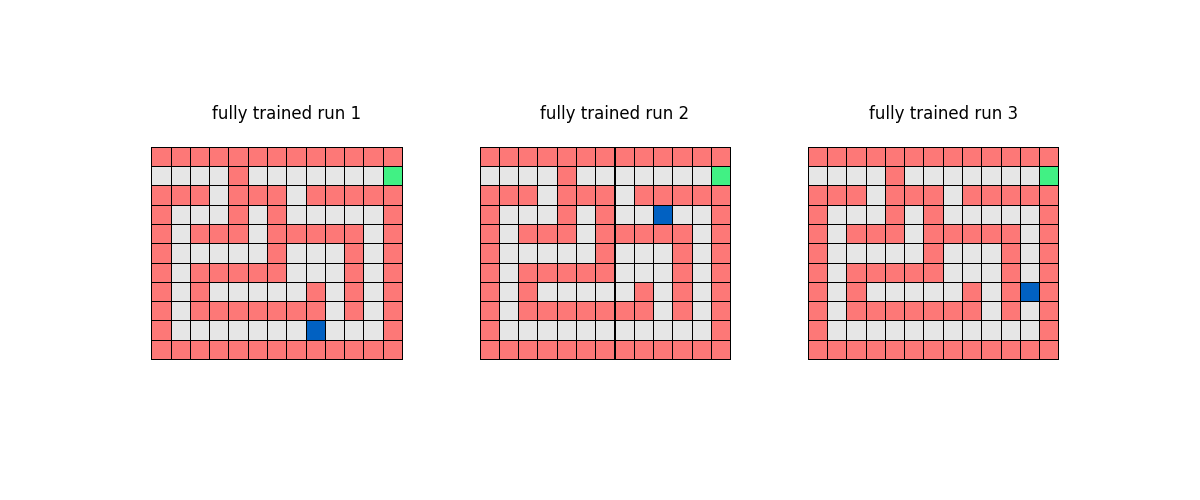
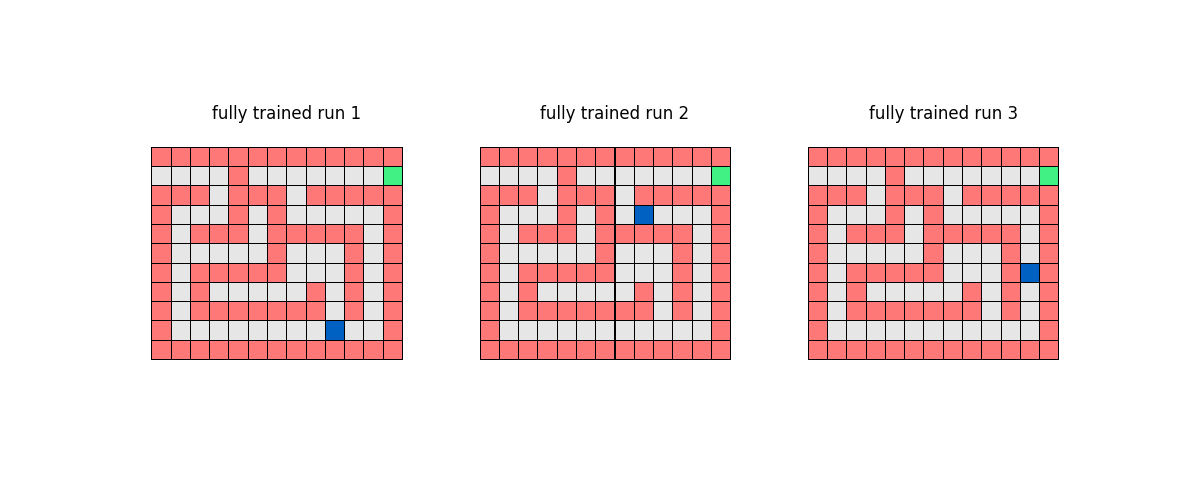
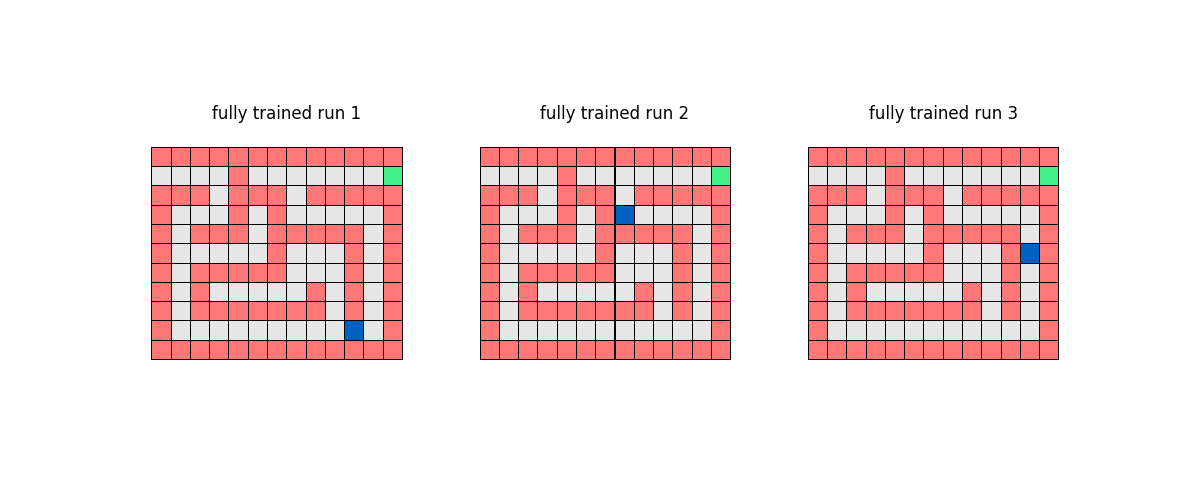
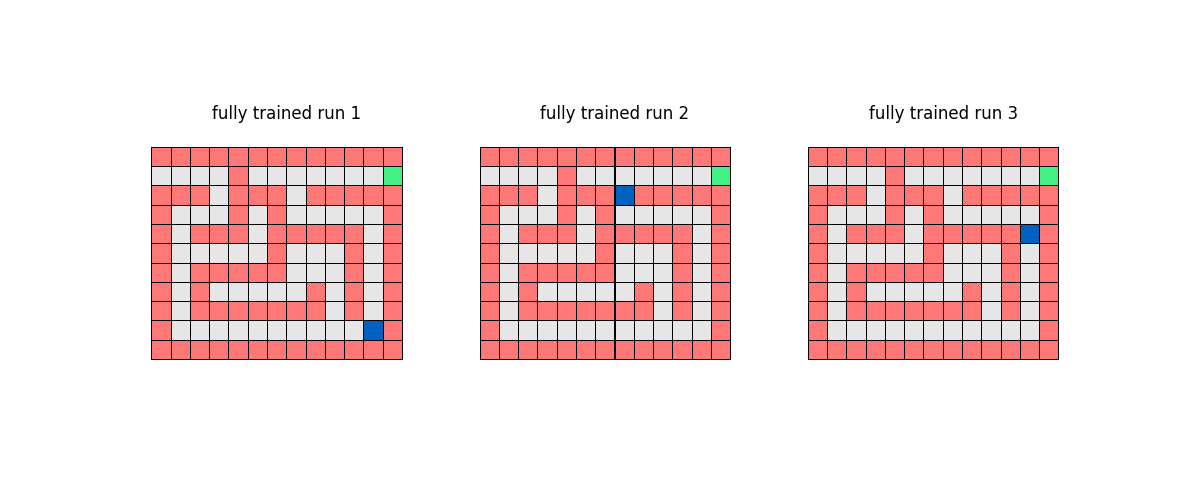
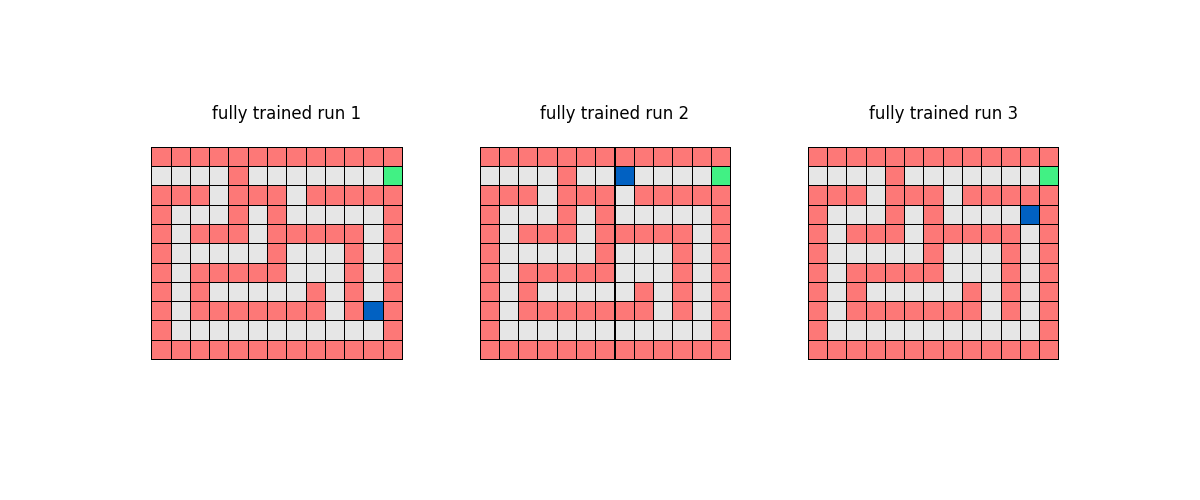
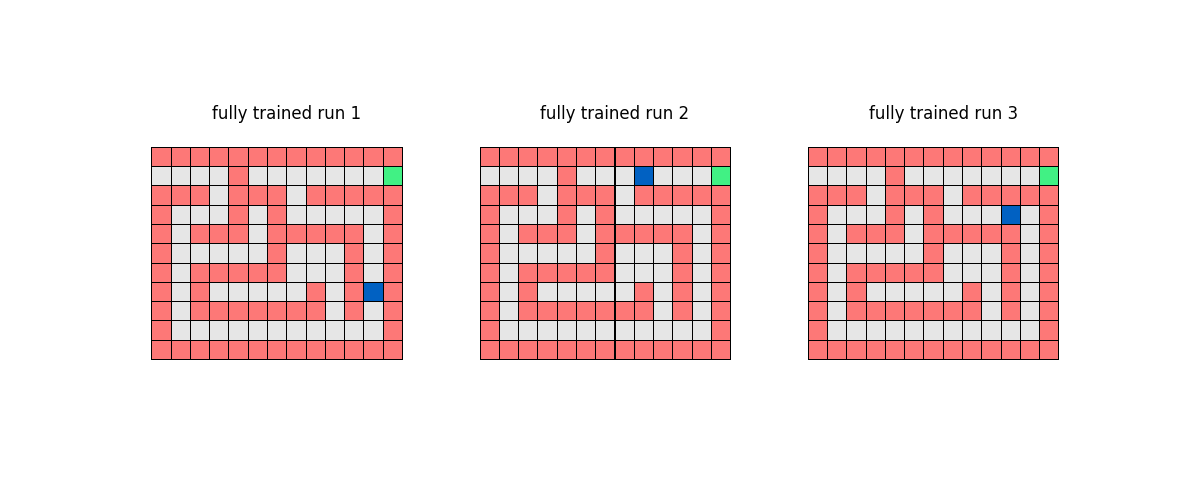
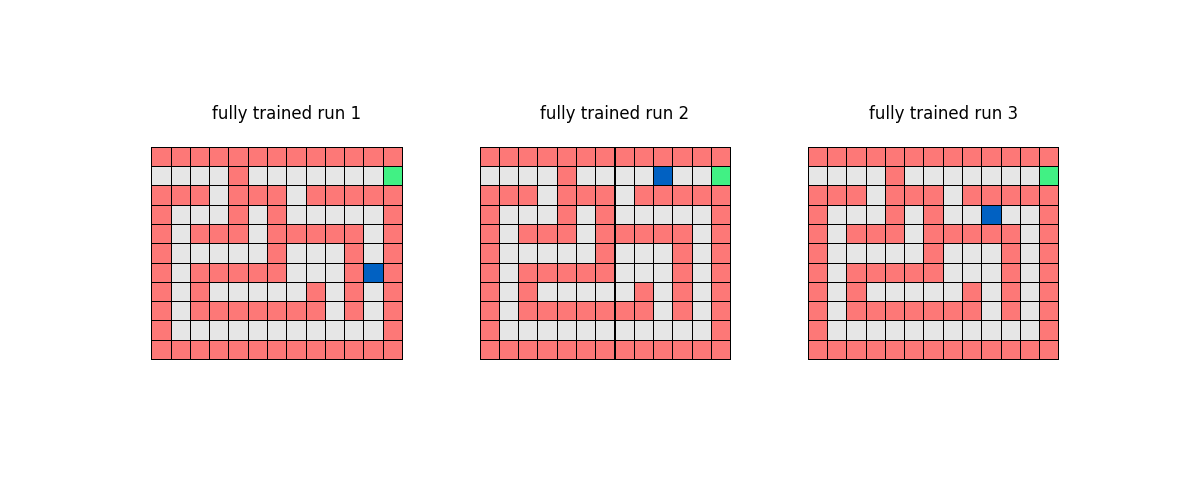
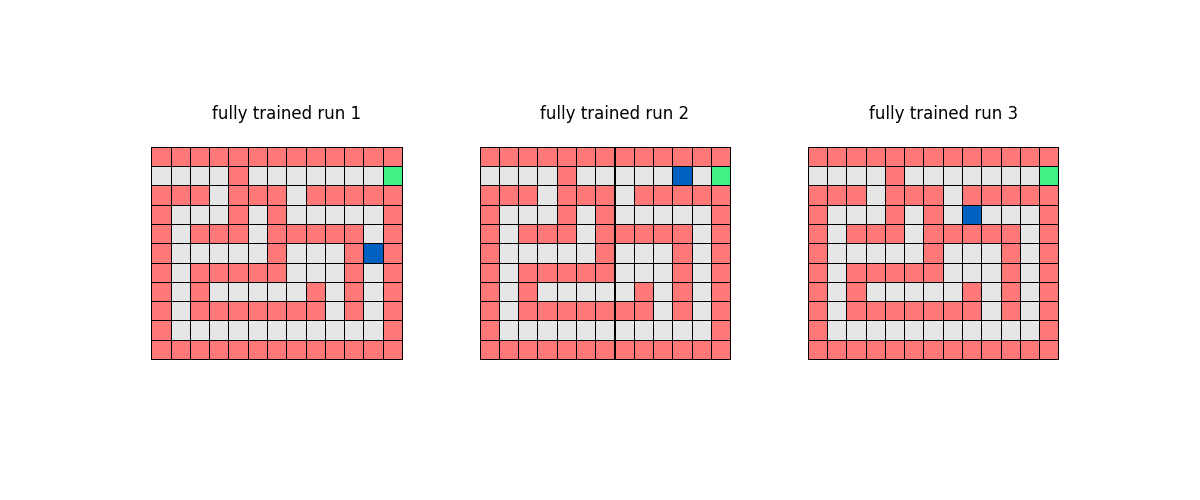
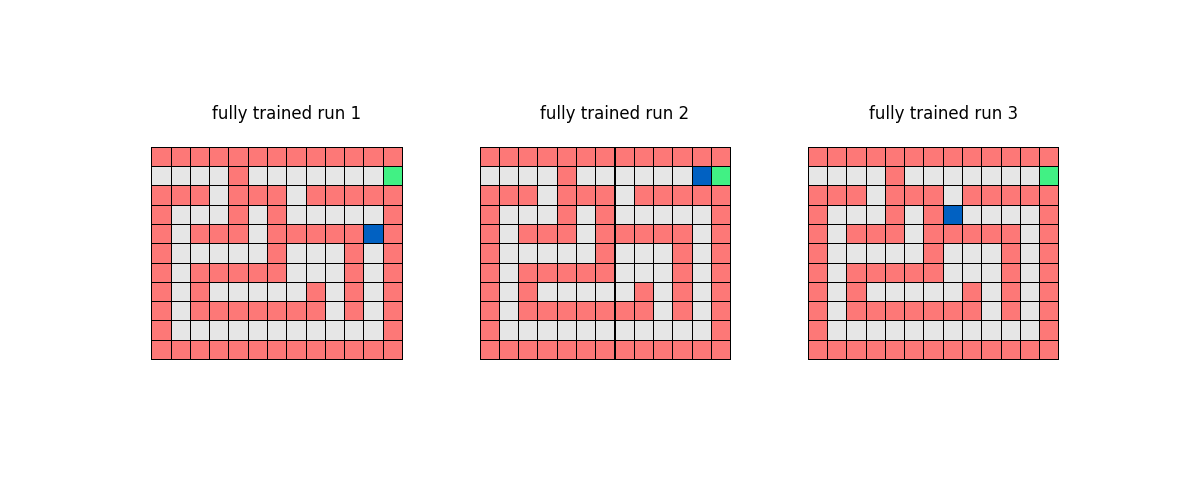
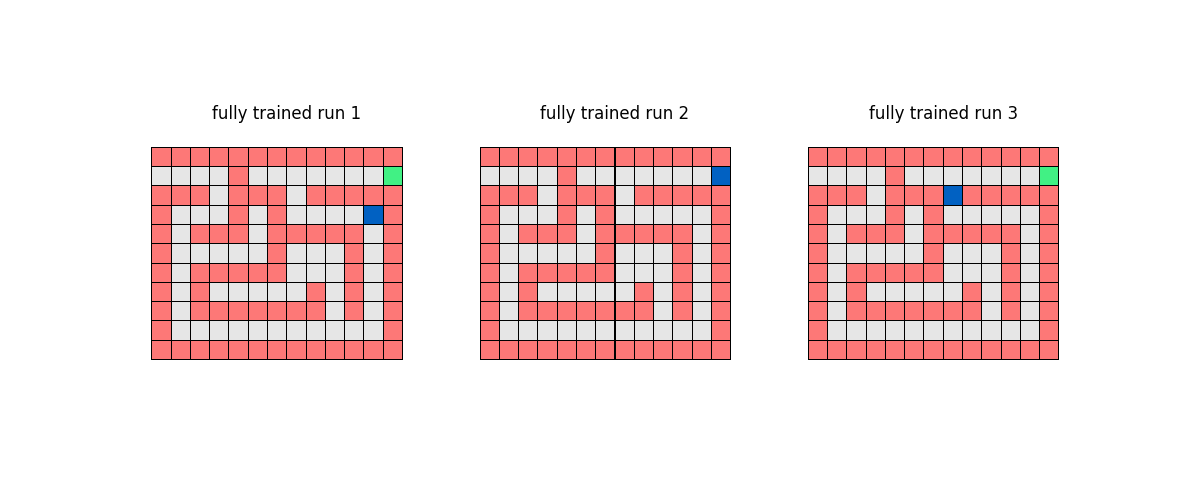
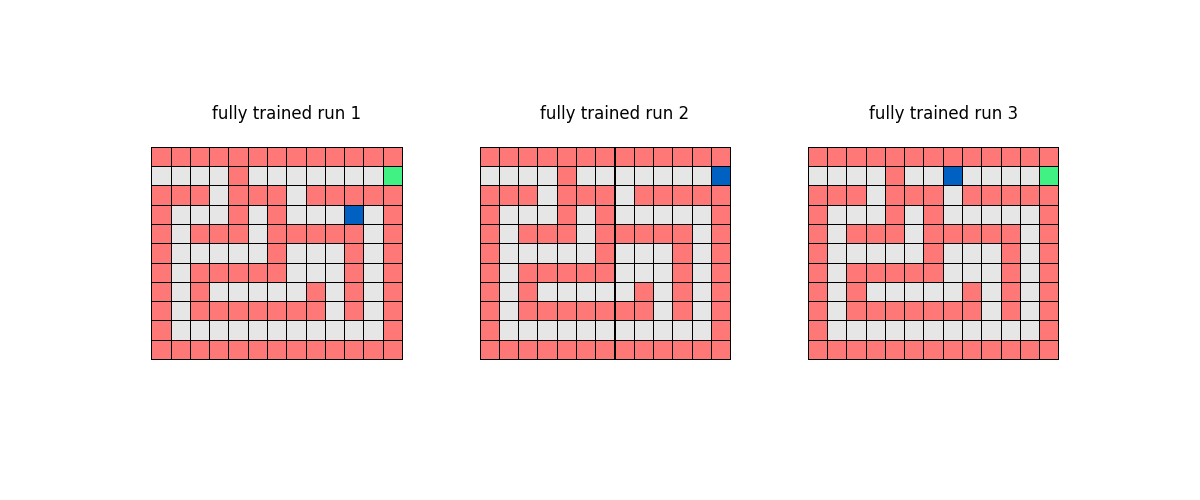
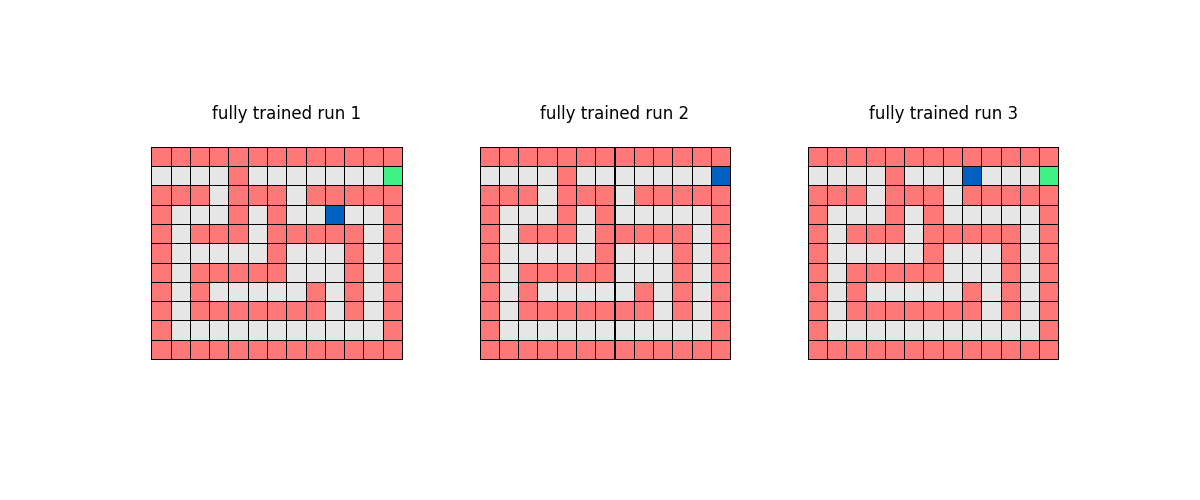
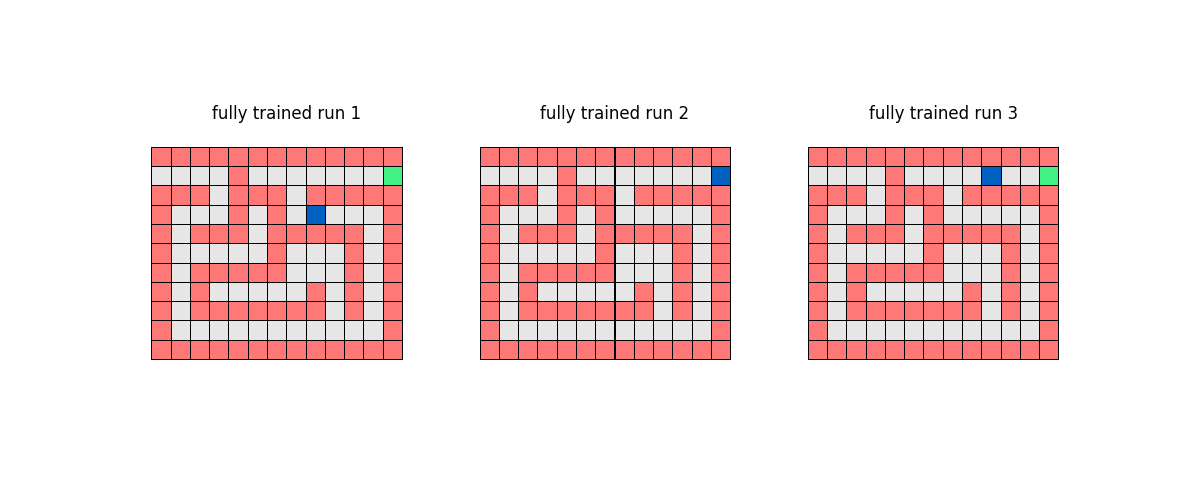
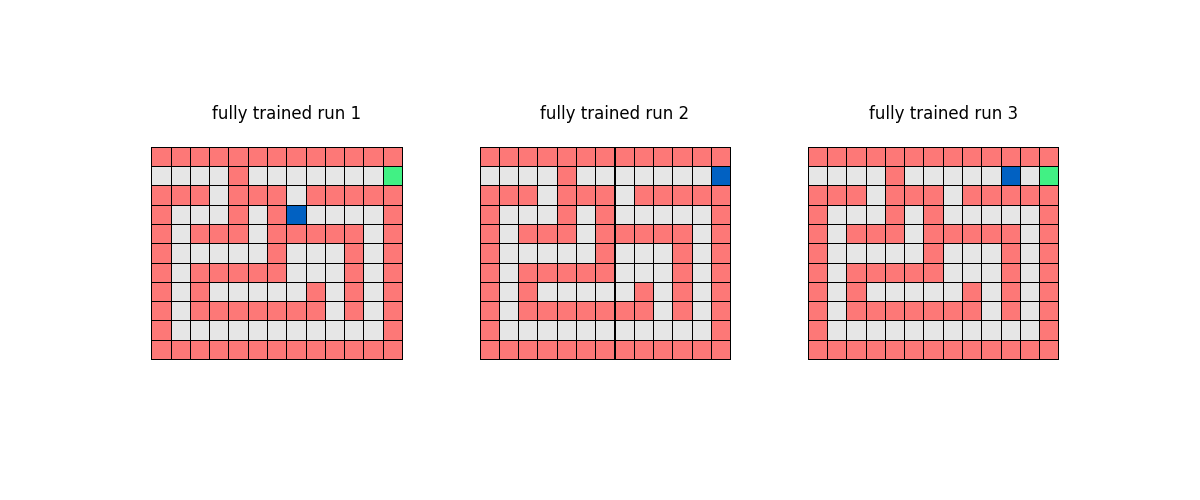
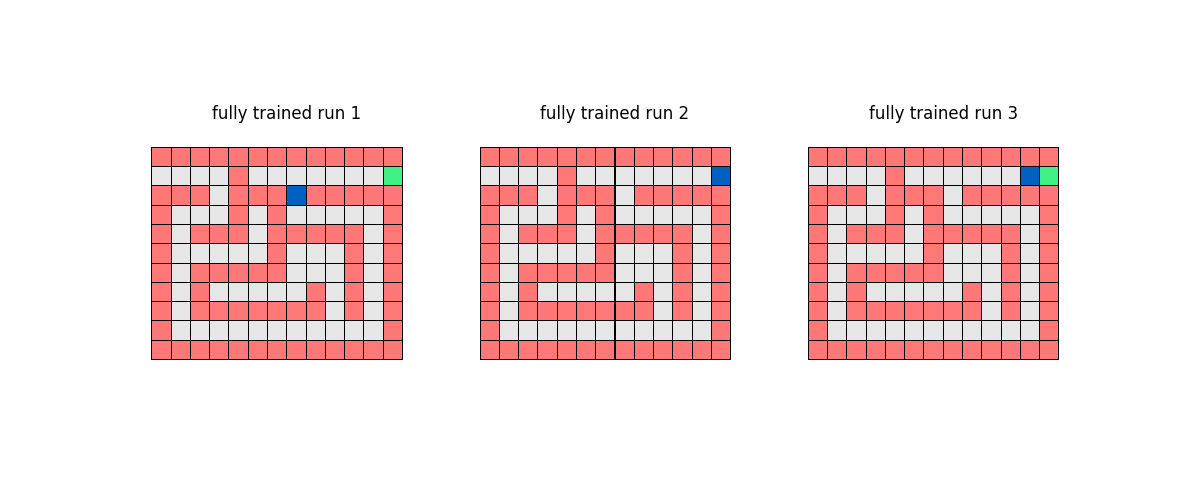
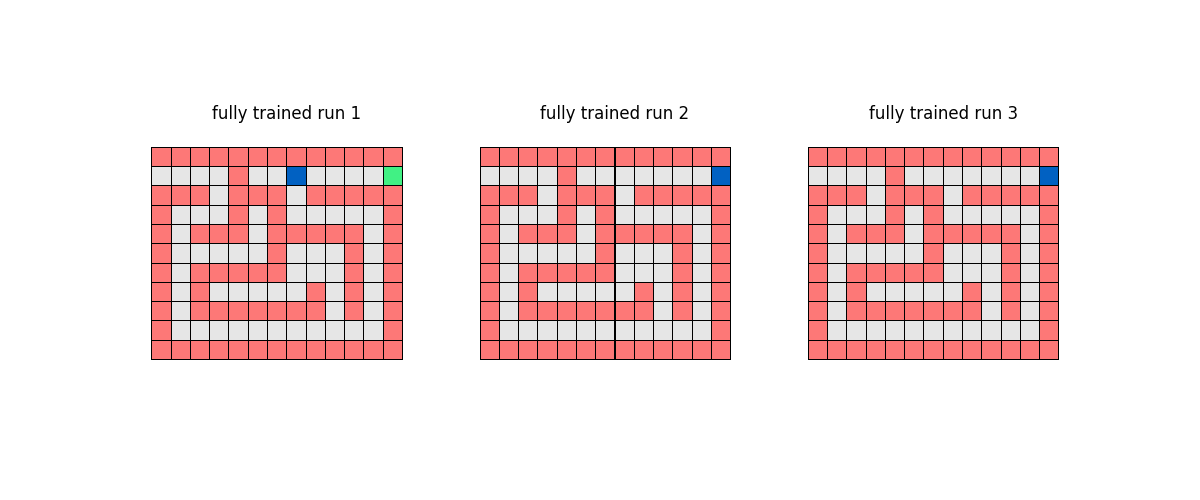
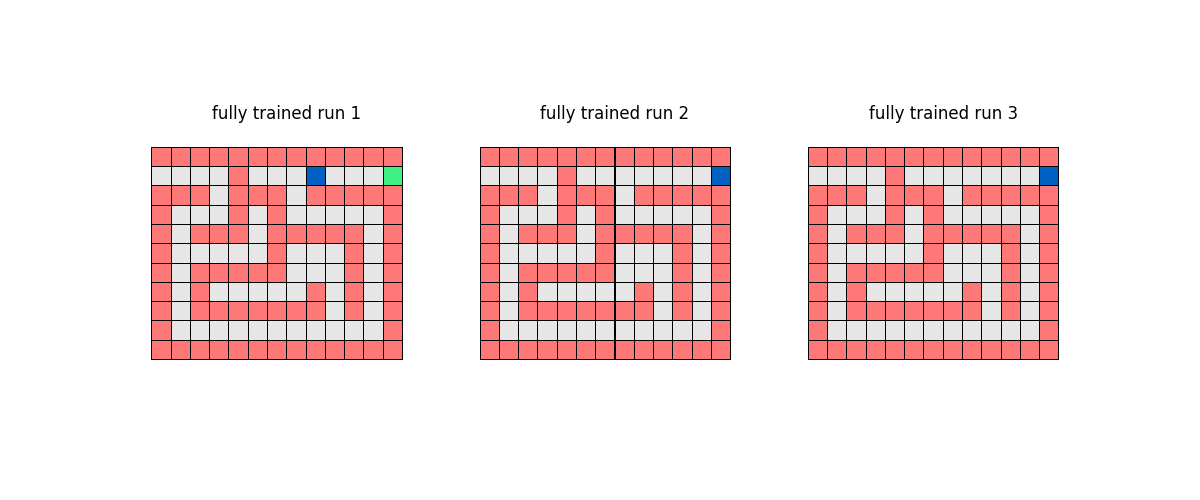
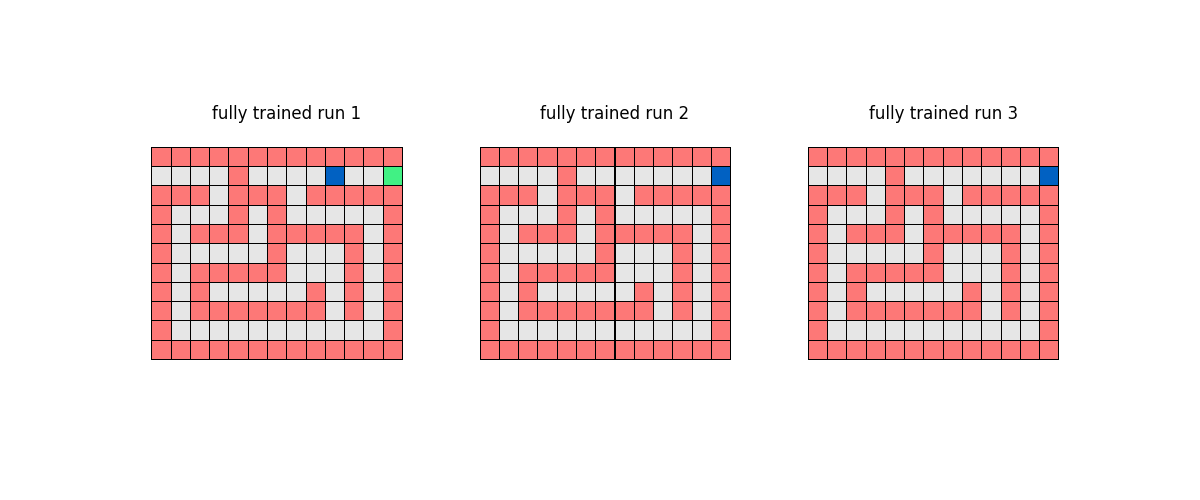
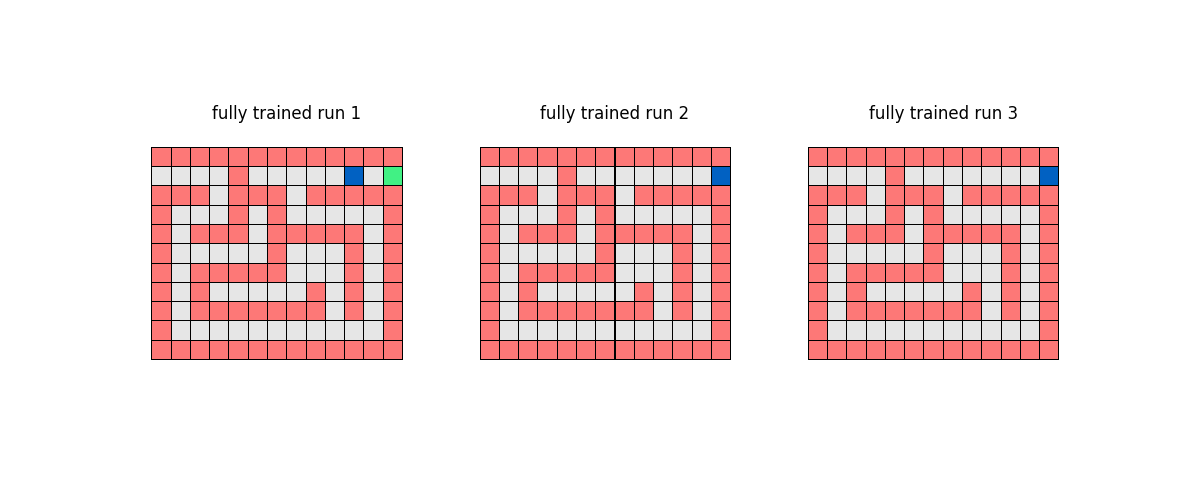
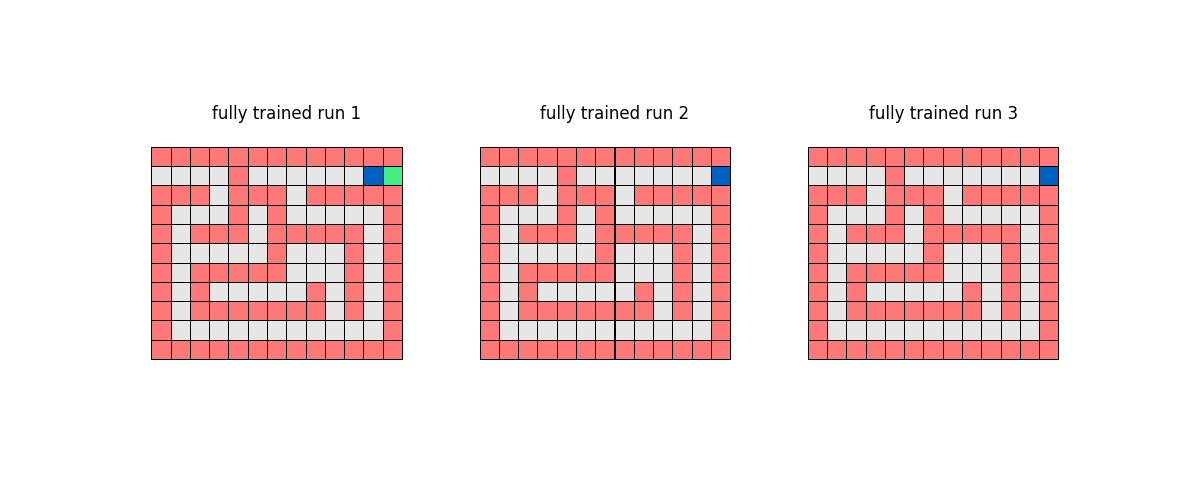
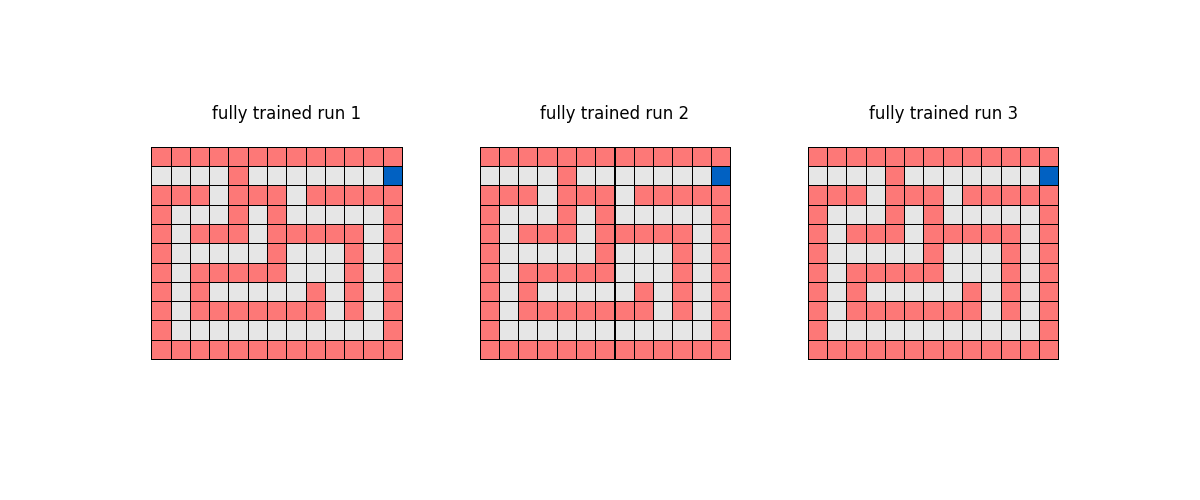

In [17]:
# load in gridworld animation module
from gridworld_lib import gridworld_animators

# create instance of animator
animator = gridworld_animators.animator()

# animate a fully trained agent 
locs = [[9,0],[0,0],[5,5]]
animator.animate_validation_runs(gridworld = small_maze,learner = qlearner,starting_locations = locs)

<p>Generalizing, we can summarize the performance of the trained agent on this Gridworld by running a number of these sorts of validation episodes, starting at a different location on the grid each time, and checking to make sure the <em>average</em> of the rewards is small.</p>
<p>Taking this concept one step further, we can get a sense of how quickly our agent is learning by running a set of fixed validation episodes at each episode of training.  That is, after each training episode we test run a set of validation episodes using the current $Q$ function.</p>
<p>In the next Python cell we run 500 training episodes where at each we run the same 50 validation episodes to track performance.</p>

In [18]:
### rerun q-learner with validation at each training episode ###
# import q-learning module
from gridworld_lib import gridworld_qlearn

# create an instance of the q-learner
qlearner = gridworld_qlearn.learner(gridworld = small_maze)

# run q-learning
qlearner.train(verbose = True,validate = True, action_method = 'random')

training episode 50 of 500 complete
training episode 100 of 500 complete
training episode 150 of 500 complete
training episode 200 of 500 complete
training episode 250 of 500 complete
training episode 300 of 500 complete
training episode 350 of 500 complete
training episode 400 of 500 complete
training episode 450 of 500 complete
training episode 500 of 500 complete
q-learning algorithm complete


<p>Let's now plot the resulting median reward of validation calculated at each training episode.</p>

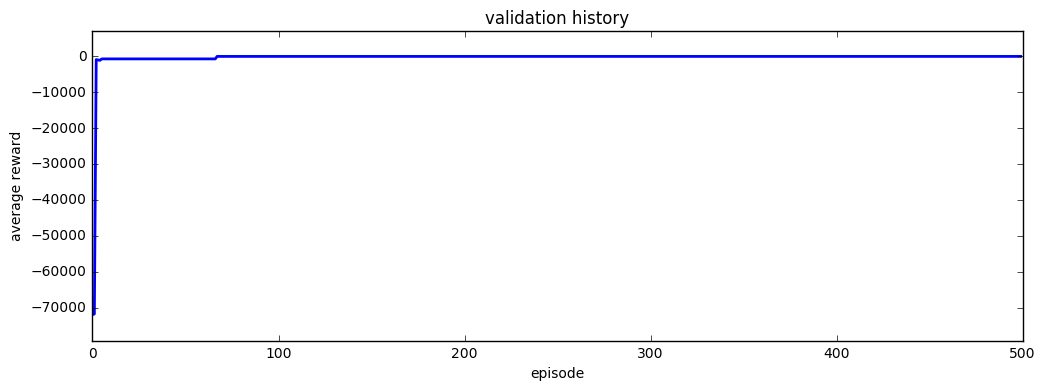

In [19]:
### print out average validation reward - computed at each training episode
# grab series
import matplotlib.pyplot as plt
series = qlearner.validation_reward

# initialize figure
fig = plt.figure(figsize = (12,4))

# plot each reward history
plt.plot(series,color = 'b',linewidth = 2)

# clean up panel
ymin = min(series)
ymax = max(series)
ygap = abs((ymax - ymin)/float(10))
plt.ylim([ymin - ygap,ygap])
plt.xlabel('episode')
plt.ylabel('average reward')
plt.title('validation history')

In this case it looks like the average validation reward increases rapidly over the first 10 or so training episodes, and increases gradually afterwards. Of course we want to set the parameters of our Q-Learning algorithm optimally so that this average reward gets as large as possible and increases as rapidly as possible.
Note that for specific problems like Gridworld we could compute the reward of the true shortest path from each square location to the goal, and then compare each to the corresponding reward achieved using the optimal policy. The closer these two values match over the entire grid the better our algorithm performs. However, this sort of validation does not work in general as we don't have knowledge of the truly optimal choices.

<h1 id="3.4--Representing-the-Q-function-as-a-2-dimensional-matrix*">5. $Q$ function as a 2-dimensional matrix*</h1>
<p>While mathematically the input to $Q(s,a)$ can have many dimensions, being pairs of raw states and actions, the way we compute $Q$ via <em>Bellman's equation</em> and store it on a computer is via a 2-dimensional matrix representation.</p>
<p>Recall we denote the set of all realized states as $S=\left\{ \sigma_{1},\sigma_{2},...,\sigma_{N}\right\} $, and likewise the set of all possible actions as $ A=\left\{ \alpha_{1},\alpha_{2},...,\alpha_{M}\right\} $. We can then represent $Q$ on a computer as the $N \times M$ matrix</p>
<p style="text-align: center !important;">$Q=\left[\begin{array}{cccc}
Q\left(\sigma_{1},\alpha_{1}\right) & Q\left(\sigma_{1},\alpha_{2}\right) & \cdots & Q\left(\sigma_{1},\alpha_{M}\right)\\
Q\left(\sigma_{2},\alpha_{1}\right) & \ddots &  & Q\left(\sigma_{2},\alpha_{M}\right)\\
\vdots &  & \ddots & \vdots\\
Q\left(\sigma_{N},\alpha_{1}\right) &  &  & Q\left(\sigma_{N},\alpha_{M}\right)
\end{array}\right]$</p>
<br>
<p>In other words, we represent $Q$ as a matrix indexed by all possible actions along its columns and all possible states along its rows.</p>


<h3 id="Example---gridworld-maze"><span style="color:#a50e3e;"> Example. </span> &nbsp; Gridworld's $Q$ matrix<a class="anchor-link" href="#Example---gridworld-maze">&#182;</a></h3>
<p>Running the following Python cell, you can see the final $Q$ matrix learned via the Q-learning algorithm for Gridworld. The vertical axis is indexed by state location (e.g., the top left square is 0,0 and the bottom right is 10,12) while the top labels are indexed by the available actions.</p>


In [20]:
import pandas as pd

# print out Q matrix
df = pd.DataFrame(qlearner.Q,columns=['up','down','left','right'], index=small_maze.states)
print df.round(3)   

          up   down   left  right
0,0   -427.0 -227.0 -427.0 -227.0
0,1   -227.0  -27.0 -427.0 -226.0
0,2   -226.0  -26.0 -227.0 -225.0
0,3   -225.0  -25.0 -226.0 -224.0
0,4   -224.0  -24.0 -225.0 -223.0
0,5   -223.0  -23.0 -224.0 -222.0
0,6   -222.0  -22.0 -223.0 -221.0
0,7   -221.0  -21.0 -222.0 -220.0
0,8   -220.0  -20.0 -221.0 -219.0
0,9   -219.0  -19.0 -220.0 -218.0
0,10  -218.0  -18.0 -219.0 -217.0
0,11  -217.0  -17.0 -218.0 -417.0
0,12  -417.0 -217.0 -217.0 -417.0
1,0   -427.0 -228.0 -227.0  -27.0
1,1   -227.0  -28.0 -227.0  -26.0
1,2   -226.0 -226.0  -27.0  -25.0
1,3   -225.0 -225.0  -26.0  -24.0
1,4   -224.0 -224.0  -25.0  -23.0
1,5   -223.0 -223.0  -24.0  -22.0
1,6   -222.0 -222.0  -23.0  -21.0
1,7   -221.0 -221.0  -22.0  -20.0
1,8   -220.0 -220.0  -21.0  -19.0
1,9   -219.0  -20.0  -20.0  -18.0
1,10  -218.0 -216.0  -19.0  -17.0
1,11  -217.0  -16.0  -18.0 -217.0
1,12  -417.0 -216.0  -17.0 -217.0
2,0   -227.0 -229.0 -228.0  -28.0
2,1    -27.0  -29.0 -228.0 -226.0
2,2    -26.0 -

Notice how hazard states tend to have much larger total negative rewards than non-hazards!

In this notebook we discussed a basic version of the Q-Learning algorithm. In the notebooks that follow we will extend this discussion and touch on items such as common enhancements for the basic Q-Learning scheme discussed here, role of features in Reinforcement Learning and how they impact a learner's ability to generalize, integration of common function approximators like deep neural networks into the Reinforcement framework, as well as additional implementations of RL applied to control and game AI problems. So stay tuned!

<a id='bib_cell'></a>

## Bibliography

[1] Christopher Watkins and Peter Dayan. Q-learning. Machine learning 8.3-4 (1992): 279-292.